# Data Exploration

In [5]:
import pandas as pd
import json
import datetime
import tweepy
from datetime import datetime
from datetime import date
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

# Overview generale

## Dataset completo

Verifichiamo ora le componenti del dataset

In [6]:
df =  pd.read_csv('dati/completo.csv')
df

Codice    Location Provincia         Regione        Data  Scontrini  \
0      R000  Montebello     Pavia       Lombardia  2018-01-01      21884   
1      R000  Montebello     Pavia       Lombardia  2018-01-02          0   
2      R000  Montebello     Pavia       Lombardia  2018-01-03          0   
3      R000  Montebello     Pavia       Lombardia  2018-01-04          0   
4      R000  Montebello     Pavia       Lombardia  2018-01-05          0   
...     ...         ...       ...             ...         ...        ...   
8806   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-26        624   
8807   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-27          0   
8808   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-28        723   
8809   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
8810   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        500409.90     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
8806      19369.15    Tuesday    April  2022  ...                    60.5   
8807          0.00  Wednesday    April  2022  ...                    60.5   
8808      24217.65   Thursday    April  2022  ...                    60.5   
8809          0.00     Friday    April  2022  ...                    60.5   
8810          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
8806   3614    3915         86          262                   62   
8807   3592    3804         71          193                   27   
8808   3838    4031         77          234                   29   
8809   3147    3291         73          152                   40   
8810   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            22.87  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
8806          1469                  5650        71843            31.04  
8807          1160                  5945        72033             0.00  
8808          1528                  6001        72263            33.50  
8809           976                  5197        72488             0.00  
8810          1149                  3638        72676             0.00  

[8811 rows x 27 columns]

In [7]:
print(df["Codice"].value_counts())

R000    1581
R004    1581
R001    1581
R003    1580
R005    1576
R002     912
Name: Codice, dtype: int64


Abbiamo all'incirca lo stesso numero di valori per tutti i ristoranti eccetto per il ristorante R002 (di Piacenza).

## Outliers e prima parte dataset

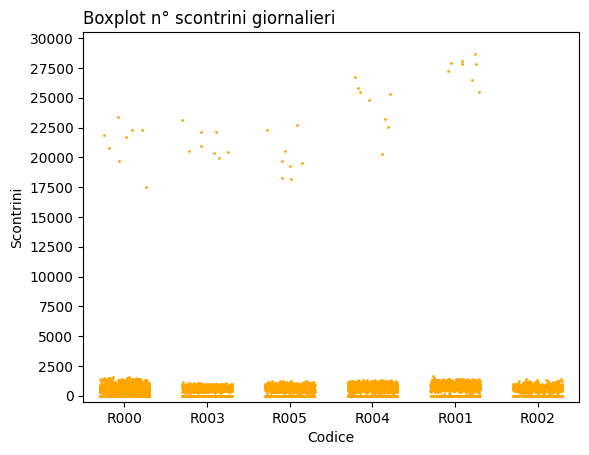

In [8]:
import seaborn as sns

sns.stripplot(x='Codice', y='Scontrini', data=df, color="orange",  jitter=0.3, size=2)
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.yticks(np.arange(0, 32500, 2500))
pl.ylim(-500,30500)
pl.show()

Notiamo che in tutti i ristoranti abbiamo un numero consistente di outliers con valori elevati (oltre 15000 scontrini in una sola giornata, un dato che sembra scorretto ad una prima occhiata). Tutti gli altri valori sembrano in un range tra gli 0 e i 2000 scontrini in un giorno all'incirca.

Verifichiamo questi dati con valori potenzialmente anomali

In [9]:
df[df.Scontrini > 10000]

Codice    Location Provincia         Regione        Data  Scontrini  \
0      R000  Montebello     Pavia       Lombardia  2018-01-01      21884   
31     R000  Montebello     Pavia       Lombardia  2018-02-01      17490   
59     R000  Montebello     Pavia       Lombardia  2018-03-01      21714   
90     R000  Montebello     Pavia       Lombardia  2018-04-01      22326   
120    R000  Montebello     Pavia       Lombardia  2018-05-01      19669   
151    R000  Montebello     Pavia       Lombardia  2018-06-01      20747   
181    R000  Montebello     Pavia       Lombardia  2018-07-01      23383   
212    R000  Montebello     Pavia       Lombardia  2018-08-01      22298   
1581   R003    Piacenza  Piacenza  Emilia-Romagna  2018-01-01      19961   
1612   R003    Piacenza  Piacenza  Emilia-Romagna  2018-02-01      20436   
1640   R003    Piacenza  Piacenza  Emilia-Romagna  2018-03-01      23149   
1671   R003    Piacenza  Piacenza  Emilia-Romagna  2018-04-01      20361   
1701   R003    Piacenza  Piacenza  Emilia-Romagna  2018-05-01      22136   
1732   R003    Piacenza  Piacenza  Emilia-Romagna  2018-06-01      20933   
1762   R003    Piacenza  Piacenza  Emilia-Romagna  2018-07-01      22138   
1793   R003    Piacenza  Piacenza  Emilia-Romagna  2018-08-01      20509   
3161   R005     Voghera     Pavia       Lombardia  2018-01-01      19541   
3192   R005     Voghera     Pavia       Lombardia  2018-02-01      19245   
3220   R005     Voghera     Pavia       Lombardia  2018-03-01      22739   
3251   R005     Voghera     Pavia       Lombardia  2018-04-01      20543   
3281   R005     Voghera     Pavia       Lombardia  2018-05-01      22318   
3312   R005     Voghera     Pavia       Lombardia  2018-06-01      19719   
3342   R005     Voghera     Pavia       Lombardia  2018-07-01      18267   
3373   R005     Voghera     Pavia       Lombardia  2018-08-01      18151   
4737   R004   Stradella     Pavia       Lombardia  2018-01-01      23173   
4768   R004   Stradella     Pavia       Lombardia  2018-02-01      22572   
4796   R004   Stradella     Pavia       Lombardia  2018-03-01      24843   
4827   R004   Stradella     Pavia       Lombardia  2018-04-01      20310   
4857   R004   Stradella     Pavia       Lombardia  2018-05-01      25505   
4888   R004   Stradella     Pavia       Lombardia  2018-06-01      25842   
4918   R004   Stradella     Pavia       Lombardia  2018-07-01      26722   
4949   R004   Stradella     Pavia       Lombardia  2018-08-01      25322   
6318   R001    Piacenza  Piacenza  Emilia-Romagna  2018-01-01      28101   
6349   R001    Piacenza  Piacenza  Emilia-Romagna  2018-02-01      25476   
6377   R001    Piacenza  Piacenza  Emilia-Romagna  2018-03-01      28637   
6408   R001    Piacenza  Piacenza  Emilia-Romagna  2018-04-01      27795   
6438   R001    Piacenza  Piacenza  Emilia-Romagna  2018-05-01      27828   
6469   R001    Piacenza  Piacenza  Emilia-Romagna  2018-06-01      27274   
6499   R001    Piacenza  Piacenza  Emilia-Romagna  2018-07-01      27897   
6530   R001    Piacenza  Piacenza  Emilia-Romagna  2018-08-01      26489   

      Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
0         500409.9     Monday   January  2018  ...                     5.9   
31        387601.2   Thursday  February  2018  ...                     4.9   
59        449730.9   Thursday     March  2018  ...                     4.6   
90        483224.4     Sunday     April  2018  ...                    -1.0   
120       427277.7    Tuesday       May  2018  ...                    -0.9   
151       445886.1     Friday      June  2018  ...                    -0.8   
181       489491.1     Sunday      July  2018  ...                     5.3   
212       495620.1  Wednesday    August  2018  ...                     5.3   
1581      252223.2     Monday   January  2018  ...                     5.9   
1612      242295.3   Thursday  February  2018  ...                     4.9   
1640      263808.9   Thursday 

Notiamo che si tratta esattamente di 8 giorni, il primo del mese di 8 mesi consecutivi, per tutti e cinque i ristoranti: potrebbe indicare che per questi 8 mesi il totale del mese è stato indicato ad inizio mese, invece che distribuito su tutti i giorni. 

Verifichiamo questa teoria, osservando i valori di tutti i giorni di questi mesi. 

In [10]:
df[df['Data'] < '2018-09-01'].Scontrini.unique()

array([21884,     0, 17490, 21714, 22326, 19669, 20747, 23383, 22298,
       19961, 20436, 23149, 20361, 22136, 20933, 22138, 20509, 19541,
       19245, 22739, 20543, 22318, 19719, 18267, 18151, 23173, 22572,
       24843, 20310, 25505, 25842, 26722, 25322, 28101, 25476, 28637,
       27795, 27828, 27274, 27897, 26489], dtype=int64)

Notiamo che abbiamo solamente valori superiori a 15000 (ovvero tutti gli outliers trovati in precedenza) oppure valori pari a 0. Dunque abbiamo le prime righe di ogni mese, per tutti i ristoranti, che riportano il totale dei guadagni e del numero di scontrini per l'intero mese. 

Andiamo ad escludere questi 8 mesi nel proseguire l'analisi. 

In [11]:
df_2 = df[df['Data'] >= '2018-09-01']
df_2

Codice    Location Provincia         Regione        Data  Scontrini  \
243    R000  Montebello     Pavia       Lombardia  2018-09-01       1276   
244    R000  Montebello     Pavia       Lombardia  2018-09-02       1070   
245    R000  Montebello     Pavia       Lombardia  2018-09-03        657   
246    R000  Montebello     Pavia       Lombardia  2018-09-04        647   
247    R000  Montebello     Pavia       Lombardia  2018-09-05        635   
...     ...         ...       ...             ...         ...        ...   
8806   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-26        624   
8807   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-27          0   
8808   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-28        723   
8809   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
8810   R002    Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
243       32801.22   Saturday  September  2018  ...                     5.4   
244       28222.37     Sunday  September  2018  ...                     5.4   
245       16201.27     Monday  September  2018  ...                     5.4   
246       16409.71    Tuesday  September  2018  ...                     5.4   
247       15374.10  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
8806      19369.15    Tuesday      April  2022  ...                    60.5   
8807          0.00  Wednesday      April  2022  ...                    60.5   
8808      24217.65   Thursday      April  2022  ...                    60.5   
8809          0.00     Friday      April  2022  ...                    60.5   
8810          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
243       0       0          0            0                    0   
244       0       0          0            0                    0   
245       0       0          0            0                    0   
246       0       0          0            0                    0   
247       0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
8806   3614    3915         86          262                   62   
8807   3592    3804         71          193                   27   
8808   3838    4031         77          234                   29   
8809   3147    3291         73          152                   40   
8810   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
243              0                     0            0            25.71  
244              0                     0            0            26.38  
245              0                     0            0            24.66  
246              0                     0            0            25.36  
247              0                     0            0            24.21  
...            ...                   ...          ...              ...  
8806          1469                  5650        71843            31.04  
8807          1160                  5945        72033             0.00  
8808          1528                  6001        72263            33.50  
8809           976                  5197        72488             0.00  
8810          1149                  3638        72676             0.00  

[7601 rows x 27 columns]

In [12]:
print(df_2["Codice"].value_counts())

R000    1338
R005    1338
R004    1338
R001    1338
R003    1337
R002     912
Name: Codice, dtype: int64


## Scontrini, lordo totale e scontrino medio dei sei ristoranti

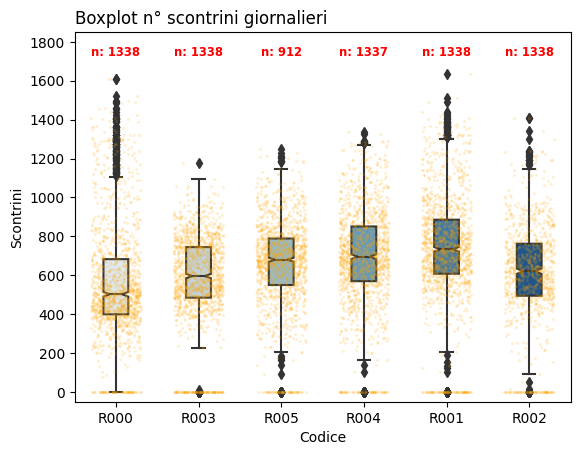

In [13]:
ax = sns.boxplot(x='Codice', y='Scontrini', data=df_2, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Codice', y='Scontrini', data=df_2, color="orange",  jitter=0.3, size=2, alpha = 0.2)

nobs = df_2.groupby("Codice").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    pl.text(pos[tick], 1730, nobs[tick], horizontalalignment='center', size='small', color='red', weight='semibold')

pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

Osserviamo che il numero di scontrini si mantiene costante tra i sei ristoranti, con mediane comprese tra 500 e 750 scontrini al giorno, con distribuzioni simili tra i vari ristoranti (qualche outlier in più per il ristorante R000 e R001 con valori elevati).  

In [23]:
df_2_groupby_Scontrini = df_2.groupby(['Codice'])['Scontrini'].describe()
df_2_groupby_Scontrini = round(df_2_groupby_Scontrini, 2) # per arrotondare a 3 cifre decimaliù
df_2_groupby_Scontrini

count    mean     std  min     25%    50%     75%     max
Codice                                                            
R000    1338.0  563.82  296.44  0.0  399.25  502.5  683.00  1611.0
R001    1338.0  733.08  288.12  0.0  608.00  733.5  885.75  1633.0
R002     912.0  608.88  262.93  0.0  494.75  621.0  762.25  1409.0
R003    1337.0  582.79  231.01  0.0  485.00  596.0  745.00  1175.0
R004    1338.0  693.28  258.24  0.0  569.75  695.5  851.00  1335.0
R005    1338.0  654.99  229.17  0.0  550.00  680.0  789.00  1247.0

In [24]:
# Salvataggio tabella
df_2_groupby_Scontrini.to_csv('tabelle/df_2_groupby_Scontrini.txt')

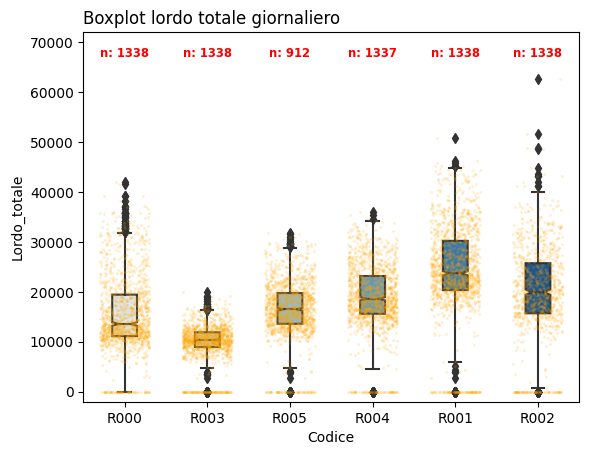

In [11]:
ax = sns.boxplot(x='Codice', y='Lordo_totale', data=df_2, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Codice', y='Lordo_totale', data=df_2, color="orange",  jitter=0.3, size=2, alpha = 0.2)

nobs = df_2.groupby("Codice").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    pl.text(pos[tick], 67000, nobs[tick], horizontalalignment='center', size='small', color='red', weight='semibold')

pl.ylim(-2000,72000)
pl.title("Boxplot lordo totale giornaliero", loc="left")
pl.show()

In [21]:
df_2_groupby_Lordo_totale = df_2.groupby(['Codice'])['Lordo_totale'].describe()
df_2_groupby_Lordo_totale = round(df_2_groupby_Lordo_totale, 2) # per arrotondare a 3 cifre decimaliù
df_2_groupby_Lordo_totale

count      mean      std  min       25%       50%       75%       max
Codice                                                                        
R000    1338.0  15533.11  7580.49  0.0  11138.11  13562.32  19440.30  41895.55
R001    1338.0  24358.23  9224.63  0.0  20350.20  23723.25  30208.83  50843.73
R002     912.0  20161.37  9078.93  0.0  15704.09  19937.25  25738.22  62623.40
R003    1337.0   9911.95  3669.78  0.0   8953.42  10365.33  11898.12  19997.85
R004    1338.0  18975.15  6584.44  0.0  15610.86  18611.26  23165.69  35933.65
R005    1338.0  16541.88  5608.85  0.0  13600.05  16504.28  19753.64  31699.78

In [22]:
# Salvataggio tabella
df_2_groupby_Lordo_totale.to_csv('tabelle/df_2_groupby_Lordo_totale.txt')

Al contrario dei valori relativi al numero di scontrini, il lordo totale cambia in maniera significativa tra i vari ristoranti: abbiamo distribuzioni più concentrate, come per il ristorante R003 (con deviazione standard di 3671), mentre per gli altri ristoranti i valori sono molto più sparsi, con picchi di 9078 e 9219 per la deviazione standard rispettivamente del ristorante R002 e R001. 

In generale, il ristorante R001 è quello con la media del lordo totale maggiore di tutti, pari a 24347, e al contrario il ristorante R003 è quello con media del lordo totale minore (9911).  

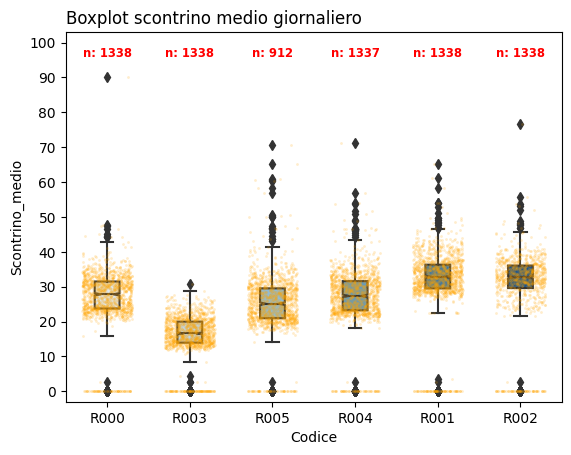

In [25]:
ax = sns.boxplot(x='Codice', y='Scontrino_medio', data=df_2, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Codice', y='Scontrino_medio', data=df_2, color="orange",  jitter=0.3, size=2, alpha = 0.2)

nobs = df_2.groupby("Codice").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    pl.text(pos[tick], 96, nobs[tick], horizontalalignment='center', size='small', color='red', weight='semibold')

pl.ylim(-3,103)
pl.yticks(np.arange(0, 110, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

In [26]:
df_2_groupby_Scontrino_medio = df_2.groupby(['Codice'])['Scontrino_medio'].describe()
df_2_groupby_Scontrino_medio = round(df_2_groupby_Scontrino_medio, 2) # per arrotondare a 3 cifre decimaliù
df_2_groupby_Scontrino_medio

count   mean    std  min    25%    50%    75%     max
Codice                                                        
R000    1338.0  27.11   9.80  0.0  23.73  27.82  31.48  243.18
R001    1338.0  31.72   9.35  0.0  29.51  32.80  36.31   65.30
R002     912.0  30.76  10.16  0.0  29.60  32.72  36.04   76.74
R003    1337.0  16.14   5.87  0.0  13.93  16.60  19.97   30.87
R004    1338.0  27.02   7.85  0.0  23.22  27.34  31.59   71.08
R005    1338.0  24.97   7.94  0.0  20.96  25.10  29.52   70.51

In [27]:
# Salvataggio tabella
df_2_groupby_Scontrino_medio.to_csv('tabelle/df_2_groupby_Scontrino_medio.txt')

Verificando ora i valori dello scontrino medio dei differenti ristoranti, notiamo che il ristorante R003 è quello meno costoso, con uno scontrino che mediamente fa incassare 16.14€; al contrario, gli altri valori sono tutti di gran lunga superiori, con picco di 30.75 e 31.72 di media per i due ristoranti R002 e R001. 

In generale, gli scontrini del ristorante R003 hanno valori molto meno variabili, con deviazione standard pari a 5.89, mentre per gli altri ristoranti gli scontrini presentano valori molto più sparsi, essendo tutti compresi tra valori della deviazione standard di 7.84 e di 10.15. 

## Giorni e festività

Verifichiamo ora se ci sono differenze particolari a livello di guadagni dei ristoranti in base al giorno della settimana.

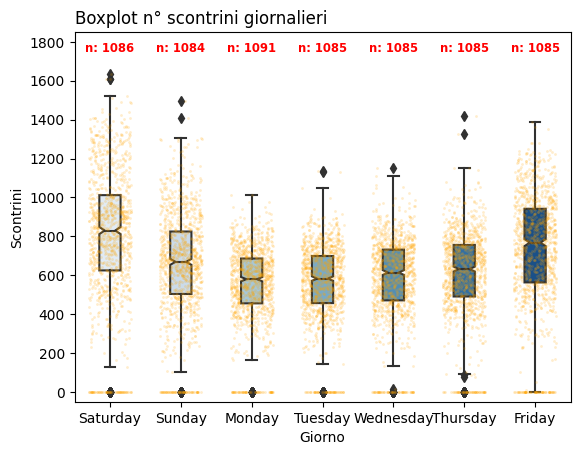

In [15]:
ax = sns.boxplot(x='Giorno', y='Scontrini', data=df_2, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=df_2, color="orange",  jitter=0.3, size=2, alpha = 0.2)

nobs = df_2.groupby("Giorno").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    pl.text(pos[tick], 1750, nobs[tick], horizontalalignment='center', size='small', color='red', weight='semibold')

pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

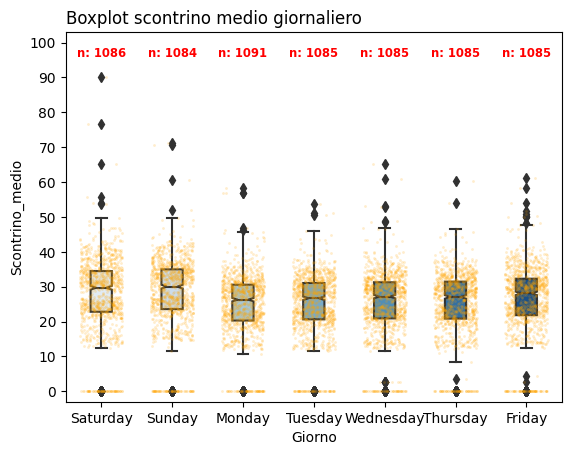

In [16]:
ax = sns.boxplot(x='Giorno', y='Scontrino_medio', data=df_2, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrino_medio', data=df_2, color="orange",  jitter=0.3, size=2, alpha = 0.2)

nobs = df_2.groupby("Giorno").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    pl.text(pos[tick], 96, nobs[tick], horizontalalignment='center', size='small', color='red', weight='semibold')

pl.ylim(-3,103)
pl.yticks(np.arange(0, 110, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

In [28]:
df_2_groupby_Scontrino2 = df_2.groupby(['Giorno'])['Scontrini'].describe()
df_2_groupby_Scontrino2 = round(df_2_groupby_Scontrino2, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_Scontrino2

count    mean     std  min     25%    50%      75%     max
Giorno                                                                
Friday     1086.0  728.51  295.17  0.0  563.25  768.0   941.75  1387.0
Monday     1084.0  553.08  198.60  0.0  455.75  580.0   686.25  1015.0
Saturday   1091.0  806.01  340.03  0.0  625.00  830.0  1012.00  1633.0
Sunday     1085.0  651.79  275.53  0.0  504.00  669.0   825.00  1496.0
Thursday   1085.0  605.90  225.06  0.0  491.00  632.0   756.00  1421.0
Tuesday    1085.0  559.47  198.92  0.0  457.00  583.0   699.00  1134.0
Wednesday  1085.0  582.52  211.91  0.0  471.00  614.0   732.00  1153.0

In [29]:
df_2_groupby_Scontrino_medio2 = df_2.groupby(['Giorno'])['Scontrino_medio'].describe()
df_2_groupby_Scontrino_medio2 = round(df_2_groupby_Scontrino_medio2, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_Scontrino_medio2

count   mean    std  min    25%    50%    75%     max
Giorno                                                           
Friday     1086.0  26.15   9.85  0.0  21.83  28.08  32.28   61.02
Monday     1084.0  24.64   8.88  0.0  20.28  26.26  30.56   58.42
Saturday   1091.0  27.69  10.67  0.0  22.80  29.68  34.47   90.01
Sunday     1085.0  28.28  12.20  0.0  23.56  30.00  34.96  243.18
Thursday   1085.0  25.21   9.00  0.0  20.84  27.06  31.43   60.22
Tuesday    1085.0  24.96   8.78  0.0  20.63  26.67  31.05   53.63
Wednesday  1085.0  25.34   9.12  0.0  20.90  27.14  31.26   65.31

In [30]:
# Salvataggio tabelle
df_2_groupby_Scontrino2.to_csv('tabelle/df_2_groupby_Scontrino2.txt')
df_2_groupby_Scontrino_medio2.to_csv('tabelle/df_2_groupby_Scontrino_medio2.txt')

A livello di scontrino medio, notiamo una piccola differenza in generale, con una spesa lievemente più elevata nel weekend (media di 27.71 e di 28.27 il sabato e la domenica, e in parte un valore di 26.14 al venerdì, mentre nel resto della settimana ci si mantiene su medie comprese tra il 24.63 del lunedì e il 25.33 del mercoledì).

La situazione cambia come numero di scontrini: come prevedibile, il numero di scontrini aumenta in modo significativo nel fine settimana, con una media di 804 per il sabato e di 651 per la domenica; anche il venerdì ha valori elevati, con una media di 728 scontrini, mentre per gli altri giorni della settimana non si supera mai i 605 scontrini medi del giovedì. 

Vediamo ora di distinguere, all'interno dei giorni della settimana, i giorni festivi con quelli feriali (considerando le feste programmate, ad esempio)

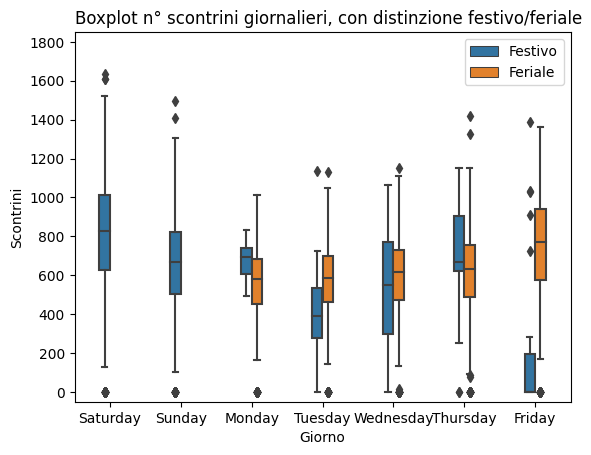

In [19]:
ax = sns.boxplot(x='Giorno', y='Scontrini', hue='Festivo_feriale', data=df_2, linewidth=1.5, notch=False, width=0.3)


pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.legend(loc='upper right')
pl.title("Boxplot n° scontrini giornalieri, con distinzione festivo/feriale", loc="left")
pl.show()

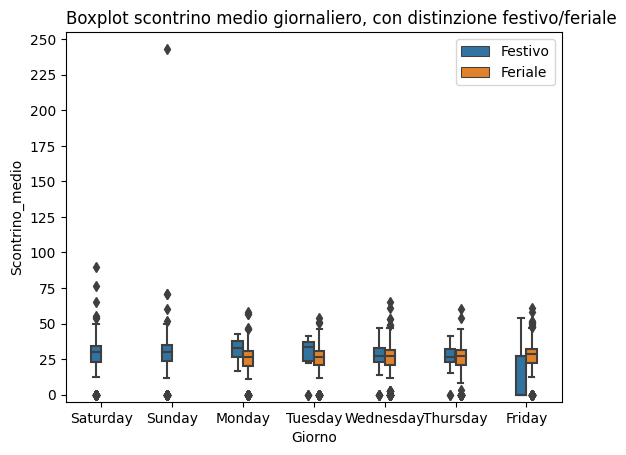

In [20]:
ax = sns.boxplot(x='Giorno', y='Scontrino_medio', hue='Festivo_feriale', data=df_2, linewidth=1.5, notch=False, width=0.3)

pl.ylim(-5,255)
pl.yticks(np.arange(0, 275, 25))
pl.legend(loc='upper right')
pl.title("Boxplot scontrino medio giornaliero, con distinzione festivo/feriale", loc="left")
pl.show()

In [31]:
df_2_groupby_Scontrino3 = df_2.groupby(['Giorno','Festivo_feriale'])['Scontrini'].describe()
df_2_groupby_Scontrino3 = round(df_2_groupby_Scontrino3, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_Scontrino3

count    mean     std    min     25%    50%  \
Giorno    Festivo_feriale                                                 
Friday    Feriale          1062.0  739.62  282.10    0.0  575.25  772.0   
          Festivo            24.0  237.17  425.92    0.0    0.00    0.0   
Monday    Feriale          1067.0  551.01  199.19    0.0  453.00  579.0   
          Festivo            17.0  682.82   89.98  493.0  609.00  695.0   
Saturday  Festivo          1091.0  806.01  340.03    0.0  625.00  830.0   
Sunday    Festivo          1085.0  651.79  275.53    0.0  504.00  669.0   
Thursday  Feriale          1058.0  603.85  222.96    0.0  490.25  630.0   
          Festivo            27.0  686.15  289.70    0.0  620.50  666.0   
Tuesday   Feriale          1063.0  562.44  196.40    0.0  461.00  586.0   
          Festivo            22.0  415.95  264.43    0.0  275.75  392.5   
Wednesday Feriale          1045.0  584.26  207.11    0.0  473.00  616.0   
          Festivo            40.0  537.02  312.47    0.0  296.00  549.5   

                               75%     max  
Giorno    Festivo_feriale                   
Friday    Feriale           942.00  1364.0  
          Festivo           193.75  1387.0  
Monday    Feriale           684.50  1015.0  
          Festivo           741.00   832.0  
Saturday  Festivo          1012.00  1633.0  
Sunday    Festivo           825.00  1496.0  
Thursday  Feriale           755.75  1421.0  
          Festivo           903.50  1153.0  
Tuesday   Feriale           700.50  1129.0  
          Festivo           535.50  1134.0  
Wednesday Feriale           730.00  1153.0  
          Festivo           770.50  1065.0

In [32]:
df_2_groupby_Scontrino_medio3 = df_2.groupby(['Giorno','Festivo_feriale'])['Scontrino_medio'].describe()
df_2_groupby_Scontrino_medio3 = round(df_2_groupby_Scontrino_medio3, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_Scontrino_medio3

count   mean    std    min    25%    50%    75%  \
Giorno    Festivo_feriale                                                     
Friday    Feriale          1062.0  26.43   9.37   0.00  21.98  28.23  32.29   
          Festivo            24.0  13.69  18.99   0.00   0.00   0.00  27.22   
Monday    Feriale          1067.0  24.52   8.86   0.00  20.25  26.11  30.48   
          Festivo            17.0  32.11   6.75  16.38  26.24  32.95  37.75   
Saturday  Festivo          1091.0  27.69  10.67   0.00  22.80  29.68  34.47   
Sunday    Festivo          1085.0  28.28  12.20   0.00  23.56  30.00  34.96   
Thursday  Feriale          1058.0  25.20   8.98   0.00  20.79  27.11  31.42   
          Festivo            27.0  25.62   9.74   0.00  23.00  26.47  32.06   
Tuesday   Feriale          1063.0  24.90   8.68   0.00  20.56  26.59  30.94   
          Festivo            22.0  28.07  12.70   0.00  23.80  33.28  36.97   
Wednesday Feriale          1045.0  25.32   9.00   0.00  20.89  27.16  31.24   
          Festivo            40.0  25.69  11.95   0.00  22.98  27.03  32.95   

                              max  
Giorno    Festivo_feriale          
Friday    Feriale           61.02  
          Festivo           53.98  
Monday    Feriale           58.42  
          Festivo           42.58  
Saturday  Festivo           90.01  
Sunday    Festivo          243.18  
Thursday  Feriale           60.22  
          Festivo           40.91  
Tuesday   Feriale           53.63  
          Festivo           41.08  
Wednesday Feriale           65.31  
          Festivo           46.69

In [33]:
# Salvataggio tabelle
df_2_groupby_Scontrino3.to_csv('tabelle/df_2_groupby_Scontrino3.txt')
df_2_groupby_Scontrino_medio3.to_csv('tabelle/df_2_groupby_Scontrino_medio3.txt')

Ovviamente non abbiamo dati feriali relativi al sabato e alla domenica. Per gli altri giorni, invece, notiamo che abbiamo un numero esiguo di giorni normalmente feriali ma che sono festa perchè coincidono con feste (Pasqua, Natale...), da un minimo di 17 volte il lunedì fino ad un massimo di 40 volte per il mercoledì. 

In generale, il comportamento è molto variegato, con alcuni giorni in cui le feste portano i clienti ad uscire ed andare al ristorante maggiormente (il lunedì ad esempio, dove la media di scontrini passa da 551 a 682, e nello stesso modo si comporta anche il giovedì), ed altri giorni in cui il numero di clienti cala (il martedì, il mercoledì e soprattutto il venerdì, con un calo drastico da 739 scontrini di media nei venerdì feriali a 237 di media nei venerdì festivi). 

Per quanto riguarda invece lo scontrino medio, il mercoledì e il giovedì la differenza è pressochè nulla tra giorni festivi e feriali; il martedì, lo scontrino medio aumenta leggermente dal caso feriale al festivo (da 24.89€ di media a 28.07€ di media), il lunedì aumenta in maniera più significativa, da 24.51€ di media a 32.11€ di media (ma valore da tenere d'occhio, in quanto non ci sono stati venerdì festivi con 0 scontrini, caso unico nell'intero dataset dove sia per giorni festivi che feriali c'è sempre stato almeno un minimo di 0 scontrini). Invece, il venerdì il valore crolla, con una media che si dimezza da 26.42€ di media dello scontrino medio a 13.69€

Inoltre, verifichiamo se una festa in particolare porta le persone ad andare maggiormente al ristorante, e se questi sono portati a spendere in maniera più significativa rispetto al normale. 

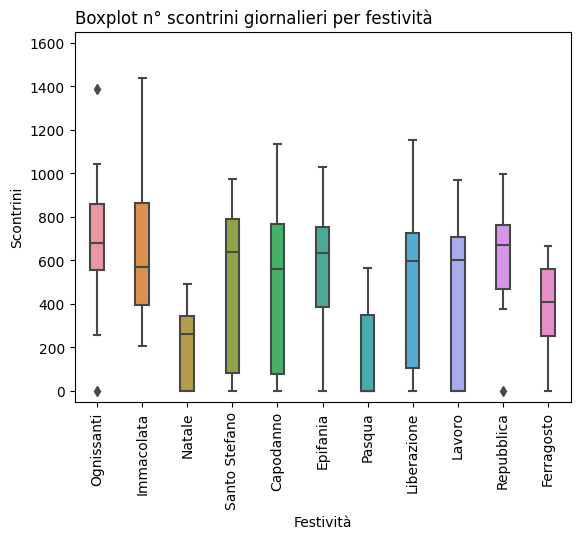

In [23]:
ax = sns.boxplot(x='Festività', y='Scontrini', data=df_2[df_2['Festività'] != 'No'], linewidth=1.5, notch=False, width=0.3)

pl.ylim(-50,1650)
pl.yticks(np.arange(0, 1800, 200))
ax.tick_params(axis='x', labelrotation=90)
pl.title("Boxplot n° scontrini giornalieri per festività", loc="left")
pl.show()

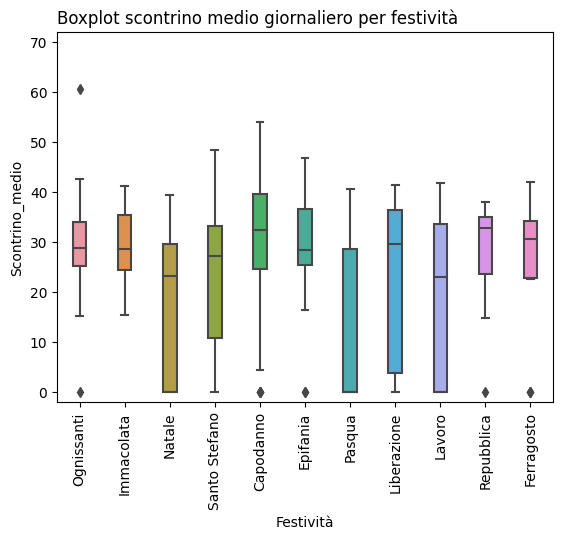

In [24]:
ax = sns.boxplot(x='Festività', y='Scontrino_medio', data=df_2[df_2['Festività'] != 'No'], linewidth=1.5, notch=False, width=0.3)

pl.ylim(-2,72)
pl.yticks(np.arange(0, 80, 10))
ax.tick_params(axis='x', labelrotation=90)
pl.title("Boxplot scontrino medio giornaliero per festività", loc="left")
pl.show()

In [34]:
df_2_groupby_festività = df_2.groupby(['Festività'])['Scontrini'].describe()
df_2_groupby_festività = round(df_2_groupby_festività, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_festività

count    mean     std    min     25%    50%     75%     max
Festività                                                                  
Capodanno        23.0  494.91  391.48    0.0   76.50  562.0  768.00  1134.0
Epifania         23.0  564.74  270.79    0.0  385.00  634.0  751.50  1030.0
Ferragosto       17.0  377.59  227.82    0.0  254.00  407.0  562.00   666.0
Immacolata       23.0  681.78  343.77  208.0  396.00  570.0  863.00  1437.0
Lavoro           17.0  451.29  363.86    0.0    0.00  599.0  705.00   970.0
Liberazione      22.0  505.59  358.94    0.0  103.25  597.5  723.25  1153.0
Natale           23.0  208.26  184.33    0.0    0.00  261.0  343.50   491.0
No             7367.0  646.38  264.83    0.0  501.00  653.0  795.00  1633.0
Ognissanti       23.0  691.09  296.68    0.0  556.00  681.0  861.00  1387.0
Pasqua           23.0  157.83  210.68    0.0    0.00    0.0  349.50   564.0
Repubblica       17.0  628.00  251.07    0.0  470.00  669.0  761.00   998.0
Santo Stefano    23.0  503.43  373.73    0.0   83.00  636.0  789.50   976.0

In [35]:
df_2_groupby_festività2 = df_2.groupby(['Festività'])['Scontrino_medio'].describe()
df_2_groupby_festività2 = round(df_2_groupby_festività2, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_festività2

count   mean    std    min    25%    50%    75%     max
Festività                                                              
Capodanno        23.0  28.33  16.67   0.00  24.49  32.44  39.60   53.98
Epifania         23.0  28.70  12.08   0.00  25.39  28.45  36.54   46.69
Ferragosto       17.0  25.61  13.27   0.00  22.67  30.48  34.14   41.95
Immacolata       23.0  29.35   7.19  15.38  24.42  28.61  35.36   41.08
Lavoro           17.0  19.22  15.89   0.00   0.00  23.00  33.49   41.72
Liberazione      22.0  23.28  15.94   0.00   3.74  29.55  36.38   41.29
Natale           23.0  17.45  14.95   0.00   0.00  23.22  29.64   39.41
No             7367.0  26.10   9.74   0.00  21.37  27.47  32.22  243.18
Ognissanti       23.0  29.04  11.26   0.00  25.14  28.74  33.94   60.51
Pasqua           23.0  12.11  15.85   0.00   0.00   0.00  28.49   40.65
Repubblica       17.0  28.21  10.29   0.00  23.56  32.83  35.00   37.94
Santo Stefano    23.0  23.68  15.91   0.00  10.72  27.14  33.16   48.32

In [36]:
# Salvataggio tabelle
df_2_groupby_festività.to_csv('tabelle/df_2_groupby_festività.txt')
df_2_groupby_festività2.to_csv('tabelle/df_2_groupby_festività2.txt')

Le medie dei numeri di scontrini sono molto variabili (anche considerate rispetto al 646 di media del numero di scontrini): alcune festività hanno valori medi molto esigui, come Pasqua, Natale e Ferragosto (valori della media di rispettivamente di 157, 208 e 377 scontrini), mentre le altre festività si avvicinano tutte ai valori dei giorni non di festività (tutte con medie comprese tra 451 e 691). 

Da notare alcune particolarità, come il fatto che l'Immacolata abbia sempre fatto registrare un numero significativo di scontrini, per cui il minimo numero di scontrini è di 208 (tutte le altre festività hanno avuto almeno un giorno di chiusura, e quindi hanno minimo 0). Inoltre, oltre il 25% delle ricorrenze di Natale, Pasqua e Festa del Lavoro hanno avuto valori pari a 0, probabilmente per le chiusure a causa del Covid19. Anche per questi motivi, i valori delle medie degli scontrini medi risentono particolarmente di questi valori pari a 0, motivo per cui sono le uniche medie degli scontrini medi minori di 20 sono di Pasqua, Natale e Festa del Lavoro, con rispettivamente 12.10€, 17.44€ e 19.22€. 

Tutte le altre medie degli scontrini medi si avvicinano alla media dei giorni non di festa (pari a 26.10€), con valori compresi tra 23.28€ e 29.34€. 

Infine, verifichiamo se una stagione porta ad un numero superiore di clienti e di vendite.

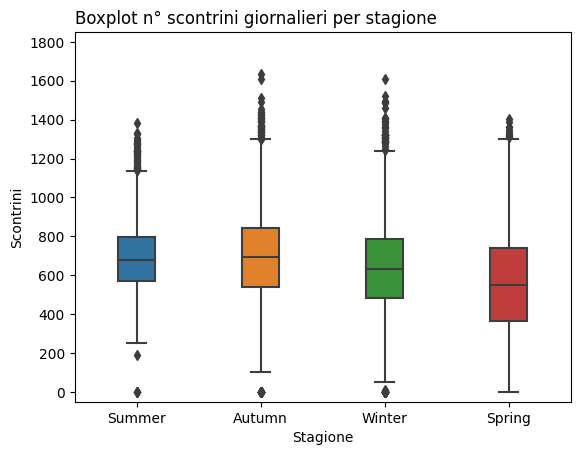

In [27]:
ax = sns.boxplot(x='Stagione', y='Scontrini', data=df_2, linewidth=1.5, notch=False, width=0.3)

pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri per stagione", loc="left")
pl.show()

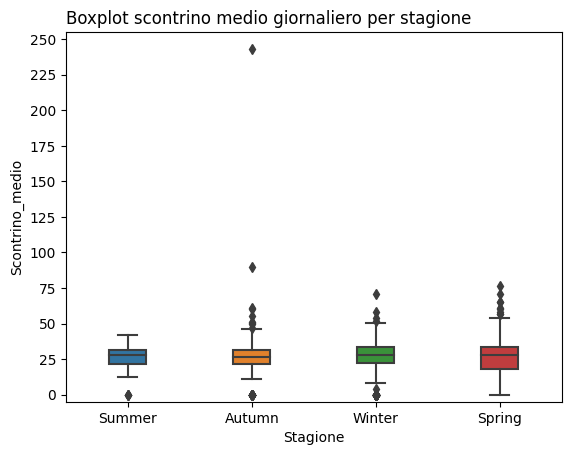

In [28]:
ax = sns.boxplot(x='Stagione', y='Scontrino_medio', data=df_2, linewidth=1.5, notch=False, width=0.3)

pl.ylim(-5,255)
pl.yticks(np.arange(0, 275, 25))
pl.title("Boxplot scontrino medio giornaliero per stagione", loc="left")
pl.show()

In [29]:
df_2.groupby(['Stagione'])['Scontrini'].describe()

count        mean         std  min     25%    50%    75%     max
Stagione                                                                   
Autumn    2030.0  701.929064  250.312014  0.0  539.00  692.5  844.0  1633.0
Spring    1809.0  526.529574  320.435065  0.0  367.00  552.0  742.0  1402.0
Summer    1686.0  695.347568  182.137673  0.0  569.25  678.0  797.0  1381.0
Winter    2076.0  637.742293  265.189984  0.0  485.00  632.5  789.0  1611.0

In [30]:
df_2.groupby(['Stagione'])['Scontrino_medio'].describe()

count       mean        std  min     25%     50%      75%     max
Stagione                                                                    
Autumn    2030.0  26.465099   9.217672  0.0  21.830  26.460  31.6725  243.18
Spring    1809.0  23.917761  13.510788  0.0  18.110  27.550  33.2900   76.74
Summer    1686.0  26.377977   6.302056  0.0  21.715  27.765  31.1300   41.95
Winter    2076.0  27.194273   9.048173  0.0  22.330  27.990  33.4700   70.51

Dai risultati ottenuti sembra che ci sia un numero molto più alto di clienti in autunno e in estate, soprattutto rispetto alla primavera (medie di 701 e 695 scontrini al giorno, rispetto ai 526 medi della primavera); tuttavia, questi valori potrebbero essere influenzati dai periodi di lockdown, come quello della primavera del 2020, dove molti giorni di chiusura consecutivi potrebbero aver condizionato verso il basso in maniera significativa i valori della media. 

Allo stesso modo il costo medio dello scontrino medio giornaliero è molto simile per autunno, estate e inverno (con valori compresi tra 26.37€ e 27.19€), mentre cala in maniera più decisa in primavera, toccando quote della media di 23.91€ per scontrino medio

## Differenze causate dalla pandemia

Vediamo ora se c'è qualche differenza significativa, nei singoli ristoranti, nel cambiamento di prezzi prima e dopo l'inizio della pandemia da Covid-19. 

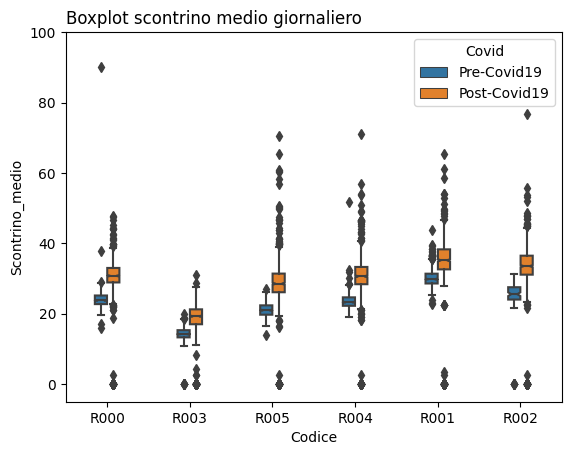

In [37]:
sns.boxplot(x='Codice', y='Scontrino_medio', hue = 'Covid', data=df_2, linewidth=1.5, notch=True, width=0.3)

pl.ylim(-5,100)
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

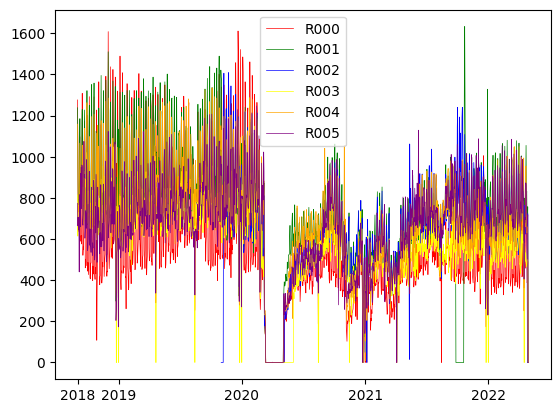

In [80]:
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R000"], color='red', label="R000", linewidth=0.5)
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R001"], color='green', label="R001", linewidth=0.5)
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R002"], color='blue', label="R002", linewidth=0.5)
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R003"], color='yellow', label="R003", linewidth=0.5)
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R004"], color='orange', label="R004", linewidth=0.5)
pl.plot('Data', 'Scontrini', data=df_2[df_2['Codice'] == "R005"], color='purple', label="R005", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
pl.legend()
pl.show()

In [83]:
df_2_groupby_covid1 = df_2.groupby(['Codice','Covid'])['Scontrino_medio'].describe()
df_2_groupby_covid1 = round(df_2_groupby_covid1, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_covid1

count   mean    std    min    25%    50%    75%     max
Codice Covid                                                                
R000   Post-Covid19  800.0  28.91   9.20   0.00  28.89  30.76  33.01   47.71
       Pre-Covid19   538.0  24.45  10.05  15.99  22.73  23.80  25.18  243.18
R001   Post-Covid19  800.0  32.69  11.82   0.00  32.60  35.17  38.29   65.30
       Pre-Covid19   538.0  30.28   2.50  22.84  28.59  29.82  31.38   43.76
R002   Post-Covid19  800.0  31.64  10.25   0.00  31.10  33.52  36.49   76.74
       Pre-Covid19   112.0  24.45   6.69   0.00  24.02  25.55  27.53   31.35
R003   Post-Covid19  799.0  17.47   7.04   0.00  17.01  19.28  21.24   30.87
       Pre-Covid19   538.0  14.17   2.35   0.00  13.28  14.21  15.33   19.84
R004   Post-Covid19  800.0  29.34   9.29   0.00  28.38  30.63  33.29   71.08
       Pre-Covid19   538.0  23.57   2.20  19.05  22.25  23.27  24.65   51.75
R005   Post-Covid19  800.0  27.59   9.28   0.00  26.10  28.51  31.40   70.51
       Pre-Covid19   538.0  21.08   1.94  14.06  19.72  20.99  22.38   26.93

In [84]:
# Salvataggio tabelle
df_2_groupby_covid1.to_csv('tabelle/df_2_groupby_covid1.txt')

Si osserva che in generale lo scontrino medio è aumentato per tutti e sei i ristoranti prima e dopo l'inizio della pandemia: il ristorante che ha aumentato maggiormente i prezzi è il ristorante R002, dove la media è passata da 24.44€ a 31.64€, un incremento del 22.75%. Al contrario, il ristorante R001 è quello che ha aumentato meno i prezzi, con una differenza di soli 2.41€ tra lo scontrino medio Pre-Covid19 e Post-Covid19. 

## Aumento dei prezzi e inflazione

Verifichiamo se l'andamento dell'inflazione corrisponde all'aumento dei prezzi che c'è stato in questi anni:

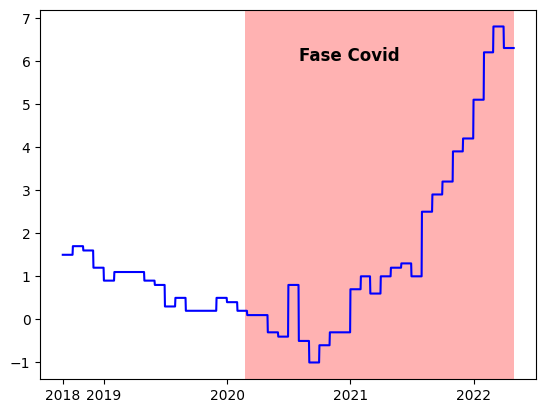

In [130]:
fig, ax = pl.subplots()
ax.plot('Data', 'Inflazione', data=df_2[df_2['Codice'] == "R000"], color='blue', label="R000", linewidth=1.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 6, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
pl.show()


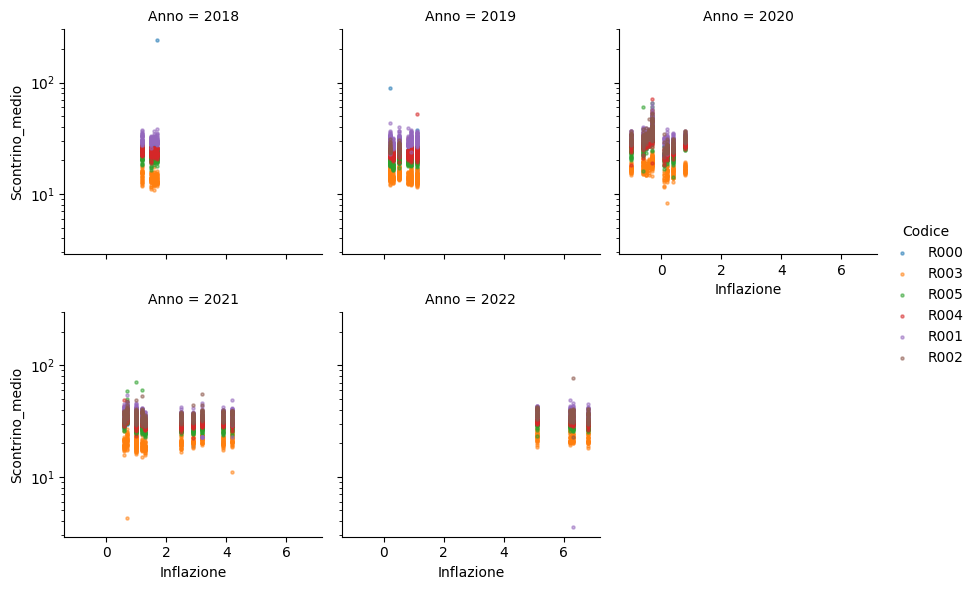

In [90]:
infl = sns.FacetGrid(df_2, col="Anno", margin_titles=True, hue="Codice", col_wrap = 3)
infl.map(sns.regplot, 'Inflazione', 'Scontrino_medio', ci = 0, line_kws={"alpha":0.7,"lw":2}, scatter_kws={"alpha":0.5,"s":5}, fit_reg=False)
infl.add_legend()
pl.yscale('log')

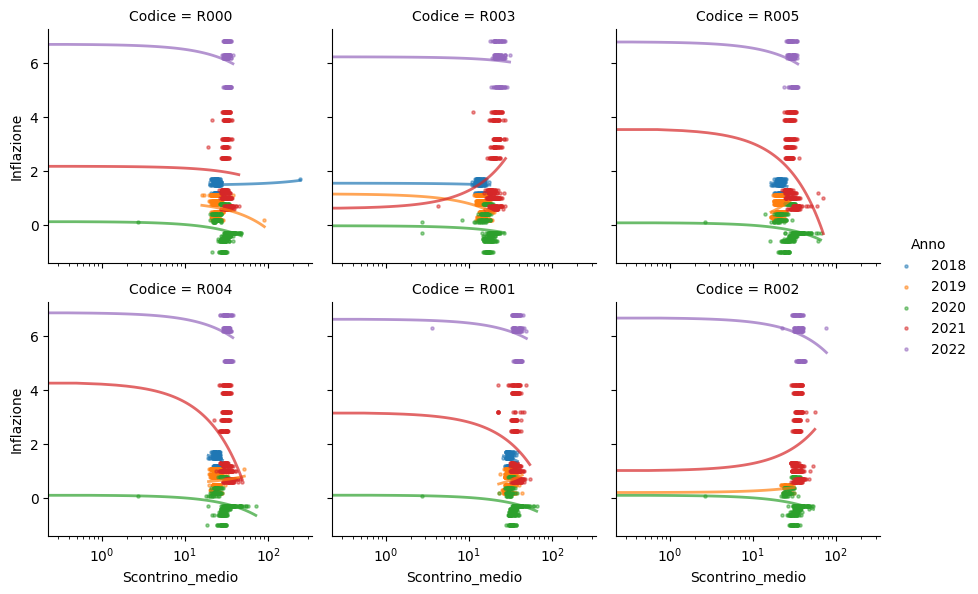

In [85]:
infl = sns.FacetGrid(df_2, col="Codice", margin_titles=True, hue="Anno", col_wrap = 3)
infl.map(sns.regplot, 'Scontrino_medio', 'Inflazione', ci = 0, line_kws={"alpha":0.7,"lw":2}, scatter_kws={"alpha":0.5,"s":5}, fit_reg=True)
infl.add_legend()
pl.xscale('log')

Si osserva che generamente, per tutti i ristoranti, i prezzi si sono mantenuti costanti nel periodo compreso tra il 2018 e il 2020. Il 2021 è stato probabilmente l'anno dove lo scontrino medio è cresciuto in maniera maggiore per tutti i ristoranti, completando l'aumento di valori nel 2022 (ma con un aumento minore, o addirittura stabile rispetto all'anno precedente come nel caso dei ristoranti R004 e R005, entrambi con un aumento di soli due centesimi sulla media dello scontrino medio)

L'inflazione, in compenso, si è mantenuta a livelli controllati fino al 2021, con una media compresa tra -0.14 e 1.96; in compenso, l'aumento consistente è stato nel 2022, dove il valore minimo è di 5.1 (considerando che dal 2018 al 2020 i valori dell'inflazione non avevano mai superato quota 1.7, e che il massimo nel 2021 era stato di 4.2) e la media di 6.09. 

In [132]:
df_2_groupby_inflazione = df_2.groupby(['Anno'])['Inflazione'].describe()
df_2_groupby_inflazione = round(df_2_groupby_inflazione, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_inflazione

count  mean   std  min  25%   50%  75%  max
Anno                                              
2018   610.0  1.50  0.19  1.2  1.2  1.55  1.7  1.7
2019  1886.0  0.64  0.35  0.2  0.2  0.50  0.9  1.1
2020  2196.0 -0.15  0.47 -1.0 -0.5 -0.30  0.1  0.8
2021  2190.0  1.96  1.25  0.6  1.0  1.30  3.2  4.2
2022   719.0  6.10  0.63  5.1  5.1  6.30  6.8  6.8

In [133]:
# Salvataggio tabelle
df_2_groupby_inflazione.to_csv('tabelle/df_2_groupby_inflazione.txt')

In [134]:
df_2_groupby_inflazione2 = df_2.groupby(['Anno'])['Scontrino_medio'].describe()
df_2_groupby_inflazione2 = round(df_2_groupby_inflazione2, 2) # per arrotondare a 3 cifre decimali
df_2_groupby_inflazione2

count   mean    std  min    25%    50%    75%     max
Anno                                                        
2018   610.0  23.04  10.66  0.0  19.97  23.07  26.02  243.18
2019  1886.0  22.57   5.93  0.0  19.60  22.86  25.92   90.01
2020  2196.0  24.22  12.94  0.0  17.85  27.84  32.54   71.08
2021  2190.0  30.03   7.38  0.0  27.07  31.09  34.38   70.51
2022   719.0  31.09   7.42  0.0  28.60  31.89  35.09   76.74

In [135]:
# Salvataggio tabelle
df_2_groupby_inflazione2.to_csv('tabelle/df_2_groupby_inflazione2.txt')

# Ristorante 1

## Pulizia dataset

Passiamo ora ad un analisi dei singoli ristoranti, iniziando col primo, il ristorante codice R000 di Montebello

In [136]:
rist1 =  pd.read_csv('dati/rist1.csv')
rist1

Codice    Location Provincia    Regione        Data  Scontrini  \
0      R000  Montebello     Pavia  Lombardia  2018-01-01      21884   
1      R000  Montebello     Pavia  Lombardia  2018-01-02          0   
2      R000  Montebello     Pavia  Lombardia  2018-01-03          0   
3      R000  Montebello     Pavia  Lombardia  2018-01-04          0   
4      R000  Montebello     Pavia  Lombardia  2018-01-05          0   
...     ...         ...       ...        ...         ...        ...   
1576   R000  Montebello     Pavia  Lombardia  2022-04-26        388   
1577   R000  Montebello     Pavia  Lombardia  2022-04-27        395   
1578   R000  Montebello     Pavia  Lombardia  2022-04-28        491   
1579   R000  Montebello     Pavia  Lombardia  2022-04-29          0   
1580   R000  Montebello     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        500409.90     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
1576      11091.28    Tuesday    April  2022  ...                    60.5   
1577      12207.08  Wednesday    April  2022  ...                    60.5   
1578      15157.88   Thursday    April  2022  ...                    60.5   
1579          0.00     Friday    April  2022  ...                    60.5   
1580          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1576   3832    4045        136          345                   56   
1577   4184    4488        124          235                   63   
1578   3616    4328        101          222                   36   
1579   3825    4642        142          226                   81   
1580   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            22.87  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
1576          3008                  4332       144121            28.59  
1577          2854                  5396       144837            30.90  
1578          2483                  5102       145343            30.87  
1579          2711                  5307       145811             0.00  
1580          3138                  4693       146203             0.00  

[1581 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [337]:
rist1 = rist1[rist1['Data'] >= '2018-09-01']
rist1 = rist1.reset_index(drop=True)
rist1_def = rist1
rist1

Codice    Location Provincia    Regione        Data  Scontrini  \
0      R000  Montebello     Pavia  Lombardia  2018-09-01       1276   
1      R000  Montebello     Pavia  Lombardia  2018-09-02       1070   
2      R000  Montebello     Pavia  Lombardia  2018-09-03        657   
3      R000  Montebello     Pavia  Lombardia  2018-09-04        647   
4      R000  Montebello     Pavia  Lombardia  2018-09-05        635   
...     ...         ...       ...        ...         ...        ...   
1333   R000  Montebello     Pavia  Lombardia  2022-04-26        388   
1334   R000  Montebello     Pavia  Lombardia  2022-04-27        395   
1335   R000  Montebello     Pavia  Lombardia  2022-04-28        491   
1336   R000  Montebello     Pavia  Lombardia  2022-04-29          0   
1337   R000  Montebello     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         32801.22   Saturday  September  2018  ...                     5.4   
1         28222.37     Sunday  September  2018  ...                     5.4   
2         16201.27     Monday  September  2018  ...                     5.4   
3         16409.71    Tuesday  September  2018  ...                     5.4   
4         15374.10  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1333      11091.28    Tuesday      April  2022  ...                    60.5   
1334      12207.08  Wednesday      April  2022  ...                    60.5   
1335      15157.88   Thursday      April  2022  ...                    60.5   
1336          0.00     Friday      April  2022  ...                    60.5   
1337          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1333   3832    4045        136          345                   56   
1334   4184    4488        124          235                   63   
1335   3616    4328        101          222                   36   
1336   3825    4642        142          226                   81   
1337   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            25.71  
1                0                     0            0            26.38  
2                0                     0            0            24.66  
3                0                     0            0            25.36  
4                0                     0            0            24.21  
...            ...                   ...          ...              ...  
1333          3008                  4332       144121            28.59  
1334          2854                  5396       144837            30.90  
1335          2483                  5102       145343            30.87  
1336          2711                  5307       145811             0.00  
1337          3138                  4693       146203             0.00  

[1338 rows x 27 columns]

Vediamo ora i valori pari a 0 come sono distribuiti

In [203]:
zero_indices = rist1[rist1['Scontrini'] == 0].index
rist1.loc[zero_indices]

Codice    Location Provincia    Regione        Data  Scontrini  \
558    R000  Montebello     Pavia  Lombardia  2020-03-12          0   
559    R000  Montebello     Pavia  Lombardia  2020-03-13          0   
560    R000  Montebello     Pavia  Lombardia  2020-03-14          0   
561    R000  Montebello     Pavia  Lombardia  2020-03-15          0   
562    R000  Montebello     Pavia  Lombardia  2020-03-16          0   
...     ...         ...       ...        ...         ...        ...   
946    R000  Montebello     Pavia  Lombardia  2021-04-04          0   
947    R000  Montebello     Pavia  Lombardia  2021-04-05          0   
1079   R000  Montebello     Pavia  Lombardia  2021-08-15          0   
1336   R000  Montebello     Pavia  Lombardia  2022-04-29          0   
1337   R000  Montebello     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale    Giorno    Mese  Anno  ... Inflazione_combustibili  \
558            0.0  Thursday   March  2020  ...                    -7.1   
559            0.0    Friday   March  2020  ...                    -7.1   
560            0.0  Saturday   March  2020  ...                    -7.1   
561            0.0    Sunday   March  2020  ...                    -7.1   
562            0.0    Monday   March  2020  ...                    -7.1   
...            ...       ...     ...   ...  ...                     ...   
946            0.0    Sunday   April  2021  ...                    11.5   
947            0.0    Monday   April  2021  ...                    11.5   
1079           0.0    Sunday  August  2021  ...                    23.1   
1336           0.0    Friday   April  2022  ...                    60.5   
1337           0.0  Saturday   April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
558       0       0          0            0                    0   
559       0       0          0            0                    0   
560       0       0          0            0                    0   
561       0       0          0            0                    0   
562       0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
946    3232    4386       3689         3902                   27   
947   11703   15698      19129         8114                  158   
1079   3989    3014       2934         3887                  182   
1336   3825    4642        142          226                   81   
1337   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
558              0                     0          468              0.0  
559              0                     0          482              0.0  
560              0                     0          622              0.0  
561              0                     0          722              0.0  
562              0                     0          801              0.0  
...            ...                   ...          ...              ...  
946              0                     0        39672              0.0  
947              0                     0        39720              0.0  
1079             0                     0        44640              0.0  
1336          2711                  5307       145811              0.0  
1337          3138                  4693       146203              0.0  

[64 rows x 27 columns]

Avendo già escluso i primi 8 mesi, i restanti giorni senza scontrini sono quelli di chiusura data dal Covid (infatti si tratta sempre di zona arancione o rossa, come indicato dalla colonna *colore*). Gli unici casi differenti riguardano tre giorni di chiusura in zona bianca, che corrispondono probabilmente a delle vacanze organizzate dal ristorante, oppure a chiusure per malattia.

In [204]:
rist1['Colore'].loc[zero_indices].value_counts()

rosso        58
arancione     3
bianco        3
Name: Colore, dtype: int64

In [205]:
rist1.loc[zero_indices][rist1['Colore'] == 'bianco']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\798600346.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist1.loc[zero_indices][rist1['Colore'] == 'bianco']


Codice    Location Provincia    Regione        Data  Scontrini  \
1079   R000  Montebello     Pavia  Lombardia  2021-08-15          0   
1336   R000  Montebello     Pavia  Lombardia  2022-04-29          0   
1337   R000  Montebello     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale    Giorno    Mese  Anno  ... Inflazione_combustibili  \
1079           0.0    Sunday  August  2021  ...                    23.1   
1336           0.0    Friday   April  2022  ...                    60.5   
1337           0.0  Saturday   April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
1079   3989    3014       2934         3887                  182   
1336   3825    4642        142          226                   81   
1337   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
1079             0                     0        44640              0.0  
1336          2711                  5307       145811              0.0  
1337          3138                  4693       146203              0.0  

[3 rows x 27 columns]

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [206]:
rist1_no0 = rist1[rist1['Scontrini'] > 0]
rist1_no0 = rist1_no0.reset_index(drop=True)
rist1_no0

Codice    Location Provincia    Regione        Data  Scontrini  \
0      R000  Montebello     Pavia  Lombardia  2018-09-01       1276   
1      R000  Montebello     Pavia  Lombardia  2018-09-02       1070   
2      R000  Montebello     Pavia  Lombardia  2018-09-03        657   
3      R000  Montebello     Pavia  Lombardia  2018-09-04        647   
4      R000  Montebello     Pavia  Lombardia  2018-09-05        635   
...     ...         ...       ...        ...         ...        ...   
1269   R000  Montebello     Pavia  Lombardia  2022-04-24        751   
1270   R000  Montebello     Pavia  Lombardia  2022-04-25        596   
1271   R000  Montebello     Pavia  Lombardia  2022-04-26        388   
1272   R000  Montebello     Pavia  Lombardia  2022-04-27        395   
1273   R000  Montebello     Pavia  Lombardia  2022-04-28        491   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         32801.22   Saturday  September  2018  ...                     5.4   
1         28222.37     Sunday  September  2018  ...                     5.4   
2         16201.27     Monday  September  2018  ...                     5.4   
3         16409.71    Tuesday  September  2018  ...                     5.4   
4         15374.10  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1269      25958.64     Sunday      April  2022  ...                    60.5   
1270      22498.51     Monday      April  2022  ...                    60.5   
1271      11091.28    Tuesday      April  2022  ...                    60.5   
1272      12207.08  Wednesday      April  2022  ...                    60.5   
1273      15157.88   Thursday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1269    636     684         42          151                   51   
1270    436     419         13           43                   14   
1271   3832    4045        136          345                   56   
1272   4184    4488        124          235                   63   
1273   3616    4328        101          222                   36   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            25.71  
1                0                     0            0            26.38  
2                0                     0            0            24.66  
3                0                     0            0            25.36  
4                0                     0            0            24.21  
...            ...                   ...          ...              ...  
1269           620                   456       143747            34.57  
1270           429                   356       143897            37.75  
1271          3008                  4332       144121            28.59  
1272          2854                  5396       144837            30.90  
1273          2483                  5102       145343            30.87  

[1274 rows x 27 columns]

In [338]:
# csv dataset completo
rist1_def.to_csv('dati/rist1_def.csv', index=False)
rist1_no0.to_csv('dati/rist1_no0.csv', index=False)

## Grafici

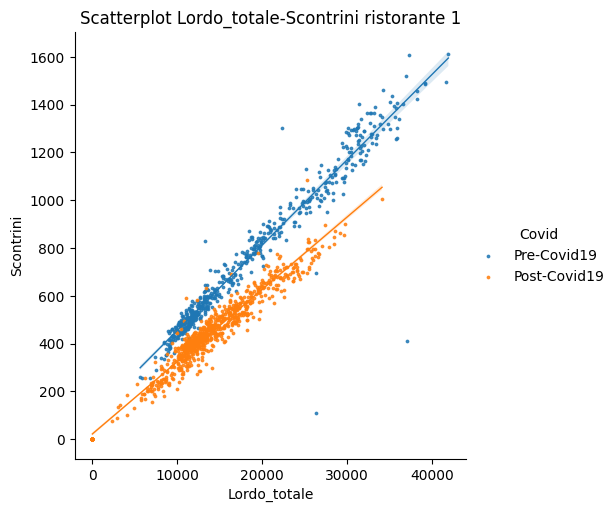

In [244]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist1, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 1')
pl.show()

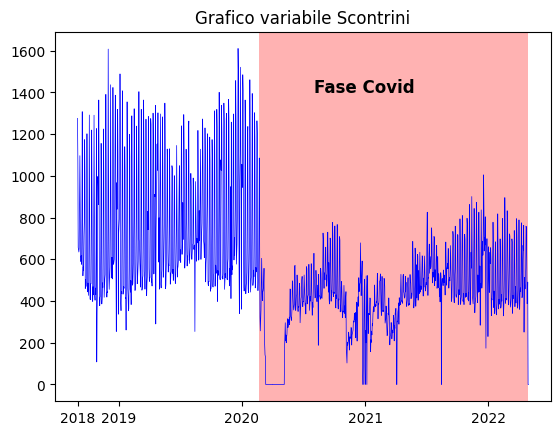

In [181]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist1, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 1400, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

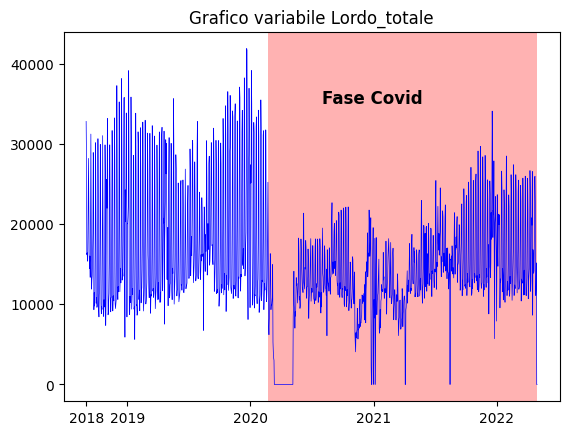

In [257]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist1, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 35000, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

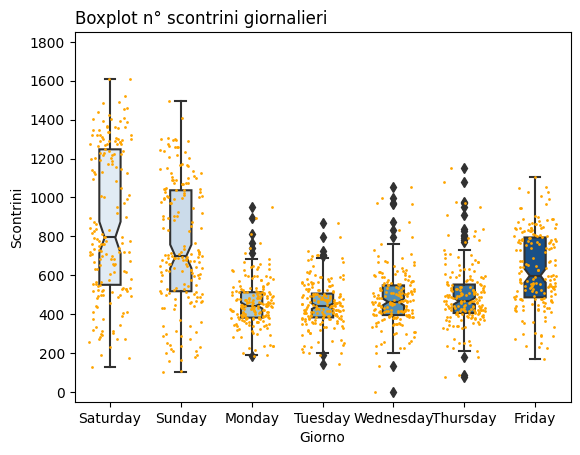

In [144]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist1_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist1_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

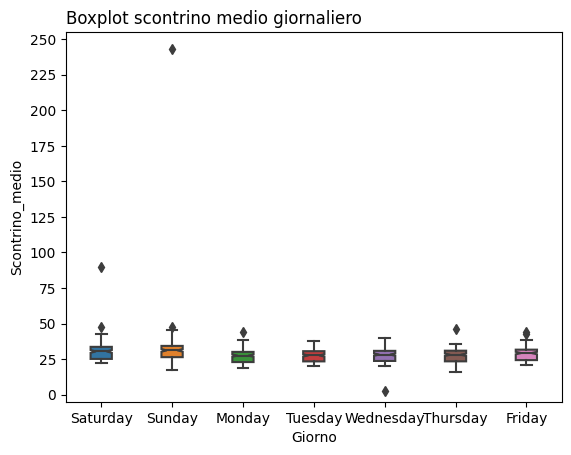

In [145]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist1_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-5,255)
pl.yticks(np.arange(0, 275, 25))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Osserviamo che tutti i valori sono solitamente compresi tra 15 e 50 euro circa di media per lo scontrino medio, tranne due outlier: un valore di circa 95 per un sabato, e un valore di circa 240 in una domenica. 

Potrebbero significare cerimonie importanti, come matrimoni o simili (infatti notiamo che sono stati effettuati nel weekend: la domenica con 240 euro di media per scontrino ha uno dei valori più bassi di scontrini, di 108, quando la media la domenica è intorno ai 700; quello del sabato ha comunque un numero di 412 scontrini rispetto alla media di 800 scontrini circa). 

In generale, sembra essere un locale che lavora molto nel fine settimana, un po' meno nei giorni feriali. 

In [318]:
rist1_no0[rist1_no0['Scontrino_medio'] > 50]

Codice    Location Provincia    Regione        Data  Scontrini  \
57    R000  Montebello     Pavia  Lombardia  2018-10-28        108   
455   R000  Montebello     Pavia  Lombardia  2019-11-30        412   

     Lordo_totale    Giorno      Mese  Anno  ... Inflazione_combustibili  \
57       26263.44    Sunday   October  2018  ...                    10.0   
455      37083.74  Saturday  November  2019  ...                    -4.7   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
57       0       0          0            0                    0             0   
455      0       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
57                      0            0           243.18  
455                     0            0            90.01  

[2 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

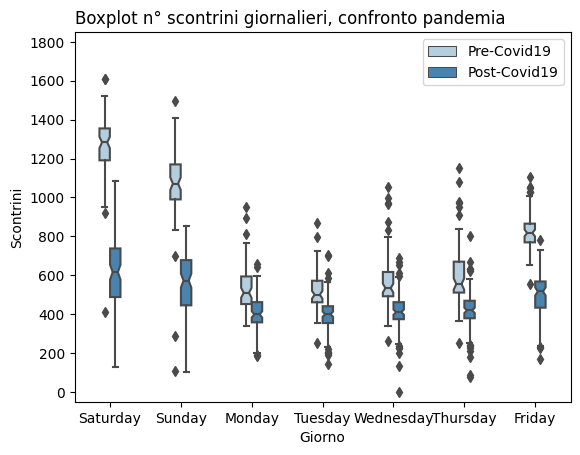

In [326]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist1_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.legend(loc='upper right')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Generalmente il numero di scontrini è calato, in maniera più consistente nel fine settimana, meno durante la settimana.

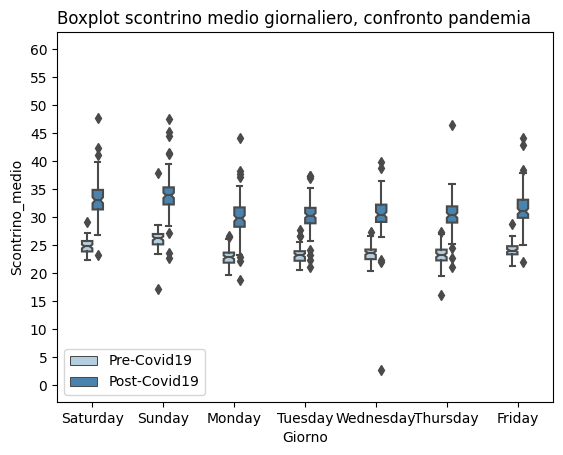

In [328]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist1_no0[rist1_no0['Scontrino_medio'] < 60], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-3,63)
pl.yticks(np.arange(0, 65, 5))
pl.legend(loc='lower left')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Allo stesso modo notiamo come lo scontrino medio sia aumentato in maniera significativa pre e post Covid: siccome è poco realistico ipotizare che le persone dall'inizio della pandemia abbiano iniziato ad uscire a mangiare maggiormente in gruppo (per le restrizioni Covid), si può ipotizzare invece un significativo aumento dei prezzi, come evidenziato dagli aumenti dei valori di inflazione presentati nella sezione generale di data exploration. 

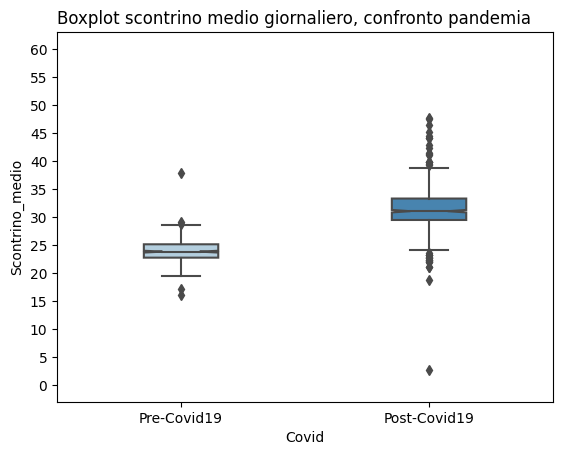

In [329]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist1_no0[rist1_no0['Scontrino_medio'] < 60], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-3,63)
pl.yticks(np.arange(0, 65, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [248]:
rist1_scontrini_anno = rist1.groupby(['Anno'])['Scontrini'].describe()
rist1_scontrini_anno = round(rist1_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist1_scontrini_anno

count    mean     std    min     25%    50%      75%     max
Anno                                                              
2018  122.0  737.22  322.32  108.0  464.25  641.0   970.75  1608.0
2019  365.0  774.11  297.69  254.0  530.00  683.0  1003.00  1611.0
2020  366.0  401.63  278.62    0.0  251.00  411.5   505.00  1485.0
2021  365.0  474.18  154.00    0.0  387.00  462.0   556.00  1005.0
2022  120.0  515.22  159.79    0.0  395.75  473.5   636.00   896.0

In [249]:
rist1_Scontrino_medio_anno = rist1.groupby(['Anno'])['Scontrino_medio'].describe()
rist1_Scontrino_medio_anno = round(rist1_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist1_Scontrino_medio_anno

count   mean    std    min    25%    50%    75%     max
Anno                                                         
2018  122.0  25.88  19.91  19.83  22.84  24.18  25.36  243.18
2019  365.0  24.05   3.98  15.99  22.73  23.73  25.06   90.01
2020  366.0  25.35  11.96   0.00  23.56  28.84  32.43   47.71
2021  365.0  30.93   4.54   0.00  29.51  30.90  32.87   44.41
2022  120.0  31.47   4.58   0.00  30.48  31.48  33.48   37.75

In [252]:
rist1_scontrini_Giorno = rist1.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist1_scontrini_Giorno = round(rist1_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist1_scontrini_Giorno

count     mean     std    min      25%     50%  \
Giorno    Covid                                                          
Friday    Post-Covid19  115.0   447.47  182.96    0.0   412.00   493.0   
          Pre-Covid19    76.0   825.67   97.86  555.0   769.25   817.5   
Monday    Post-Covid19  114.0   371.89  141.64    0.0   339.50   389.0   
          Pre-Covid19    77.0   528.56  116.46  337.0   452.00   510.0   
Saturday  Post-Covid19  115.0   540.37  251.92    0.0   383.50   565.0   
          Pre-Covid19    77.0  1259.61  170.85  412.0  1191.00  1283.0   
Sunday    Post-Covid19  114.0   486.56  226.11    0.0   338.00   531.5   
          Pre-Covid19    77.0  1061.25  205.05  108.0   990.00  1071.0   
Thursday  Post-Covid19  114.0   388.69  146.56    0.0   361.50   415.5   
          Pre-Covid19    77.0   600.97  163.02  254.0   511.00   555.0   
Tuesday   Post-Covid19  114.0   371.28  139.16    0.0   332.50   393.0   
          Pre-Covid19    77.0   519.34  100.24  254.0   461.00   500.0   
Wednesday Post-Covid19  114.0   383.36  146.71    0.0   349.25   404.5   
          Pre-Covid19    77.0   573.55  143.35  261.0   492.00   534.0   

                            75%     max  
Giorno    Covid                          
Friday    Post-Covid19   558.00   779.0  
          Pre-Covid19    865.50  1104.0  
Monday    Post-Covid19   445.00   659.0  
          Pre-Covid19    594.00   951.0  
Saturday  Post-Covid19   728.00  1086.0  
          Pre-Covid19   1355.00  1611.0  
Sunday    Post-Covid19   672.25   853.0  
          Pre-Covid19   1170.00  1496.0  
Thursday  Post-Covid19   464.75   804.0  
          Pre-Covid19    670.00  1153.0  
Tuesday   Post-Covid19   439.50   705.0  
          Pre-Covid19    572.00   867.0  
Wednesday Post-Covid19   454.75   687.0  
          Pre-Covid19    617.00  1056.0

In [253]:
rist1_Scontrino_medio_Giorno = rist1.groupby(['Giorno','Covid'])['Scontrino_medio'].describe()
rist1_Scontrino_medio_Giorno = round(rist1_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist1_Scontrino_medio_Giorno

count   mean    std    min    25%    50%    75%  \
Giorno    Covid                                                           
Friday    Post-Covid19  115.0  28.69   9.85   0.00  29.39  30.83  32.94   
          Pre-Covid19    76.0  24.10   1.22  21.16  23.32  24.00  24.77   
Monday    Post-Covid19  114.0  27.57   8.68   0.00  27.85  29.39  31.34   
          Pre-Covid19    77.0  22.82   1.49  19.65  21.83  22.80  23.63   
Saturday  Post-Covid19  115.0  30.48  10.02   0.00  30.58  32.72  34.76   
          Pre-Covid19    77.0  25.66   7.53  22.24  23.86  24.75  25.71   
Sunday    Post-Covid19  114.0  30.98  10.19   0.00  31.57  33.66  35.16   
          Pre-Covid19    77.0  28.84  24.84  17.17  25.10  26.23  26.96   
Thursday  Post-Covid19  114.0  28.32   8.30   0.00  28.64  30.00  31.78   
          Pre-Covid19    77.0  23.18   1.88  15.99  22.23  23.18  24.16   
Tuesday   Post-Covid19  114.0  28.10   8.22   0.00  27.84  30.08  31.51   
          Pre-Covid19    77.0  23.18   1.46  20.48  22.17  23.16  23.88   
Wednesday Post-Covid19  114.0  28.22   8.58   0.00  28.76  30.30  32.01   
          Pre-Covid19    77.0  23.33   1.54  20.27  22.46  23.56  24.18   

                           max  
Giorno    Covid                 
Friday    Post-Covid19   44.11  
          Pre-Covid19    28.74  
Monday    Post-Covid19   44.18  
          Pre-Covid19    26.60  
Saturday  Post-Covid19   47.71  
          Pre-Covid19    90.01  
Sunday    Post-Covid19   47.50  
          Pre-Covid19   243.18  
Thursday  Post-Covid19   46.49  
          Pre-Covid19    27.36  
Tuesday   Post-Covid19   37.37  
          Pre-Covid19    27.65  
Wednesday Post-Covid19   39.77  
          Pre-Covid19    27.33

# Ristorante 2

## Pulizia dataset

Procediamo col secondo ristorante, col codice R001 di Piacenza

In [207]:
rist2 =  pd.read_csv('dati/rist2.csv')
rist2

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R001  Piacenza  Piacenza  Emilia-Romagna  2018-01-01      28101   
1      R001  Piacenza  Piacenza  Emilia-Romagna  2018-01-02          0   
2      R001  Piacenza  Piacenza  Emilia-Romagna  2018-01-03          0   
3      R001  Piacenza  Piacenza  Emilia-Romagna  2018-01-04          0   
4      R001  Piacenza  Piacenza  Emilia-Romagna  2018-01-05          0   
...     ...       ...       ...             ...         ...        ...   
1576   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        666   
1577   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        683   
1578   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        757   
1579   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1580   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        782775.90     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
1576      23007.81    Tuesday    April  2022  ...                    60.5   
1577      22481.66  Wednesday    April  2022  ...                    60.5   
1578       2711.66   Thursday    April  2022  ...                    60.5   
1579          0.00     Friday    April  2022  ...                    60.5   
1580          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1576   3614    3915         86          262                   62   
1577   3592    3804         71          193                   27   
1578   3838    4031         77          234                   29   
1579   3147    3291         73          152                   40   
1580   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            27.86  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
1576          1469                  5650        71843            34.55  
1577          1160                  5945        72033            32.92  
1578          1528                  6001        72263             3.58  
1579           976                  5197        72488             0.00  
1580          1149                  3638        72676             0.00  

[1581 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [339]:
rist2 = rist2[rist2['Data'] >= '2018-09-01']
rist2 = rist2.reset_index(drop=True)
rist2_def = rist2
rist2

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-01       1238   
1      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-02        971   
2      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-03        782   
3      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-04        793   
4      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-05        758   
...     ...       ...       ...             ...         ...        ...   
1333   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        666   
1334   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        683   
1335   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        757   
1336   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1337   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         38517.71   Saturday  September  2018  ...                     5.4   
1         32030.86     Sunday  September  2018  ...                     5.4   
2         23656.43     Monday  September  2018  ...                     5.4   
3         23798.23    Tuesday  September  2018  ...                     5.4   
4         22018.01  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1333      23007.81    Tuesday      April  2022  ...                    60.5   
1334      22481.66  Wednesday      April  2022  ...                    60.5   
1335       2711.66   Thursday      April  2022  ...                    60.5   
1336          0.00     Friday      April  2022  ...                    60.5   
1337          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1333   3614    3915         86          262                   62   
1334   3592    3804         71          193                   27   
1335   3838    4031         77          234                   29   
1336   3147    3291         73          152                   40   
1337   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            31.11  
1                0                     0            0            32.99  
2                0                     0            0            30.25  
3                0                     0            0            30.01  
4                0                     0            0            29.05  
...            ...                   ...          ...              ...  
1333          1469                  5650        71843            34.55  
1334          1160                  5945        72033            32.92  
1335          1528                  6001        72263             3.58  
1336           976                  5197        72488             0.00  
1337          1149                  3638        72676             0.00  

[1338 rows x 27 columns]

Vediamo ora i valori pari a 0 come sono distribuiti

In [209]:
zero_indices = rist2[rist2['Scontrini'] == 0].index
rist2.loc[zero_indices]

Codice  Location Provincia         Regione        Data  Scontrini  \
558    R001  Piacenza  Piacenza  Emilia-Romagna  2020-03-12          0   
559    R001  Piacenza  Piacenza  Emilia-Romagna  2020-03-13          0   
560    R001  Piacenza  Piacenza  Emilia-Romagna  2020-03-14          0   
561    R001  Piacenza  Piacenza  Emilia-Romagna  2020-03-15          0   
562    R001  Piacenza  Piacenza  Emilia-Romagna  2020-03-16          0   
...     ...       ...       ...             ...         ...        ...   
1143   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-18          0   
1144   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-19          0   
1145   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-20          0   
1336   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1337   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
558            0.0   Thursday    March  2020  ...                    -7.1   
559            0.0     Friday    March  2020  ...                    -7.1   
560            0.0   Saturday    March  2020  ...                    -7.1   
561            0.0     Sunday    March  2020  ...                    -7.1   
562            0.0     Monday    March  2020  ...                    -7.1   
...            ...        ...      ...   ...  ...                     ...   
1143           0.0     Monday  October  2021  ...                    26.8   
1144           0.0    Tuesday  October  2021  ...                    26.8   
1145           0.0  Wednesday  October  2021  ...                    26.8   
1336           0.0     Friday    April  2022  ...                    60.5   
1337           0.0   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
558       0       0          0            0                    0   
559       0       0          0            0                    0   
560       0       0          0            0                    0   
561       0       0          0            0                    0   
562       0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1143   7721    7560       3079         5630                  254   
1144   6942    7340       2471         4772                  237   
1145   6095    6132       2385         4439                  285   
1336   3147    3291         73          152                   40   
1337   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
558              0                     0          679              0.0  
559              0                     0          710              0.0  
560              0                     0          853              0.0  
561              0                     0         1012              0.0  
562              0                     0         1073              0.0  
...            ...                   ...          ...              ...  
1143          6318                     0        25613              0.0  
1144          6802                     0        25619              0.0  
1145          5118                     0        25624              0.0  
1336           976                  5197        72488              0.0  
1337          1149                  3638        72676              0.0  

[80 rows x 27 columns]

In [210]:
rist2.loc[zero_indices[52:]]

Codice  Location Provincia         Regione        Data  Scontrini  \
846    R001  Piacenza  Piacenza  Emilia-Romagna  2020-12-25          0   
946    R001  Piacenza  Piacenza  Emilia-Romagna  2021-04-04          0   
1122   R001  Piacenza  Piacenza  Emilia-Romagna  2021-09-27          0   
1123   R001  Piacenza  Piacenza  Emilia-Romagna  2021-09-28          0   
1124   R001  Piacenza  Piacenza  Emilia-Romagna  2021-09-29          0   
1125   R001  Piacenza  Piacenza  Emilia-Romagna  2021-09-30          0   
1126   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-01          0   
1127   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-02          0   
1128   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-03          0   
1129   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-04          0   
1130   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-05          0   
1131   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-06          0   
1132   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-07          0   
1133   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-08          0   
1134   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-09          0   
1135   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-10          0   
1136   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-11          0   
1137   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-12          0   
1138   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-13          0   
1139   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-14          0   
1140   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-15          0   
1141   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-16          0   
1142   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-17          0   
1143   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-18          0   
1144   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-19          0   
1145   R001  Piacenza  Piacenza  Emilia-Romagna  2021-10-20          0   
1336   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1337   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
846            0.0     Friday   December  2020  ...                    -5.4   
946            0.0     Sunday      April  2021  ...                    11.5   
1122           0.0     Monday  September  2021  ...                    23.2   
1123           0.0    Tuesday  September  2021  ...                    23.2   
1124           0.0  Wednesday  September  2021  ...                    23.2   
1125           0.0   Thursday  September  2021  ...                    23.2   
1126           0.0     Friday    October  2021  ...                    26.8   
1127           0.0   Saturday    October  2021  ...                    26.8   
1128           0.0     Sunday    October  2021  ...                    26.8   
1129           0.0     Monday    October  2021  ...                    26.8   
1130           0.0    Tuesday    October  2021  ...                    26.8   
1131           0.0  Wednesday    October  2021  ...                    26.8   
1132           0.0   Thursday    October  2021  ...                    26.8   
1133           0.0     Friday    October  2021  ...                    26.8   
1134           0.0   Saturday    October  2021  ...                    26.8   
1135           0.0     Sunday    October  2021  ...                    26.8   
1136           0.0     Monday    October  2021  ...                    26.8   
1137           0.0    Tuesday    October  2021  ...                    26.8   
1138           0.0  Wednesday    October  2021  ...                    26.8   
1139           0.0   Thursday    October  2021  ...                    26.8   
1140           0.0     Friday    October  2021  ...                    26.8   
1141           0.0   Saturday    October  2021  ...                    26.8   
1142           0.0     Sunday    October 

Abbiamo già escluso i primi 8 mesi, dunque i restanti giorni senza scontrini sono quelli di chiusura data dal Covid (infatti si tratta sempre di zona arancione o rossa, come indicato dalla colonna *colore*) oppure delle chiusure del ristorante, per vacanze o chiusure per malattia. 

Come nel caso del primo ristorante, abbiamo il primo periodo del lockdown di primavera 2020 (53 giorni); successivamente, alcuni giorni di restrizioni (come il Natale 2020 e il 04/04/2021, come indicato dal colore rosso della regione), ed due periodi probabilmente di vacanze (essendo in momenti di zona bianca) tra il 27/09/2021 e il 20/10/2021, e il 29 e 30 aprile 2022.

In [211]:
rist2['Colore'].loc[zero_indices].value_counts()

rosso     54
bianco    26
Name: Colore, dtype: int64

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [212]:
rist2_no0 = rist2[rist2['Scontrini'] > 0]
rist2_no0 = rist2_no0.reset_index(drop=True)
rist2_no0

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-01       1238   
1      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-02        971   
2      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-03        782   
3      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-04        793   
4      R001  Piacenza  Piacenza  Emilia-Romagna  2018-09-05        758   
...     ...       ...       ...             ...         ...        ...   
1253   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-24        791   
1254   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-25        832   
1255   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        666   
1256   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        683   
1257   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        757   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         38517.71   Saturday  September  2018  ...                     5.4   
1         32030.86     Sunday  September  2018  ...                     5.4   
2         23656.43     Monday  September  2018  ...                     5.4   
3         23798.23    Tuesday  September  2018  ...                     5.4   
4         22018.01  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1253      32139.94     Sunday      April  2022  ...                    60.5   
1254      33208.54     Monday      April  2022  ...                    60.5   
1255      23007.81    Tuesday      April  2022  ...                    60.5   
1256      22481.66  Wednesday      April  2022  ...                    60.5   
1257       2711.66   Thursday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1253    181     158          1            3                    0   
1254     70      78          0            3                    0   
1255   3614    3915         86          262                   62   
1256   3592    3804         71          193                   27   
1257   3838    4031         77          234                   29   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            31.11  
1                0                     0            0            32.99  
2                0                     0            0            30.25  
3                0                     0            0            30.01  
4                0                     0            0            29.05  
...            ...                   ...          ...              ...  
1253           100                   235        71629            40.63  
1254            28                   117        71759            39.91  
1255          1469                  5650        71843            34.55  
1256          1160                  5945        72033            32.92  
1257          1528                  6001        72263             3.58  

[1258 rows x 27 columns]

In [340]:
# csv dataset completo
rist2_def.to_csv('dati/rist2_def.csv', index=False)
rist2_no0.to_csv('dati/rist2_no0.csv', index=False)

## Grafici

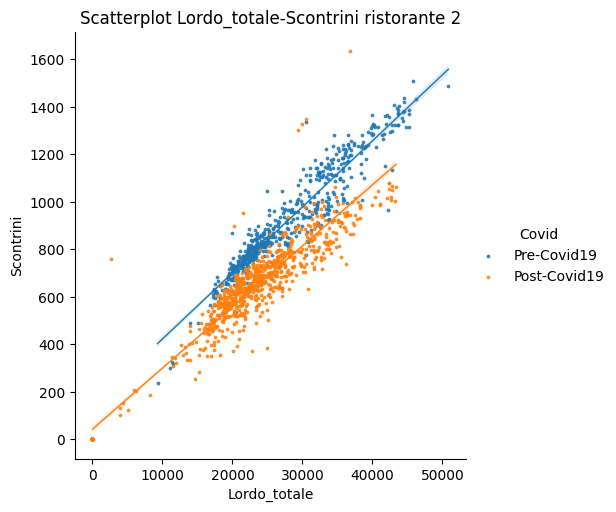

In [254]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist2, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 2')
pl.show()

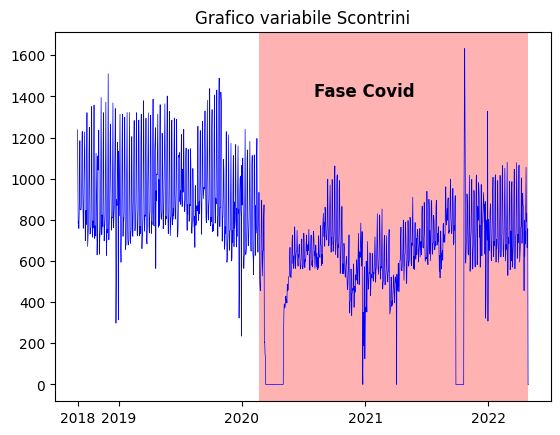

In [255]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist2, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 1400, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

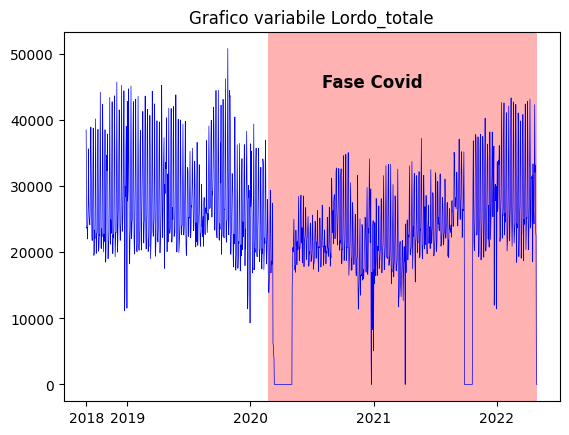

In [258]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist2, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 45000, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

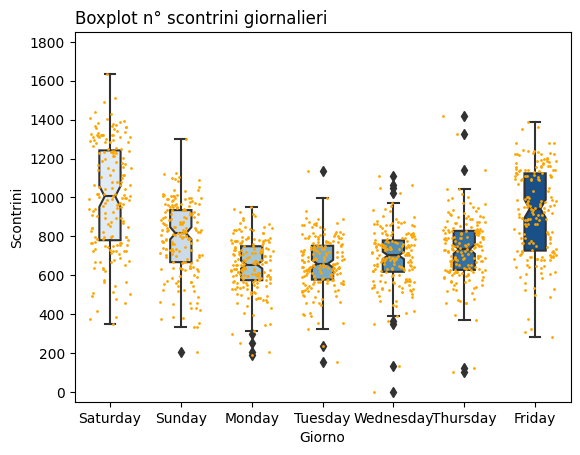

In [353]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist2_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist2_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

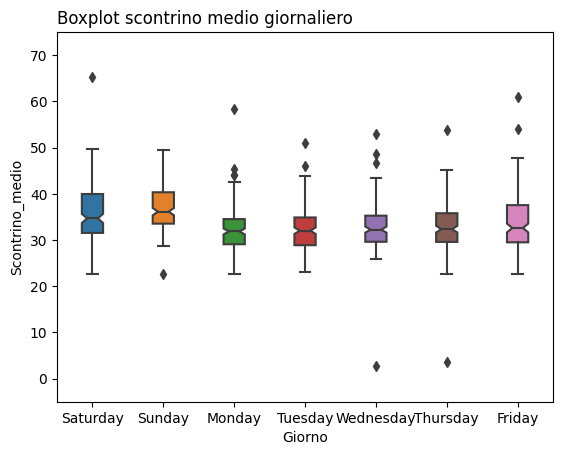

In [388]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist2_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-5,75)
pl.yticks(np.arange(0, 80, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Osserviamo che tutti i valori sono solitamente compresi tra 20 e 70 euro circa di media per lo scontrino medio, tranne due outlier con valori molto bassi (2.70€ e 3.58€) un mercoledì e un giovedì.

Rispetto al primo ristorante, sembra lavorare in maniera più equilibrata tra giorni festivi e feriali, con meno differenza tra weekend e giornate durante la settimana. 

In [356]:
rist2_no0[rist2_no0['Scontrino_medio'] < 20]

Codice  Location Provincia         Regione        Data  Scontrini  \
558    R001  Piacenza  Piacenza  Emilia-Romagna  2020-04-01          1   
1257   R001  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        757   

      Lordo_totale     Giorno   Mese  Anno  ... Inflazione_combustibili  \
558           2.70  Wednesday  April  2020  ...                   -10.4   
1257       2711.66   Thursday  April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
558       0       0          0            0                    0   
1257   3838    4031         77          234                   29   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
558              0                     0         2716             2.70  
1257          1528                  6001        72263             3.58  

[2 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

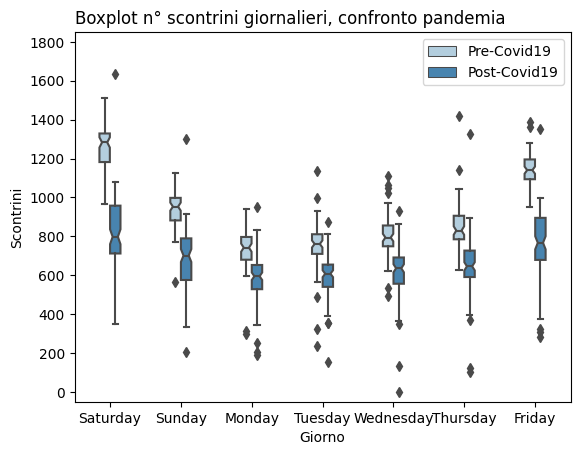

In [357]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist2_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.legend(loc='upper right')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Come nel caso del primo ristorante, il numero di scontrini è calato tutti i giorni, sempre con una differenza minore durante la settimana rispetto al weekend.

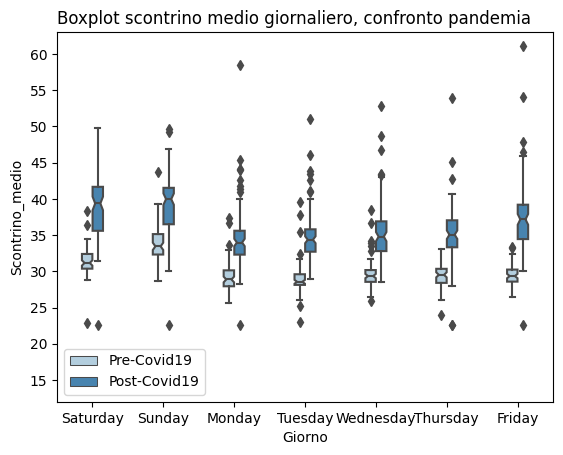

In [360]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist2_no0[rist2_no0['Scontrino_medio'] > 20], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(12,63)
pl.yticks(np.arange(15, 65, 5))
pl.legend(loc='lower left')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Come nel caso del primo ristorante, lo scontrino medio è aumentato in maniera significativa con l'inizio del Covid: ipotizziamo sempre un aumento dei prezzi generale, come evidenziato dagli aumenti dell'inflazione presentati nella sezione iniziale di data exploration. 

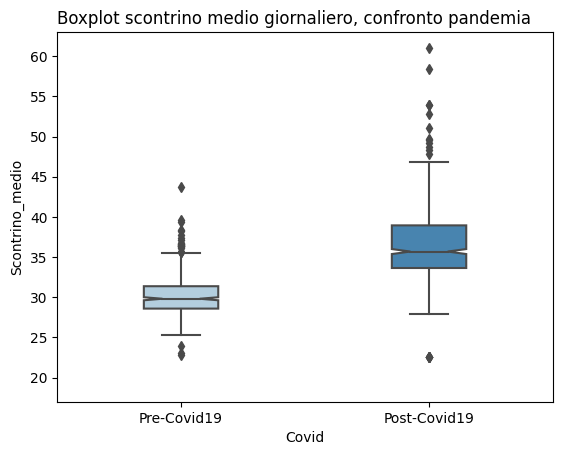

In [364]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist2_no0[rist2_no0['Scontrino_medio'] > 20], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(17,63)
pl.yticks(np.arange(20, 65, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [262]:
rist2_scontrini_anno = rist2.groupby(['Anno'])['Scontrini'].describe()
rist2_scontrini_anno = round(rist2_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist2_scontrini_anno

count    mean     std    min     25%    50%      75%     max
Anno                                                              
2018  122.0  922.57  224.42  298.0  759.50  856.5  1109.75  1510.0
2019  365.0  938.25  211.86  235.0  781.00  881.0  1098.00  1489.0
2020  366.0  557.54  286.39    0.0  471.25  619.0   714.00  1240.0
2021  365.0  632.52  235.82    0.0  544.00  645.0   766.00  1633.0
2022  120.0  757.60  173.70    0.0  659.00  729.0   867.75  1080.0

In [261]:
rist2_Scontrino_medio_anno = rist2.groupby(['Anno'])['Scontrino_medio'].describe()
rist2_Scontrino_medio_anno = round(rist2_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist2_Scontrino_medio_anno

count   mean    std    min    25%    50%    75%    max
Anno                                                        
2018  122.0  30.61   2.26  26.07  29.05  30.01  31.69  38.28
2019  365.0  30.14   2.56  22.84  28.44  29.65  31.31  43.76
2020  366.0  29.61  13.29   0.00  30.09  32.56  35.88  65.30
2021  365.0  34.01   9.97   0.00  33.73  35.62  38.31  53.98
2022  120.0  37.11   6.62   0.00  35.05  37.31  40.66  49.16

In [309]:
rist2_scontrini_Giorno = rist2_no0.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist2_scontrini_Giorno = round(rist2_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist2_scontrini_Giorno

count     mean     std    min      25%     50%  \
Giorno    Covid                                                          
Friday    Post-Covid19  102.0   766.62  166.91  283.0   679.00   767.0   
          Pre-Covid19    76.0  1135.92   93.20  953.0  1093.75  1140.5   
Monday    Post-Covid19  103.0   587.21  121.54  188.0   528.50   595.0   
          Pre-Covid19    77.0   738.95  108.50  298.0   680.00   742.0   
Saturday  Post-Covid19  103.0   811.51  196.60  351.0   712.00   798.0   
          Pre-Covid19    77.0  1257.90  116.22  966.0  1182.00  1283.0   
Sunday    Post-Covid19  102.0   677.46  164.40  205.0   575.75   701.5   
          Pre-Covid19    77.0   940.81   95.44  564.0   882.00   953.0   
Thursday  Post-Covid19  103.0   647.42  143.35  102.0   591.00   646.0   
          Pre-Covid19    77.0   851.79  116.06  627.0   785.00   830.0   
Tuesday   Post-Covid19  103.0   595.01  106.62  152.0   540.50   608.0   
          Pre-Covid19    77.0   750.17  124.03  235.0   710.00   761.0   
Wednesday Post-Covid19  104.0   614.74  129.26    1.0   556.50   636.0   
          Pre-Covid19    77.0   801.43  102.91  491.0   749.00   794.0   

                            75%     max  
Giorno    Covid                          
Friday    Post-Covid19   895.25  1350.0  
          Pre-Covid19   1195.50  1387.0  
Monday    Post-Covid19   653.00   952.0  
          Pre-Covid19    797.00   941.0  
Saturday  Post-Covid19   958.00  1633.0  
          Pre-Covid19   1329.00  1510.0  
Sunday    Post-Covid19   789.75  1302.0  
          Pre-Covid19    998.00  1127.0  
Thursday  Post-Covid19   727.00  1328.0  
          Pre-Covid19    906.00  1421.0  
Tuesday   Post-Covid19   655.00   875.0  
          Pre-Covid19    811.00  1134.0  
Wednesday Post-Covid19   691.50   929.0  
          Pre-Covid19    856.00  1111.0

In [308]:
rist2_Scontrino_medio_Giorno = rist2_no0.groupby(['Giorno','Covid'])['Lordo_totale'].describe()
rist2_Scontrino_medio_Giorno = round(rist2_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist2_Scontrino_medio_Giorno

count      mean      std       min       25%  \
Giorno    Covid                                                        
Friday    Post-Covid19  102.0  27970.32  5280.69  11456.86  24325.59   
          Pre-Covid19    76.0  33389.72  3123.60  25896.27  31132.96   
Monday    Post-Covid19  103.0  20140.99  4322.46   5937.46  18064.75   
          Pre-Covid19    77.0  21489.27  3125.45  11146.28  19839.82   
Saturday  Post-Covid19  103.0  31254.86  6597.88  16315.26  26806.88   
          Pre-Covid19    77.0  39488.75  4540.02  27969.03  36469.79   
Sunday    Post-Covid19  102.0  26244.76  6084.52   6167.10  22643.04   
          Pre-Covid19    77.0  31686.18  3723.26  17560.53  29518.21   
Thursday  Post-Covid19  103.0  22255.93  4804.87   2711.66  20236.85   
          Pre-Covid19    77.0  25172.77  3871.28  17372.85  22934.23   
Tuesday   Post-Covid19  103.0  20622.91  3608.23   4389.50  18716.48   
          Pre-Covid19    77.0  21691.24  3968.34   9309.63  20242.52   
Wednesday Post-Covid19  104.0  21543.13  4480.10      2.70  19086.17   
          Pre-Covid19    77.0  23757.18  3362.44  13957.92  22018.01   

                             50%       75%       max  
Giorno    Covid                                       
Friday    Post-Covid19  27510.46  31623.26  38241.69  
          Pre-Covid19   33561.87  35567.36  43642.07  
Monday    Post-Covid19  19965.29  21978.50  33385.50  
          Pre-Covid19   21676.98  23069.37  30280.88  
Saturday  Post-Covid19  31612.71  35695.85  43367.91  
          Pre-Covid19   39902.68  43147.03  50843.73  
Sunday    Post-Covid19  26399.11  30805.66  37382.55  
          Pre-Covid19   32080.27  33719.81  42272.87  
Thursday  Post-Covid19  22054.44  25339.49  36073.38  
          Pre-Covid19   24612.47  26737.97  44489.22  
Tuesday   Post-Covid19  20680.11  22645.86  29897.88  
          Pre-Covid19   21785.73  22696.09  42838.98  
Wednesday Post-Covid19  21880.75  24099.59  31433.54  
          Pre-Covid19   23242.73  25182.93  36419.98

# Ristorante 3

## Pulizia dataset

Proseguiamo col terzo ristorante, dal codice R002 di Piacenza

In [213]:
rist3 =  pd.read_csv('dati/rist3.csv')
rist3

Codice  Location Provincia         Regione        Data  Scontrini  \
0     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-01          0   
1     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-02          0   
2     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-03          0   
3     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-04          0   
4     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-05          0   
..     ...       ...       ...             ...         ...        ...   
907   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        624   
908   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-27          0   
909   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        723   
910   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
911   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

     Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
0            0.00     Friday  November  2019  ...                    -4.7   
1            0.00   Saturday  November  2019  ...                    -4.7   
2            0.00     Sunday  November  2019  ...                    -4.7   
3            0.00     Monday  November  2019  ...                    -4.7   
4            0.00    Tuesday  November  2019  ...                    -4.7   
..            ...        ...       ...   ...  ...                     ...   
907      19369.15    Tuesday     April  2022  ...                    60.5   
908          0.00  Wednesday     April  2022  ...                    60.5   
909      24217.65   Thursday     April  2022  ...                    60.5   
910          0.00     Friday     April  2022  ...                    60.5   
911          0.00   Saturday     April  2022  ...                    60.5   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
0        0       0          0            0                    0             0   
1        0       0          0            0                    0             0   
2        0       0          0            0                    0             0   
3        0       0          0            0                    0             0   
4        0       0          0            0                    0             0   
..     ...     ...        ...          ...                  ...           ...   
907   3614    3915         86          262                   62          1469   
908   3592    3804         71          193                   27          1160   
909   3838    4031         77          234                   29          1528   
910   3147    3291         73          152                   40           976   
911   2412    2676         70          171                   60          1149   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                       0            0             0.00  
1                       0            0             0.00  
2                       0            0             0.00  
3                       0            0             0.00  
4                       0            0             0.00  
..                    ...          ...              ...  
907                  5650        71843            31.04  
908                  5945        72033             0.00  
909                  6001        72263            33.50  
910                  5197        72488             0.00  
911                  3638        72676             0.00  

[912 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [341]:
rist3 = rist3[rist3['Data'] >= '2018-09-01']
rist3 = rist3.reset_index(drop=True)
rist3_def = rist3
rist3

Codice  Location Provincia         Regione        Data  Scontrini  \
0     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-01          0   
1     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-02          0   
2     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-03          0   
3     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-04          0   
4     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-05          0   
..     ...       ...       ...             ...         ...        ...   
907   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        624   
908   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-27          0   
909   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        723   
910   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
911   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

     Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
0            0.00     Friday  November  2019  ...                    -4.7   
1            0.00   Saturday  November  2019  ...                    -4.7   
2            0.00     Sunday  November  2019  ...                    -4.7   
3            0.00     Monday  November  2019  ...                    -4.7   
4            0.00    Tuesday  November  2019  ...                    -4.7   
..            ...        ...       ...   ...  ...                     ...   
907      19369.15    Tuesday     April  2022  ...                    60.5   
908          0.00  Wednesday     April  2022  ...                    60.5   
909      24217.65   Thursday     April  2022  ...                    60.5   
910          0.00     Friday     April  2022  ...                    60.5   
911          0.00   Saturday     April  2022  ...                    60.5   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
0        0       0          0            0                    0             0   
1        0       0          0            0                    0             0   
2        0       0          0            0                    0             0   
3        0       0          0            0                    0             0   
4        0       0          0            0                    0             0   
..     ...     ...        ...          ...                  ...           ...   
907   3614    3915         86          262                   62          1469   
908   3592    3804         71          193                   27          1160   
909   3838    4031         77          234                   29          1528   
910   3147    3291         73          152                   40           976   
911   2412    2676         70          171                   60          1149   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                       0            0             0.00  
1                       0            0             0.00  
2                       0            0             0.00  
3                       0            0             0.00  
4                       0            0             0.00  
..                    ...          ...              ...  
907                  5650        71843            31.04  
908                  5945        72033             0.00  
909                  6001        72263            33.50  
910                  5197        72488             0.00  
911                  3638        72676             0.00  

[912 rows x 27 columns]

Notiamo fin da subito che questo ristorante ha molte meno osservazioni degli altri, con sole 912 righe presenti nel dataset (i due ristoranti precedenti ne avevano 1338 entrambi)

Vediamo ora i valori pari a 0 come sono distribuiti

In [215]:
zero_indices = rist3[rist3['Scontrini'] == 0].index
rist1.loc[zero_indices]

Codice    Location Provincia    Regione        Data  Scontrini  \
0     R000  Montebello     Pavia  Lombardia  2018-09-01       1276   
1     R000  Montebello     Pavia  Lombardia  2018-09-02       1070   
2     R000  Montebello     Pavia  Lombardia  2018-09-03        657   
3     R000  Montebello     Pavia  Lombardia  2018-09-04        647   
4     R000  Montebello     Pavia  Lombardia  2018-09-05        635   
..     ...         ...       ...        ...         ...        ...   
520   R000  Montebello     Pavia  Lombardia  2020-02-03        475   
521   R000  Montebello     Pavia  Lombardia  2020-02-04        491   
908   R000  Montebello     Pavia  Lombardia  2021-02-25        395   
910   R000  Montebello     Pavia  Lombardia  2021-02-27        499   
911   R000  Montebello     Pavia  Lombardia  2021-02-28        468   

     Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0        32801.22   Saturday  September  2018  ...                     5.4   
1        28222.37     Sunday  September  2018  ...                     5.4   
2        16201.27     Monday  September  2018  ...                     5.4   
3        16409.71    Tuesday  September  2018  ...                     5.4   
4        15374.10  Wednesday  September  2018  ...                     5.4   
..            ...        ...        ...   ...  ...                     ...   
520      10462.91     Monday   February  2020  ...                    -7.0   
521      11348.40    Tuesday   February  2020  ...                    -7.0   
908      11281.71   Thursday   February  2021  ...                    -1.8   
910      16995.82   Saturday   February  2021  ...                    -1.8   
911      15465.22     Sunday   February  2021  ...                    -1.8   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
0        0       0          0            0                    0             0   
1        0       0          0            0                    0             0   
2        0       0          0            0                    0             0   
3        0       0          0            0                    0             0   
4        0       0          0            0                    0             0   
..     ...     ...        ...          ...                  ...           ...   
520      0       0          0            0                    0             0   
521      0       0          0            0                    0             0   
908   6370    8992      13544         1624                  194             0   
910   5877    8080      13181          645                  131             0   
911   3256    4629       7605          210                   70             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                       0            0            25.71  
1                       0            0            26.38  
2                       0            0            24.66  
3                       0            0            25.36  
4                       0            0            24.21  
..                    ...          ...              ...  
520                     0            0            22.03  
521                     0            0            23.11  
908                     0        31182            28.56  
910                     0        31571            34.06  
911                     0        31715            33.05  

[70 rows x 27 columns]

Rispetto ai primi due ristoranti abbiamo un caso differente: abbiamo sempre un numero significativo di giorni di chiusura data dal Covid (quelli di zona rossa, come indicato dalla colonna *colore*), mentre poi abbiamo alcune giornate precedenti all'inizio del Covid, e altri giorni in zona bianca o arancione che potrebbero corrispondere a vacanze o chiusure per malattia.

In [216]:
rist3['Colore'].loc[zero_indices].value_counts()

rosso          57
Pre-Covid19     7
arancione       3
bianco          3
Name: Colore, dtype: int64

In [217]:
rist3.loc[zero_indices][rist3['Colore'] == 'Pre-Covid19']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\597597715.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist3.loc[zero_indices][rist3['Colore'] == 'Pre-Covid19']


Codice  Location Provincia         Regione        Data  Scontrini  \
0   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-01          0   
1   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-02          0   
2   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-03          0   
3   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-04          0   
4   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-05          0   
5   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-06          0   
6   R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-07          0   

   Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
0           0.0     Friday  November  2019  ...                    -4.7   
1           0.0   Saturday  November  2019  ...                    -4.7   
2           0.0     Sunday  November  2019  ...                    -4.7   
3           0.0     Monday  November  2019  ...                    -4.7   
4           0.0    Tuesday  November  2019  ...                    -4.7   
5           0.0  Wednesday  November  2019  ...                    -4.7   
6           0.0   Thursday  November  2019  ...                    -4.7   

  Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
0      0       0          0            0                    0             0   
1      0       0          0            0                    0             0   
2      0       0          0            0                    0             0   
3      0       0          0            0                    0             0   
4      0       0          0            0                    0             0   
5      0       0          0            0                    0             0   
6      0       0          0            0                    0             0   

   Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                     0            0              0.0  
1                     0            0              0.0  
2                     0            0              0.0  
3                     0            0              0.0  
4                     0            0              0.0  
5                     0            0              0.0  
6                     0            0              0.0  

[7 rows x 27 columns]

In [218]:
rist3.loc[zero_indices][rist3['Colore'] == 'arancione']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\2260552355.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist3.loc[zero_indices][rist3['Colore'] == 'arancione']


Codice  Location Provincia         Regione        Data  Scontrini  \
185   R002  Piacenza  Piacenza  Emilia-Romagna  2020-05-04          0   
186   R002  Piacenza  Piacenza  Emilia-Romagna  2020-05-05          0   
187   R002  Piacenza  Piacenza  Emilia-Romagna  2020-05-06          0   

     Lordo_totale     Giorno Mese  Anno  ... Inflazione_combustibili Maschi  \
185           0.0     Monday  May  2020  ...                   -11.3      0   
186           0.0    Tuesday  May  2020  ...                   -11.3      0   
187           0.0  Wednesday  May  2020  ...                   -11.3      0   

    Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
185       0          0            0                    0             0   
186       0          0            0                    0             0   
187       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
185                     0         4251              0.0  
186                     0         4286              0.0  
187                     0         4295              0.0  

[3 rows x 27 columns]

In [219]:
rist3.loc[zero_indices][rist3['Colore'] == 'bianco']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\1938643707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist3.loc[zero_indices][rist3['Colore'] == 'bianco']


Codice  Location Provincia         Regione        Data  Scontrini  \
908   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-27          0   
910   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
911   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

     Lordo_totale     Giorno   Mese  Anno  ... Inflazione_combustibili Maschi  \
908           0.0  Wednesday  April  2022  ...                    60.5   3592   
910           0.0     Friday  April  2022  ...                    60.5   3147   
911           0.0   Saturday  April  2022  ...                    60.5   2412   

    Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
908    3804         71          193                   27          1160   
910    3291         73          152                   40           976   
911    2676         70          171                   60          1149   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
908                  5945        72033              0.0  
910                  5197        72488              0.0  
911                  3638        72676              0.0  

[3 rows x 27 columns]

Le giornate prima dell'inizio della pandemia sembrano essere una settimana di vacanza ad inizio novembre 2019. Le tre giornate in zona arancione sono quelle che seguono il primo lockdown della primavera 2020, dunque potrebbero essere stati giorni per riaprire in sicurezza il ristorante prima della ripresa. 

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [220]:
rist3_no0 = rist3[rist3['Scontrini'] > 0]
rist3_no0 = rist3_no0.reset_index(drop=True)
rist3_no0

Codice  Location Provincia         Regione        Data  Scontrini  \
0     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-08       1174   
1     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-09       1406   
2     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-10       1086   
3     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-11        723   
4     R002  Piacenza  Piacenza  Emilia-Romagna  2019-11-12        806   
..     ...       ...       ...             ...         ...        ...   
837   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-23        859   
838   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-24        747   
839   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-25        731   
840   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        624   
841   R002  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        723   

     Lordo_totale    Giorno      Mese  Anno  ... Inflazione_combustibili  \
0        30877.90    Friday  November  2019  ...                    -4.7   
1        41178.16  Saturday  November  2019  ...                    -4.7   
2        34043.30    Sunday  November  2019  ...                    -4.7   
3        18441.49    Monday  November  2019  ...                    -4.7   
4        20901.16   Tuesday  November  2019  ...                    -4.7   
..            ...       ...       ...   ...  ...                     ...   
837      32685.88  Saturday     April  2022  ...                    60.5   
838      29070.77    Sunday     April  2022  ...                    60.5   
839      28917.70    Monday     April  2022  ...                    60.5   
840      19369.15   Tuesday     April  2022  ...                    60.5   
841      24217.65  Thursday     April  2022  ...                    60.5   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
0        0       0          0            0                    0             0   
1        0       0          0            0                    0             0   
2        0       0          0            0                    0             0   
3        0       0          0            0                    0             0   
4        0       0          0            0                    0             0   
..     ...     ...        ...          ...                  ...           ...   
837   2532    2516         47          185                   14          1611   
838    181     158          1            3                    0           100   
839     70      78          0            3                    0            28   
840   3614    3915         86          262                   62          1469   
841   3838    4031         77          234                   29          1528   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                       0            0            26.30  
1                       0            0            29.29  
2                       0            0            31.35  
3                       0            0            25.51  
4                       0            0            25.93  
..                    ...          ...              ...  
837                  3191        71425            38.05  
838                   235        71629            38.92  
839                   117        71759            39.56  
840                  5650        71843            31.04  
841                  6001        72263            33.50  

[842 rows x 27 columns]

In [333]:
# csv dataset completo
rist3_def.to_csv('dati/rist3_def.csv', index=False)
rist3_no0.to_csv('dati/rist3_no0.csv', index=False)

## Grafici

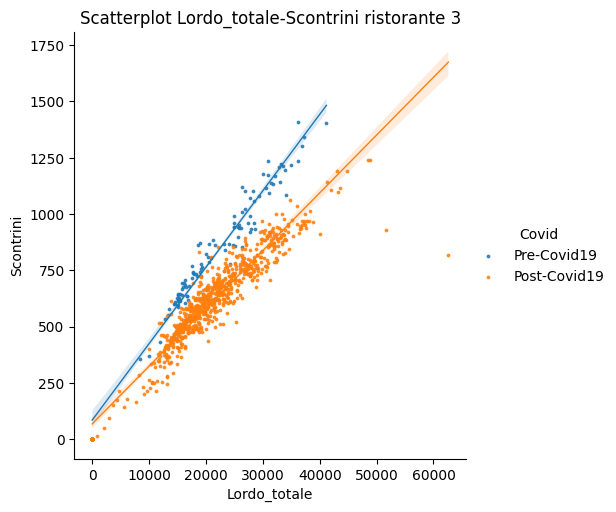

In [263]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist3, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 3')
pl.show()

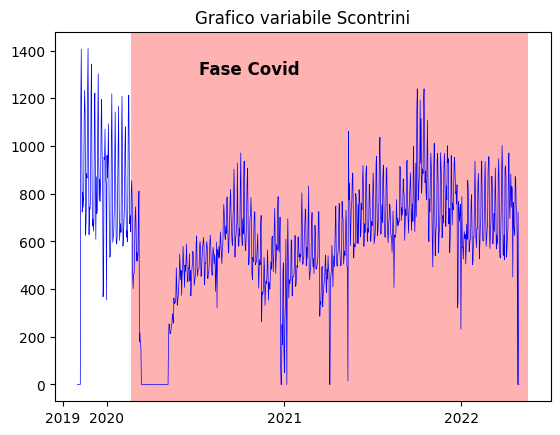

In [328]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist3, color='blue', label="R000", linewidth=0.5)
pl.xticks(([-30,61,427,792]),['2019','2020','2021','2022'])
ax.text(250, 1300, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(111, 930,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

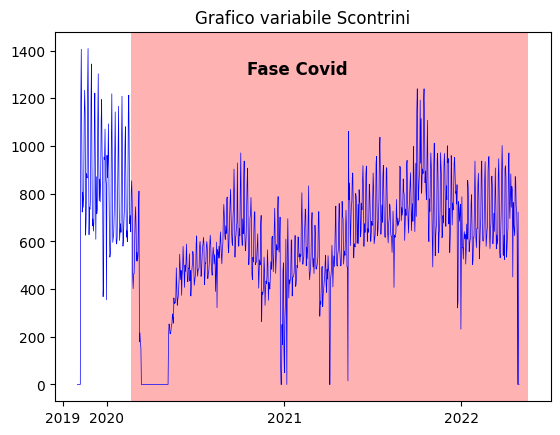

In [330]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist3, color='blue', label="R000", linewidth=0.5)
pl.xticks(([-30,61,427,792]),['2019','2020','2021','2022'])
ax.text(350, 1300, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(111, 930,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

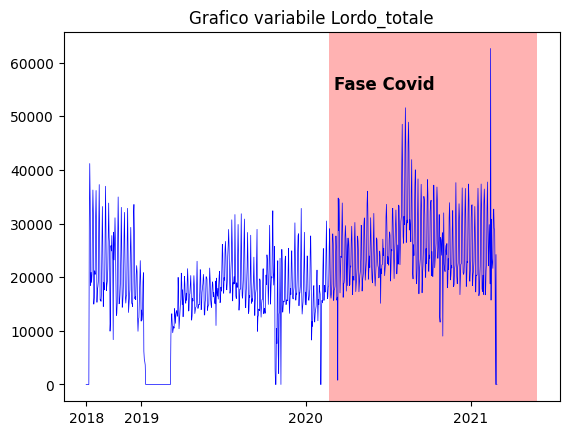

In [275]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist3, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853]), ['2018','2019','2020','2021'])
ax.text(550, 55000, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1000,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

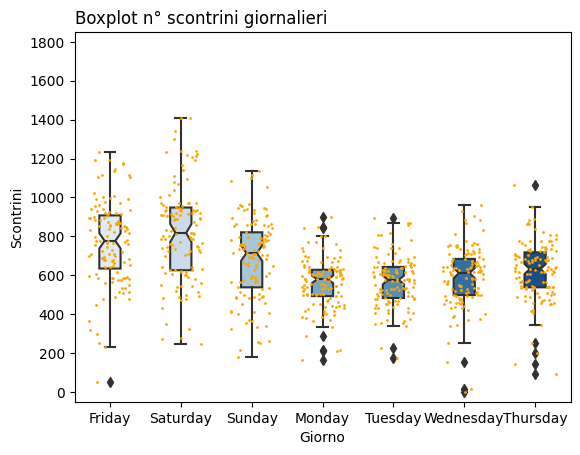

In [385]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist3_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist3_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

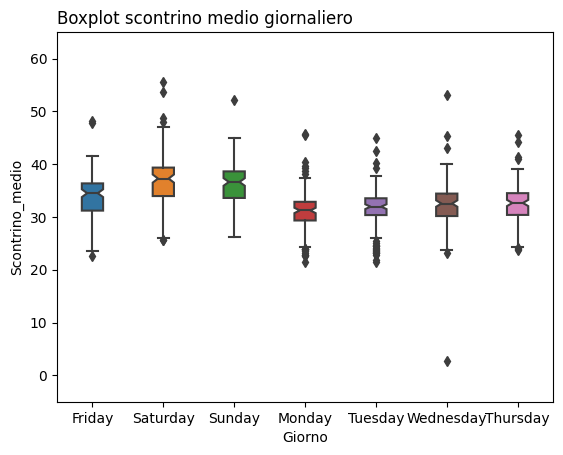

In [390]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist3_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-5,65)
pl.yticks(np.arange(0, 70, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Osserviamo che tutti i valori sono solitamente compresi tra 20 e 70 euro circa di media per lo scontrino medio, tranne un outlier con valori molto bassi (2.70€ per un solo scontrino) un mercoledì a metà del primo lockdown.

Sembra essere più simile al secondo rispetto al primo ristorante (forse anche perchè sono entrambi ristoranti di Piacenza), in quanto sembra esseci più equilibrio tra giorni festivi e feriali a livello di numero di scontrini. 

In [393]:
rist3_no0[rist3_no0['Scontrino_medio'] < 18]

Codice  Location Provincia         Regione        Data  Scontrini  \
125   R002  Piacenza  Piacenza  Emilia-Romagna  2020-04-01          1   

     Lordo_totale     Giorno   Mese  Anno  ... Inflazione_combustibili Maschi  \
125           2.7  Wednesday  April  2020  ...                   -10.4      0   

    Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
125       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
125                     0         2716              2.7  

[1 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

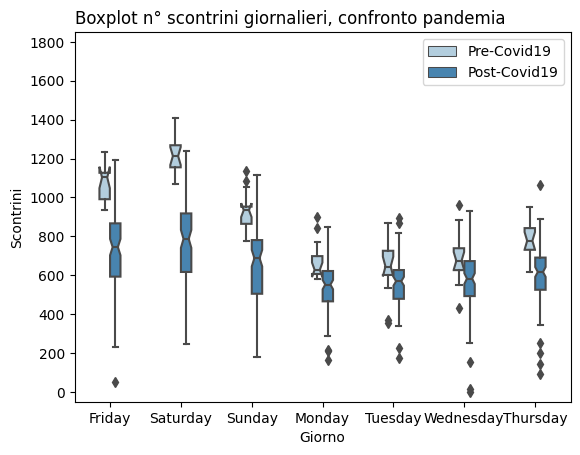

In [394]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist3_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.legend(loc='upper right')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Il trend visto con i primi due ristoranti si ripete, col numero di scontrini calato tutti i giorni, e sempre con una differenza minore durante la settimana rispetto al weekend.

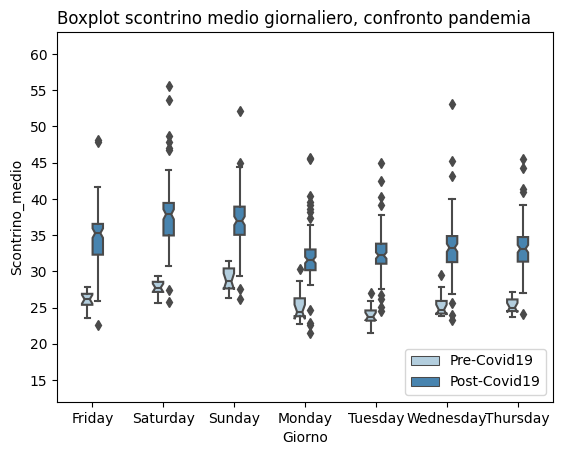

In [399]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist3_no0[rist3_no0['Scontrino_medio'] > 10], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(12,63)
pl.yticks(np.arange(15, 65, 5))
pl.legend(loc='lower right')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Come nel casi precedenti, lo scontrino medio è aumentato in maniera significativa con l'inizio del Covid, probabilemente come conseguenza dell'aumento dell'inflazione.

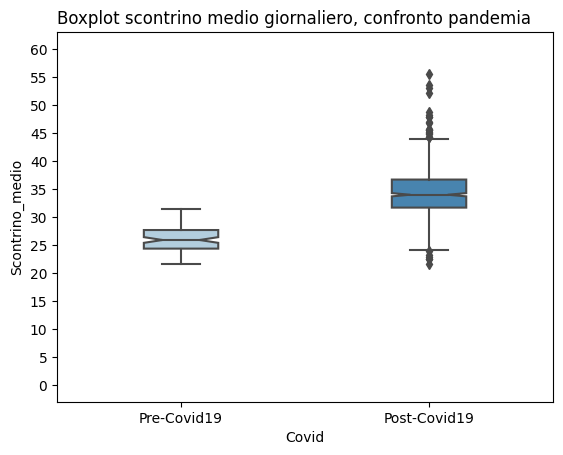

In [400]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist3_no0[rist3_no0['Scontrino_medio'] > 10], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-3,63)
pl.yticks(np.arange(0, 65, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [276]:
rist3_scontrini_anno = rist3.groupby(['Anno'])['Scontrini'].describe()
rist3_scontrini_anno = round(rist3_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist3_scontrini_anno

count    mean     std  min    25%    50%     75%     max
Anno                                                          
2019   61.0  800.03  373.56  0.0  682.0  861.0  1086.0  1409.0
2020  366.0  487.22  275.79  0.0  379.5  523.5   634.5  1219.0
2021  365.0  672.48  191.89  0.0  542.0  674.0   782.0  1240.0
2022  120.0  689.32  172.59  0.0  602.5  657.5   818.0  1002.0

In [277]:
rist3_Scontrino_medio_anno = rist3.groupby(['Anno'])['Scontrino_medio'].describe()
rist3_Scontrino_medio_anno = round(rist3_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist3_Scontrino_medio_anno

count   mean    std  min    25%    50%    75%    max
Anno                                                      
2019   61.0  22.89   8.56  0.0  23.70  25.10  27.21  31.35
2020  366.0  27.17  12.78  0.0  25.74  30.99  34.24  53.61
2021  365.0  34.24   4.70  0.0  31.92  34.08  36.56  55.58
2022  120.0  35.12   7.53  0.0  33.00  35.50  38.36  76.74

In [278]:
rist3_scontrini_Giorno = rist3.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist3_scontrini_Giorno = round(rist3_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist3_scontrini_Giorno

count     mean     std  min      25%     50%      75%  \
Giorno    Covid                                                                 
Friday    Post-Covid19  115.0   664.75  278.04  0.0   576.00   709.0   859.00   
          Pre-Covid19    16.0  1000.88  282.08  0.0   983.00  1063.0  1122.50   
Monday    Post-Covid19  114.0   502.21  189.90  0.0   439.25   540.5   618.00   
          Pre-Covid19    16.0   629.75  191.61  0.0   603.00   627.0   686.25   
Saturday  Post-Covid19  115.0   695.29  287.57  0.0   570.50   759.0   913.50   
          Pre-Covid19    16.0  1144.31  322.15  0.0  1130.50  1211.0  1251.25   
Sunday    Post-Covid19  114.0   598.89  254.82  0.0   482.00   659.5   770.50   
          Pre-Covid19    16.0   879.25  251.82  0.0   861.25   935.0   948.50   
Thursday  Post-Covid19  114.0   558.43  207.83  0.0   493.50   598.5   683.75   
          Pre-Covid19    16.0   726.94  213.25  0.0   715.75   766.5   832.25   
Tuesday   Post-Covid19  114.0   519.04  185.07  0.0   464.75   546.5   623.75   
          Pre-Covid19    16.0   608.69  218.36  0.0   575.25   642.0   717.00   
Wednesday Post-Covid19  114.0   530.04  217.54  0.0   464.25   565.5   660.75   
          Pre-Covid19    16.0   642.50  211.47  0.0   613.25   658.5   737.00   

                           max  
Giorno    Covid                 
Friday    Post-Covid19  1193.0  
          Pre-Covid19   1234.0  
Monday    Post-Covid19   846.0  
          Pre-Covid19    898.0  
Saturday  Post-Covid19  1240.0  
          Pre-Covid19   1409.0  
Sunday    Post-Covid19  1115.0  
          Pre-Covid19   1135.0  
Thursday  Post-Covid19  1062.0  
          Pre-Covid19    953.0  
Tuesday   Post-Covid19   895.0  
          Pre-Covid19    871.0  
Wednesday Post-Covid19   928.0  
          Pre-Covid19    961.0

In [279]:
rist3_Scontrino_medio_Giorno = rist3.groupby(['Giorno','Covid'])['Scontrino_medio'].describe()
rist3_Scontrino_medio_Giorno = round(rist3_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist3_Scontrino_medio_Giorno

count   mean    std  min    25%    50%    75%    max
Giorno    Covid                                                             
Friday    Post-Covid19  115.0  31.68  10.44  0.0  31.51  34.58  36.43  48.15
          Pre-Covid19    16.0  24.45   6.63  0.0  25.21  26.01  26.66  27.88
Monday    Post-Covid19  114.0  29.46   9.33  0.0  29.57  31.29  32.89  45.68
          Pre-Covid19    16.0  23.64   6.66  0.0  23.71  24.18  25.89  30.38
Saturday  Post-Covid19  115.0  34.80  12.12  0.0  34.08  37.47  39.38  76.74
          Pre-Covid19    16.0  26.07   7.03  0.0  27.13  27.69  28.48  29.37
Sunday    Post-Covid19  114.0  34.07  10.55  0.0  34.37  36.70  38.66  52.10
          Pre-Covid19    16.0  27.13   7.41  0.0  27.38  28.56  30.27  31.35
Thursday  Post-Covid19  114.0  30.86   9.03  0.0  30.86  32.76  34.64  45.51
          Pre-Covid19    16.0  23.68   6.39  0.0  24.33  24.96  26.11  27.14
Tuesday   Post-Covid19  114.0  30.17   8.83  0.0  30.76  31.99  33.70  44.89
          Pre-Covid19    16.0  22.41   6.14  0.0  23.03  23.63  24.53  27.00
Wednesday Post-Covid19  114.0  30.44  10.08  0.0  30.72  32.68  34.54  53.08
          Pre-Covid19    16.0  23.75   6.54  0.0  24.08  24.65  25.75  29.53

# Ristorante 4

## Pulizia dataset

Passiamo ora ad un analisi del quarto ristorante, col codice R003, il terzo ristorante di Piacenza

In [221]:
rist4 =  pd.read_csv('dati/rist4.csv')
rist4

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R003  Piacenza  Piacenza  Emilia-Romagna  2018-01-01      19961   
1      R003  Piacenza  Piacenza  Emilia-Romagna  2018-01-02          0   
2      R003  Piacenza  Piacenza  Emilia-Romagna  2018-01-03          0   
3      R003  Piacenza  Piacenza  Emilia-Romagna  2018-01-04          0   
4      R003  Piacenza  Piacenza  Emilia-Romagna  2018-01-05          0   
...     ...       ...       ...             ...         ...        ...   
1575   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        493   
1576   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        500   
1577   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        491   
1578   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1579   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        252223.20     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
1575       9907.06    Tuesday    April  2022  ...                    60.5   
1576      10384.06  Wednesday    April  2022  ...                    60.5   
1577      11081.76   Thursday    April  2022  ...                    60.5   
1578          0.00     Friday    April  2022  ...                    60.5   
1579          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1575   3614    3915         86          262                   62   
1576   3592    3804         71          193                   27   
1577   3838    4031         77          234                   29   
1578   3147    3291         73          152                   40   
1579   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            12.64  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
1575          1469                  5650        71843            20.10  
1576          1160                  5945        72033            20.77  
1577          1528                  6001        72263            22.57  
1578           976                  5197        72488             0.00  
1579          1149                  3638        72676             0.00  

[1580 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [342]:
rist4 = rist4[rist4['Data'] >= '2018-09-01']
rist4 = rist4.reset_index(drop=True)
rist4_def = rist4
rist4

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-01        815   
1      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-02        614   
2      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-03        732   
3      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-04        763   
4      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-05        750   
...     ...       ...       ...             ...         ...        ...   
1332   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        493   
1333   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        500   
1334   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        491   
1335   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1336   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         11114.98   Saturday  September  2018  ...                     5.4   
1          9680.72     Sunday  September  2018  ...                     5.4   
2         10194.34     Monday  September  2018  ...                     5.4   
3         10232.06    Tuesday  September  2018  ...                     5.4   
4         10225.12  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1332       9907.06    Tuesday      April  2022  ...                    60.5   
1333      10384.06  Wednesday      April  2022  ...                    60.5   
1334      11081.76   Thursday      April  2022  ...                    60.5   
1335          0.00     Friday      April  2022  ...                    60.5   
1336          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1332   3614    3915         86          262                   62   
1333   3592    3804         71          193                   27   
1334   3838    4031         77          234                   29   
1335   3147    3291         73          152                   40   
1336   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            13.64  
1                0                     0            0            15.77  
2                0                     0            0            13.93  
3                0                     0            0            13.41  
4                0                     0            0            13.63  
...            ...                   ...          ...              ...  
1332          1469                  5650        71843            20.10  
1333          1160                  5945        72033            20.77  
1334          1528                  6001        72263            22.57  
1335           976                  5197        72488             0.00  
1336          1149                  3638        72676             0.00  

[1337 rows x 27 columns]

Notiamo che abbiamo 1338 righe all'interno del dataset, rispetto alle 912 del ristorante 3 e alle 1338 dei primi due. 

Vediamo ora i valori pari a 0 come sono distribuiti

In [223]:
zero_indices = rist4[rist4['Scontrini'] == 0].index
rist4.loc[zero_indices]

Codice  Location Provincia         Regione        Data  Scontrini  \
115    R003  Piacenza  Piacenza  Emilia-Romagna  2018-12-25          0   
116    R003  Piacenza  Piacenza  Emilia-Romagna  2018-12-26          0   
122    R003  Piacenza  Piacenza  Emilia-Romagna  2019-01-01          0   
232    R003  Piacenza  Piacenza  Emilia-Romagna  2019-04-21          0   
233    R003  Piacenza  Piacenza  Emilia-Romagna  2019-04-22          0   
...     ...       ...       ...             ...         ...        ...   
1218   R003  Piacenza  Piacenza  Emilia-Romagna  2022-01-01          0   
1324   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-17          0   
1325   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-18          0   
1335   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1336   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
115            0.0    Tuesday  December  2018  ...                     9.8   
116            0.0  Wednesday  December  2018  ...                     9.8   
122            0.0    Tuesday   January  2019  ...                     7.9   
232            0.0     Sunday     April  2019  ...                     6.7   
233            0.0     Monday     April  2019  ...                     6.7   
...            ...        ...       ...   ...  ...                     ...   
1218           0.0   Saturday   January  2022  ...                    57.1   
1324           0.0     Sunday     April  2022  ...                    60.5   
1325           0.0     Monday     April  2022  ...                    60.5   
1335           0.0     Friday     April  2022  ...                    60.5   
1336           0.0   Saturday     April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
115       0       0          0            0                    0   
116       0       0          0            0                    0   
122       0       0          0            0                    0   
232       0       0          0            0                    0   
233       0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1218   4105    4416        308          175                   62   
1324     17       7          0            1                    0   
1325     21      19          0            5                    0   
1335   3147    3291         73          152                   40   
1336   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
115              0                     0            0              0.0  
116              0                     0            0              0.0  
122              0                     0            0              0.0  
232              0                     0            0              0.0  
233              0                     0            0              0.0  
...            ...                   ...          ...              ...  
1218          7976                     0        30657              0.0  
1324            22                     1        70291              0.0  
1325            19                    16        70395              0.0  
1335           976                  5197        72488              0.0  
1336          1149                  3638        72676              0.0  

[104 rows x 27 columns]

Nonostante siano già stati esclusi i primi 8 mesi, sembra che ci sia un numero superiore di scontrini pari a 0 all'interno del dataset, addirittura 104 giorni: alcuni sono indubbiamente quelli già visti per gli altri ristoranti per i lockdown causati dal Covid (infatti si tratta sempre di zona arancione o rossa, come indicato dalla colonna *colore*). Tuttavia, abbiamo comunque 9 giorni di chiusura in zona bianca, 9 giorni di chiusura prima dell'inizio del Covid, 16 giorni di chiusura in zona gialla e un numero superiore di giorni di chiusura in zona arancione, rispetto ai ristoranti visti in precedenza. 

In [224]:
rist4['Colore'].loc[zero_indices].value_counts()

rosso          55
giallo         16
arancione      15
Pre-Covid19     9
bianco          9
Name: Colore, dtype: int64

In [225]:
rist4.loc[zero_indices][rist4['Colore'] == 'Pre-Covid19']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\3120232482.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist4.loc[zero_indices][rist4['Colore'] == 'Pre-Covid19']


Codice  Location Provincia         Regione        Data  Scontrini  \
115   R003  Piacenza  Piacenza  Emilia-Romagna  2018-12-25          0   
116   R003  Piacenza  Piacenza  Emilia-Romagna  2018-12-26          0   
122   R003  Piacenza  Piacenza  Emilia-Romagna  2019-01-01          0   
232   R003  Piacenza  Piacenza  Emilia-Romagna  2019-04-21          0   
233   R003  Piacenza  Piacenza  Emilia-Romagna  2019-04-22          0   
348   R003  Piacenza  Piacenza  Emilia-Romagna  2019-08-15          0   
480   R003  Piacenza  Piacenza  Emilia-Romagna  2019-12-25          0   
481   R003  Piacenza  Piacenza  Emilia-Romagna  2019-12-26          0   
487   R003  Piacenza  Piacenza  Emilia-Romagna  2020-01-01          0   

     Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
115           0.0    Tuesday  December  2018  ...                     9.8   
116           0.0  Wednesday  December  2018  ...                     9.8   
122           0.0    Tuesday   January  2019  ...                     7.9   
232           0.0     Sunday     April  2019  ...                     6.7   
233           0.0     Monday     April  2019  ...                     6.7   
348           0.0   Thursday    August  2019  ...                    -1.6   
480           0.0  Wednesday  December  2019  ...                    -4.6   
481           0.0   Thursday  December  2019  ...                    -4.6   
487           0.0  Wednesday   January  2020  ...                    -6.7   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
115      0       0          0            0                    0             0   
116      0       0          0            0                    0             0   
122      0       0          0            0                    0             0   
232      0       0          0            0                    0             0   
233      0       0          0            0                    0             0   
348      0       0          0            0                    0             0   
480      0       0          0            0                    0             0   
481      0       0          0            0                    0             0   
487      0       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
115                     0            0              0.0  
116                     0            0              0.0  
122                     0            0              0.0  
232                     0            0              0.0  
233                     0            0              0.0  
348                     0            0              0.0  
480                     0            0              0.0  
481                     0            0              0.0  
487                     0            0              0.0  

[9 rows x 27 columns]

In [226]:
rist4['Festività'].loc[zero_indices][rist4['Colore'] == 'Pre-Covid19']

115           Natale
116    Santo Stefano
122        Capodanno
232           Pasqua
233               No
348       Ferragosto
480           Natale
481    Santo Stefano
487        Capodanno
Name: Festività, dtype: object

In [227]:
rist4.loc[zero_indices][rist4['Colore'] == 'bianco']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\1458202917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist4.loc[zero_indices][rist4['Colore'] == 'bianco']


Codice  Location Provincia         Regione        Data  Scontrini  \
714    R003  Piacenza  Piacenza  Emilia-Romagna  2020-08-15          0   
715    R003  Piacenza  Piacenza  Emilia-Romagna  2020-08-16          0   
1211   R003  Piacenza  Piacenza  Emilia-Romagna  2021-12-25          0   
1212   R003  Piacenza  Piacenza  Emilia-Romagna  2021-12-26          0   
1218   R003  Piacenza  Piacenza  Emilia-Romagna  2022-01-01          0   
1324   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-17          0   
1325   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-18          0   
1335   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-29          0   
1336   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-30          0   

      Lordo_totale    Giorno      Mese  Anno  ... Inflazione_combustibili  \
714            0.0  Saturday    August  2020  ...                   -10.1   
715            0.0    Sunday    August  2020  ...                   -10.1   
1211           0.0  Saturday  December  2021  ...                    34.6   
1212           0.0    Sunday  December  2021  ...                    34.6   
1218           0.0  Saturday   January  2022  ...                    57.1   
1324           0.0    Sunday     April  2022  ...                    60.5   
1325           0.0    Monday     April  2022  ...                    60.5   
1335           0.0    Friday     April  2022  ...                    60.5   
1336           0.0  Saturday     April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
714       0       0          0            0                    0   
715       0       0          0            0                    0   
1211   2695    2340         96           98                   20   
1212   7567    7578        398          244                   93   
1218   4105    4416        308          175                   62   
1324     17       7          0            1                    0   
1325     21      19          0            5                    0   
1335   3147    3291         73          152                   40   
1336   2412    2676         70          171                   60   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
714              0                     0         4561              0.0  
715              0                     0         4562              0.0  
1211          4821                     0        28596              0.0  
1212         14410                     0        28736              0.0  
1218          7976                     0        30657              0.0  
1324            22                     1        70291              0.0  
1325            19                    16        70395              0.0  
1335           976                  5197        72488              0.0  
1336          1149                  3638        72676              0.0  

[9 rows x 27 columns]

In [228]:
rist4['Festività'].loc[zero_indices][rist4['Colore'] == 'bianco']

714        Ferragosto
715                No
1211           Natale
1212    Santo Stefano
1218        Capodanno
1324           Pasqua
1325               No
1335               No
1336               No
Name: Festività, dtype: object

In [229]:
rist4['Festività'].loc[zero_indices][rist4['Colore'] != 'rosso'].value_counts()

No               35
Natale            3
Santo Stefano     3
Capodanno         3
Pasqua            2
Ferragosto        2
Repubblica        1
Name: Festività, dtype: int64

L'impressione è che, rispetto ai ristoranti visti in precedenza, ci fossero molti più giorni di chiusura durante le festività (escludendo i periodi di zona rossa, abbiamo chiusura tre volte a Natale, Santo Stefano, Capodanno, due volte a Pasqua e Ferragosto e una volta alla Festa della Repubblica). 
Inoltre, molte giornate non di festività in cui il ristorante era chiuso sono in concomitanza con le feste, dove probabilmente l'attività è rimasta chiusa per più giornate.

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [230]:
rist4_no0 = rist4[rist4['Scontrini'] > 0]
rist4_no0 = rist4_no0.reset_index(drop=True)
rist4_no0

Codice  Location Provincia         Regione        Data  Scontrini  \
0      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-01        815   
1      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-02        614   
2      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-03        732   
3      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-04        763   
4      R003  Piacenza  Piacenza  Emilia-Romagna  2018-09-05        750   
...     ...       ...       ...             ...         ...        ...   
1228   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-23        502   
1229   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-24        465   
1230   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-26        493   
1231   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-27        500   
1232   R003  Piacenza  Piacenza  Emilia-Romagna  2022-04-28        491   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         11114.98   Saturday  September  2018  ...                     5.4   
1          9680.72     Sunday  September  2018  ...                     5.4   
2         10194.34     Monday  September  2018  ...                     5.4   
3         10232.06    Tuesday  September  2018  ...                     5.4   
4         10225.12  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1228      11398.05   Saturday      April  2022  ...                    60.5   
1229      12569.72     Sunday      April  2022  ...                    60.5   
1230       9907.06    Tuesday      April  2022  ...                    60.5   
1231      10384.06  Wednesday      April  2022  ...                    60.5   
1232      11081.76   Thursday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1228   2532    2516         47          185                   14   
1229    181     158          1            3                    0   
1230   3614    3915         86          262                   62   
1231   3592    3804         71          193                   27   
1232   3838    4031         77          234                   29   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            13.64  
1                0                     0            0            15.77  
2                0                     0            0            13.93  
3                0                     0            0            13.41  
4                0                     0            0            13.63  
...            ...                   ...          ...              ...  
1228          1611                  3191        71425            22.71  
1229           100                   235        71629            27.03  
1230          1469                  5650        71843            20.10  
1231          1160                  5945        72033            20.77  
1232          1528                  6001        72263            22.57  

[1233 rows x 27 columns]

In [343]:
# csv dataset completo
rist4_def.to_csv('dati/rist4_def.csv', index=False)
rist4_no0.to_csv('dati/rist4_no0.csv', index=False)

## Grafici

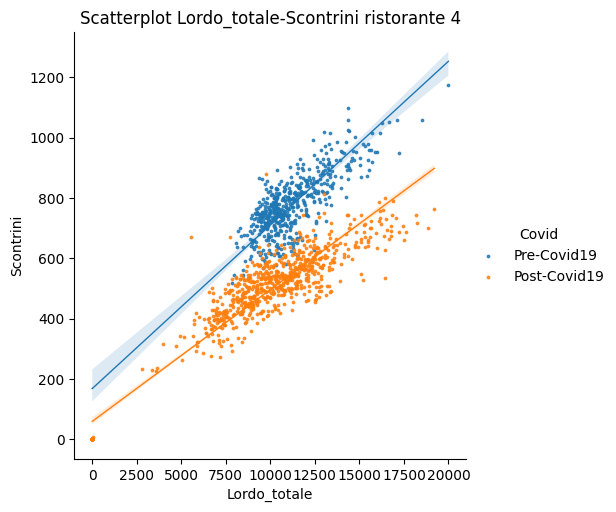

In [280]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist4, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 4')
pl.show()

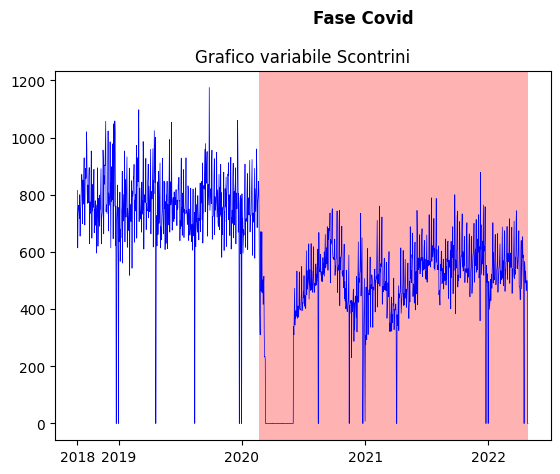

In [281]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist4, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 1400, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

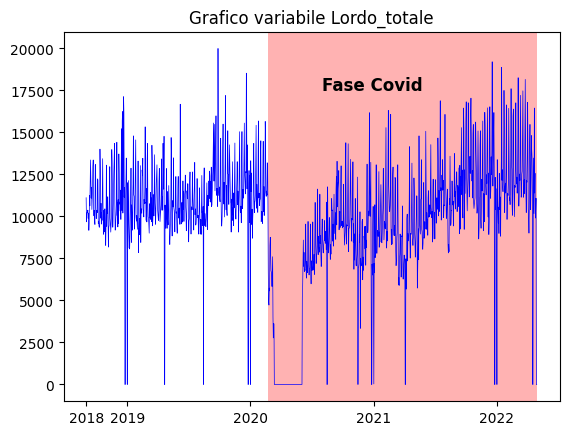

In [284]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist4, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 17500, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

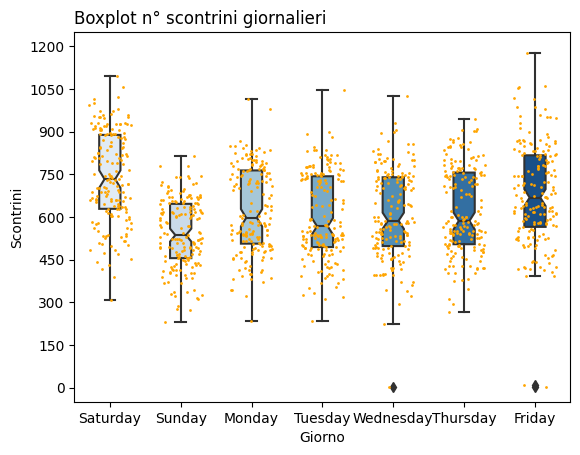

In [71]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist4_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist4_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1250)
pl.yticks(np.arange(0, 1300, 150))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

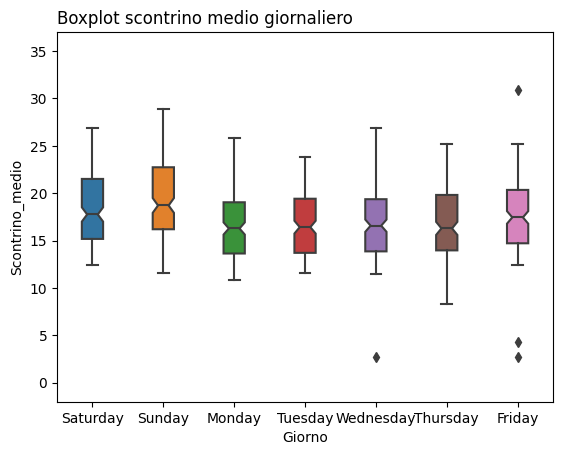

In [64]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist4_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-2,37)
pl.yticks(np.arange(0, 40, 5))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Rispetto agli altri ristoranti notiamo una situazione molto differente, sia a livello di numero di scontrini, sia come scontrino medio: esclusi tre outliers con valori molto bassi (intorno ai 3/4€), e un outlier oltre i 30€ un venerdì, la media dello scontrino medio è sempre compresa tra 8/9€ e 27/28€ in tutti i giorni della settimana, con valori mediamente più bassi rispetto agli altri ristoranti. 

Anche come numero di scontrini giornalieri, siamo su valori leggermente più bassi degli altri ristoranti; inoltre, la domenica è solitamente un giorno molto fruttuoso per i ristoranti (insieme al venerdì e al sabato), invece in questo caso si tratta della giornata con un numero medio minore di scontrini (anche se la media dello scontrino medio è la più elevata).  

In [68]:
rist4_no0[rist4_no0['Scontrino_medio'] < 5]

Codice  Location Provincia         Regione        Data  Scontrini  \
549   R003  Piacenza  Piacenza  Emilia-Romagna  2020-04-01          1   
550   R003  Piacenza  Piacenza  Emilia-Romagna  2020-05-01          1   
758   R003  Piacenza  Piacenza  Emilia-Romagna  2021-01-01          8   

     Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
549          2.70  Wednesday    April  2020  ...                   -10.4   
550          2.70     Friday      May  2020  ...                   -11.3   
758         34.29     Friday  January  2021  ...                    -1.9   

    Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
549      0       0          0            0                    0             0   
550      0       0          0            0                    0             0   
758      0       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
549                     0         2716             2.70  
550                     0         4115             2.70  
758                     0        15050             4.29  

[3 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

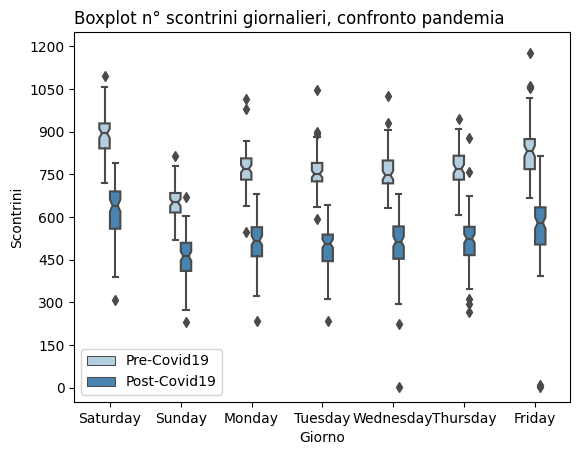

In [73]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist4_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1250)
pl.yticks(np.arange(0, 1300, 150))
pl.legend(loc='lower left')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Generalmente il numero di scontrini è calato, in maniera più consistente nel fine settimana, meno durante la settimana.

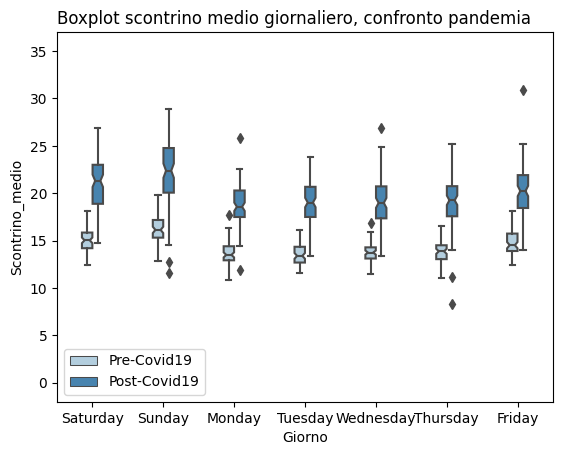

In [75]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist4_no0[rist4_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-2,37)
pl.yticks(np.arange(0, 40, 5))
pl.legend(loc='lower left')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Si ripete il trend visto nel caso degli altri ristoranti: lo scontrino medio è aumentato in maniera significativa pre e post Covid, a causa dell'aumento dell'inflazione, e il numero di scontrini giornalieri è calato drasticamente. 

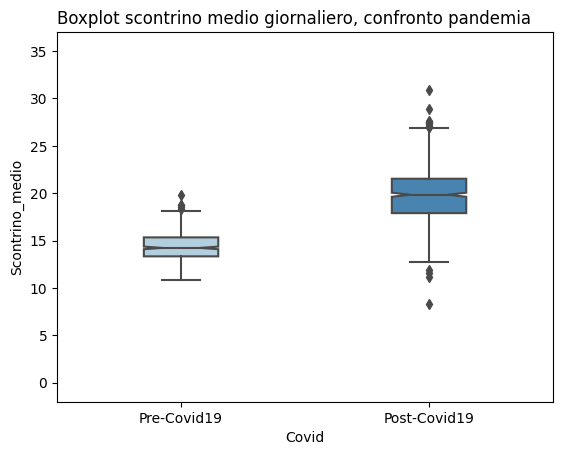

In [77]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist4_no0[rist4_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-2,37)
pl.yticks(np.arange(0, 40, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [285]:
rist4_scontrini_anno = rist4.groupby(['Anno'])['Scontrini'].describe()
rist4_scontrini_anno = round(rist4_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist4_scontrini_anno

count    mean     std  min     25%    50%     75%     max
Anno                                                           
2018  122.0  786.45  147.89  0.0  734.25  780.5  862.75  1058.0
2019  365.0  761.89  138.56  0.0  708.00  765.0  829.00  1175.0
2020  366.0  412.31  265.54  0.0  233.50  471.0  587.75   960.0
2021  365.0  524.68  115.87  0.0  466.00  533.0  587.00   878.0
2022  119.0  527.27  131.15  0.0  495.00  537.0  587.50   744.0

In [286]:
rist4_Scontrino_medio_anno = rist4.groupby(['Anno'])['Scontrino_medio'].describe()
rist4_Scontrino_medio_anno = round(rist4_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist4_Scontrino_medio_anno

count   mean   std  min    25%    50%    75%    max
Anno                                                     
2018  122.0  13.60  2.26  0.0  12.78  13.58  14.82  17.89
2019  365.0  14.22  2.31  0.0  13.39  14.25  15.24  19.84
2020  366.0  13.08  7.65  0.0  12.09  16.30  17.94  26.45
2021  365.0  20.11  3.18  0.0  18.79  20.16  21.67  27.58
2022  119.0  21.87  5.17  0.0  20.78  22.44  24.32  30.87

In [287]:
rist4_scontrini_Giorno = rist4.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist4_scontrini_Giorno = round(rist4_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist4_scontrini_Giorno

count    mean     std    min     25%    50%     75%  \
Giorno    Covid                                                               
Friday    Post-Covid19  115.0  498.45  212.35    0.0  449.00  564.0  629.50   
          Pre-Covid19    76.0  839.09  102.60  667.0  768.00  831.5  874.00   
Monday    Post-Covid19  113.0  445.73  184.18    0.0  413.00  504.0  553.00   
          Pre-Covid19    77.0  761.88  110.14    0.0  728.00  769.0  806.00   
Saturday  Post-Covid19  115.0  530.77  239.23    0.0  503.00  621.0  686.50   
          Pre-Covid19    77.0  892.16   70.22  718.0  841.00  894.0  929.00   
Sunday    Post-Covid19  114.0  387.17  178.64    0.0  350.00  448.0  501.50   
          Pre-Covid19    77.0  645.75   92.67    0.0  614.00  650.0  684.00   
Thursday  Post-Covid19  114.0  459.95  178.84    0.0  426.50  504.5  556.75   
          Pre-Covid19    77.0  751.92  142.32    0.0  724.00  764.0  814.00   
Tuesday   Post-Covid19  114.0  439.38  167.69    0.0  411.75  495.5  537.50   
          Pre-Covid19    77.0  736.12  139.06    0.0  721.00  750.0  789.00   
Wednesday Post-Covid19  114.0  455.99  170.17    0.0  418.25  501.0  558.75   
          Pre-Covid19    77.0  732.34  163.34    0.0  712.00  744.0  797.00   

                           max  
Giorno    Covid                 
Friday    Post-Covid19   814.0  
          Pre-Covid19   1175.0  
Monday    Post-Covid19   682.0  
          Pre-Covid19   1015.0  
Saturday  Post-Covid19   789.0  
          Pre-Covid19   1097.0  
Sunday    Post-Covid19   670.0  
          Pre-Covid19    816.0  
Thursday  Post-Covid19   878.0  
          Pre-Covid19    944.0  
Tuesday   Post-Covid19   643.0  
          Pre-Covid19   1048.0  
Wednesday Post-Covid19   680.0  
          Pre-Covid19   1024.0

In [288]:
rist4_Scontrino_medio_Giorno = rist4.groupby(['Giorno','Covid'])['Scontrino_medio'].describe()
rist4_Scontrino_medio_Giorno = round(rist4_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist4_Scontrino_medio_Giorno

count   mean   std    min    25%    50%    75%    max
Giorno    Covid                                                              
Friday    Post-Covid19  115.0  17.68  7.12   0.00  17.50  19.92  21.68  30.87
          Pre-Covid19    76.0  14.78  1.21  12.42  13.90  14.52  15.74  18.11
Monday    Post-Covid19  113.0  16.35  6.51   0.00  16.31  18.22  19.91  25.83
          Pre-Covid19    77.0  13.52  1.95   0.00  12.90  13.46  14.40  17.73
Saturday  Post-Covid19  115.0  17.99  7.92   0.00  17.84  20.65  22.60  26.88
          Pre-Covid19    77.0  15.05  1.25  12.47  14.20  15.03  15.85  18.14
Sunday    Post-Covid19  114.0  18.97  8.59   0.00  17.95  21.79  24.24  28.84
          Pre-Covid19    77.0  16.04  2.23   0.00  15.29  16.13  17.17  19.84
Thursday  Post-Covid19  114.0  17.04  6.35   0.00  16.63  19.09  20.69  25.24
          Pre-Covid19    77.0  13.44  2.44   0.00  12.98  13.80  14.51  16.58
Tuesday   Post-Covid19  114.0  17.00  6.22   0.00  16.59  18.60  20.55  23.81
          Pre-Covid19    77.0  13.15  2.40   0.00  12.43  13.35  14.34  16.12
Wednesday Post-Covid19  114.0  17.24  6.04   0.00  16.76  18.54  20.36  26.86
          Pre-Covid19    77.0  13.24  2.84   0.00  12.97  13.72  14.29  16.86

# Ristorante 5

## Pulizia dataset

Passiamo ora al quinto ristorante: col codice R004, il ristorante di Stradella, in provincia di Pavia

In [231]:
rist5 =  pd.read_csv('dati/rist5.csv')
rist5

Codice   Location Provincia    Regione        Data  Scontrini  \
0      R004  Stradella     Pavia  Lombardia  2018-01-01      23173   
1      R004  Stradella     Pavia  Lombardia  2018-01-02          0   
2      R004  Stradella     Pavia  Lombardia  2018-01-03          0   
3      R004  Stradella     Pavia  Lombardia  2018-01-04          0   
4      R004  Stradella     Pavia  Lombardia  2018-01-05          0   
...     ...        ...       ...        ...         ...        ...   
1576   R004  Stradella     Pavia  Lombardia  2022-04-26        630   
1577   R004  Stradella     Pavia  Lombardia  2022-04-27        650   
1578   R004  Stradella     Pavia  Lombardia  2022-04-28        659   
1579   R004  Stradella     Pavia  Lombardia  2022-04-29          0   
1580   R004  Stradella     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        516431.70     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
1576      17873.14    Tuesday    April  2022  ...                    60.5   
1577      18528.48  Wednesday    April  2022  ...                    60.5   
1578      20511.90   Thursday    April  2022  ...                    60.5   
1579          0.00     Friday    April  2022  ...                    60.5   
1580          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1576   3832    4045        136          345                   56   
1577   4184    4488        124          235                   63   
1578   3616    4328        101          222                   36   
1579   3825    4642        142          226                   81   
1580   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            22.29  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
1576          3008                  4332       144121            28.37  
1577          2854                  5396       144837            28.51  
1578          2483                  5102       145343            31.13  
1579          2711                  5307       145811             0.00  
1580          3138                  4693       146203             0.00  

[1581 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [344]:
rist5 = rist5[rist5['Data'] >= '2018-09-01']
rist5 = rist5.reset_index(drop=True)
rist5_def = rist5
rist5

Codice   Location Provincia    Regione        Data  Scontrini  \
0      R004  Stradella     Pavia  Lombardia  2018-09-01       1158   
1      R004  Stradella     Pavia  Lombardia  2018-09-02        974   
2      R004  Stradella     Pavia  Lombardia  2018-09-03        808   
3      R004  Stradella     Pavia  Lombardia  2018-09-04        731   
4      R004  Stradella     Pavia  Lombardia  2018-09-05        760   
...     ...        ...       ...        ...         ...        ...   
1333   R004  Stradella     Pavia  Lombardia  2022-04-26        630   
1334   R004  Stradella     Pavia  Lombardia  2022-04-27        650   
1335   R004  Stradella     Pavia  Lombardia  2022-04-28        659   
1336   R004  Stradella     Pavia  Lombardia  2022-04-29          0   
1337   R004  Stradella     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         30532.60   Saturday  September  2018  ...                     5.4   
1         24418.23     Sunday  September  2018  ...                     5.4   
2         17739.92     Monday  September  2018  ...                     5.4   
3         16612.43    Tuesday  September  2018  ...                     5.4   
4         16942.77  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1333      17873.14    Tuesday      April  2022  ...                    60.5   
1334      18528.48  Wednesday      April  2022  ...                    60.5   
1335      20511.90   Thursday      April  2022  ...                    60.5   
1336          0.00     Friday      April  2022  ...                    60.5   
1337          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1333   3832    4045        136          345                   56   
1334   4184    4488        124          235                   63   
1335   3616    4328        101          222                   36   
1336   3825    4642        142          226                   81   
1337   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            26.37  
1                0                     0            0            25.07  
2                0                     0            0            21.96  
3                0                     0            0            22.73  
4                0                     0            0            22.29  
...            ...                   ...          ...              ...  
1333          3008                  4332       144121            28.37  
1334          2854                  5396       144837            28.51  
1335          2483                  5102       145343            31.13  
1336          2711                  5307       145811             0.00  
1337          3138                  4693       146203             0.00  

[1338 rows x 27 columns]

Vediamo ora i valori pari a 0 come sono distribuiti

In [233]:
zero_indices = rist5[rist5['Scontrini'] == 0].index
rist5.loc[zero_indices]

Codice   Location Provincia    Regione        Data  Scontrini  \
558    R004  Stradella     Pavia  Lombardia  2020-03-12          0   
559    R004  Stradella     Pavia  Lombardia  2020-03-13          0   
560    R004  Stradella     Pavia  Lombardia  2020-03-14          0   
561    R004  Stradella     Pavia  Lombardia  2020-03-15          0   
562    R004  Stradella     Pavia  Lombardia  2020-03-16          0   
563    R004  Stradella     Pavia  Lombardia  2020-03-17          0   
564    R004  Stradella     Pavia  Lombardia  2020-03-18          0   
565    R004  Stradella     Pavia  Lombardia  2020-03-19          0   
566    R004  Stradella     Pavia  Lombardia  2020-03-20          0   
567    R004  Stradella     Pavia  Lombardia  2020-03-21          0   
568    R004  Stradella     Pavia  Lombardia  2020-03-22          0   
569    R004  Stradella     Pavia  Lombardia  2020-03-23          0   
570    R004  Stradella     Pavia  Lombardia  2020-03-24          0   
571    R004  Stradella     Pavia  Lombardia  2020-03-25          0   
572    R004  Stradella     Pavia  Lombardia  2020-03-26          0   
573    R004  Stradella     Pavia  Lombardia  2020-03-27          0   
574    R004  Stradella     Pavia  Lombardia  2020-03-28          0   
575    R004  Stradella     Pavia  Lombardia  2020-03-29          0   
576    R004  Stradella     Pavia  Lombardia  2020-03-30          0   
577    R004  Stradella     Pavia  Lombardia  2020-03-31          0   
579    R004  Stradella     Pavia  Lombardia  2020-04-02          0   
580    R004  Stradella     Pavia  Lombardia  2020-04-03          0   
581    R004  Stradella     Pavia  Lombardia  2020-04-04          0   
582    R004  Stradella     Pavia  Lombardia  2020-04-05          0   
583    R004  Stradella     Pavia  Lombardia  2020-04-06          0   
584    R004  Stradella     Pavia  Lombardia  2020-04-07          0   
585    R004  Stradella     Pavia  Lombardia  2020-04-08          0   
586    R004  Stradella     Pavia  Lombardia  2020-04-09          0   
587    R004  Stradella     Pavia  Lombardia  2020-04-10          0   
588    R004  Stradella     Pavia  Lombardia  2020-04-11          0   
589    R004  Stradella     Pavia  Lombardia  2020-04-12          0   
590    R004  Stradella     Pavia  Lombardia  2020-04-13          0   
591    R004  Stradella     Pavia  Lombardia  2020-04-14          0   
592    R004  Stradella     Pavia  Lombardia  2020-04-15          0   
593    R004  Stradella     Pavia  Lombardia  2020-04-16          0   
594    R004  Stradella     Pavia  Lombardia  2020-04-17          0   
595    R004  Stradella     Pavia  Lombardia  2020-04-18          0   
596    R004  Stradella     Pavia  Lombardia  2020-04-19          0   
597    R004  Stradella     Pavia  Lombardia  2020-04-20          0   
598    R004  Stradella     Pavia  Lombardia  2020-04-21          0   
599    R004  Stradella     Pavia  Lombardia  2020-04-22          0   
600    R004  Stradella     Pavia  Lombardia  2020-04-23          0   
601    R004  Stradella     Pavia  Lombardia  2020-04-24          0   
602    R004  Stradella     Pavia  Lombardia  2020-04-25          0   
603    R004  Stradella     Pavia  Lombardia  2020-04-26          0   
604    R004  Stradella     Pavia  Lombardia  2020-04-27          0   
605    R004  Stradella     Pavia  Lombardia  2020-04-28          0   
606    R004  Stradella     Pavia  Lombardia  2020-04-29          0   
607    R004  Stradella     Pavia  Lombardia  2020-04-30          0   
608    R004  Stradella     Pavia  Lombardia  2020-05-01          0   
609    R004  Stradella     Pavia  Lombardia  2020-05-02          0   
610    R004  Stradella     Pavia  Lombardia  2020-05-03          0   
846    R004  Stradella     Pavia  Lombardia  2020-12-25          0   
946    R004  Stradella     Pavia  Lombardia  2021-04-04          0   
1336   R004  Stradella     Pavia  Lombardia  2022-04-29          0   
1337   R004  Stradella     Pavia  Lombardia  2022-04-30          0   

      Lordo_to

Notiamo che, avendo già escluso i primi 8 mesi, i restanti giorni senza scontrini sono quelli di chiusura data dal primo lockdown del Covid (in giorni compresi tra il 12/03/2020 e il 03/05/2020). Gli unici casi differenti riguardano quattro giorni di chiusura: Natale 2020, Pasqua 2021 e il 29 e 30 Aprile 2022.

In [234]:
rist5.loc[zero_indices][rist5['Colore'] == 'bianco']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\3810033567.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist5.loc[zero_indices][rist5['Colore'] == 'bianco']


Codice   Location Provincia    Regione        Data  Scontrini  \
1336   R004  Stradella     Pavia  Lombardia  2022-04-29          0   
1337   R004  Stradella     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale    Giorno   Mese  Anno  ... Inflazione_combustibili Maschi  \
1336           0.0    Friday  April  2022  ...                    60.5   3825   
1337           0.0  Saturday  April  2022  ...                    60.5   3903   

     Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
1336    4642        142          226                   81          2711   
1337    4633        172          371                  162          3138   

      Seconda_dose_Booster  Totale_casi  Scontrino_medio  
1336                  5307       145811              0.0  
1337                  4693       146203              0.0  

[2 rows x 27 columns]

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [235]:
rist5_no0 = rist5[rist5['Scontrini'] > 0]
rist5_no0 = rist5_no0.reset_index(drop=True)
rist5_no0

Codice   Location Provincia    Regione        Data  Scontrini  \
0      R004  Stradella     Pavia  Lombardia  2018-09-01       1158   
1      R004  Stradella     Pavia  Lombardia  2018-09-02        974   
2      R004  Stradella     Pavia  Lombardia  2018-09-03        808   
3      R004  Stradella     Pavia  Lombardia  2018-09-04        731   
4      R004  Stradella     Pavia  Lombardia  2018-09-05        760   
...     ...        ...       ...        ...         ...        ...   
1277   R004  Stradella     Pavia  Lombardia  2022-04-24        709   
1278   R004  Stradella     Pavia  Lombardia  2022-04-25        695   
1279   R004  Stradella     Pavia  Lombardia  2022-04-26        630   
1280   R004  Stradella     Pavia  Lombardia  2022-04-27        650   
1281   R004  Stradella     Pavia  Lombardia  2022-04-28        659   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         30532.60   Saturday  September  2018  ...                     5.4   
1         24418.23     Sunday  September  2018  ...                     5.4   
2         17739.92     Monday  September  2018  ...                     5.4   
3         16612.43    Tuesday  September  2018  ...                     5.4   
4         16942.77  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1277      23545.94     Sunday      April  2022  ...                    60.5   
1278      23261.15     Monday      April  2022  ...                    60.5   
1279      17873.14    Tuesday      April  2022  ...                    60.5   
1280      18528.48  Wednesday      April  2022  ...                    60.5   
1281      20511.90   Thursday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1277    636     684         42          151                   51   
1278    436     419         13           43                   14   
1279   3832    4045        136          345                   56   
1280   4184    4488        124          235                   63   
1281   3616    4328        101          222                   36   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            26.37  
1                0                     0            0            25.07  
2                0                     0            0            21.96  
3                0                     0            0            22.73  
4                0                     0            0            22.29  
...            ...                   ...          ...              ...  
1277           620                   456       143747            33.21  
1278           429                   356       143897            33.47  
1279          3008                  4332       144121            28.37  
1280          2854                  5396       144837            28.51  
1281          2483                  5102       145343            31.13  

[1282 rows x 27 columns]

In [345]:
# csv dataset completo
rist5_def.to_csv('dati/rist5_def.csv', index=False)
rist5_no0.to_csv('dati/rist5_no0.csv', index=False)

## Grafici

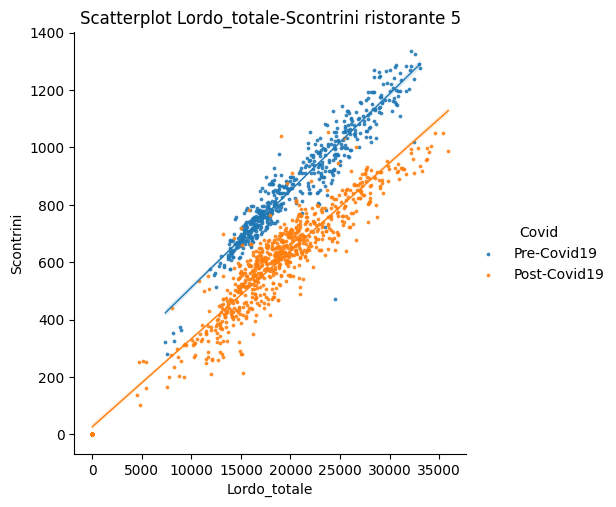

In [289]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist5, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 5')
pl.show()

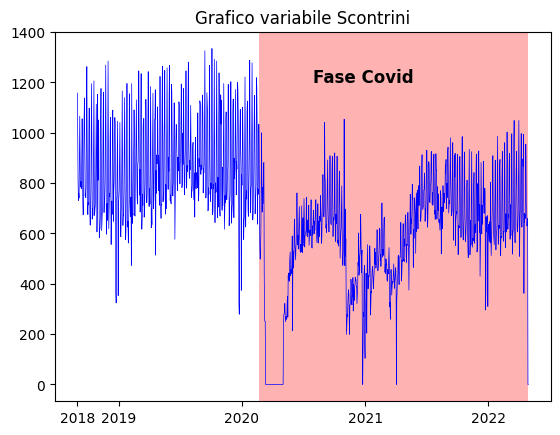

In [292]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist5, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 1200, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

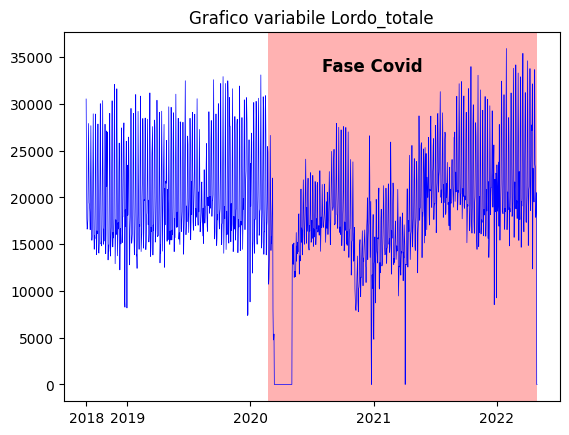

In [294]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist5, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 33500, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

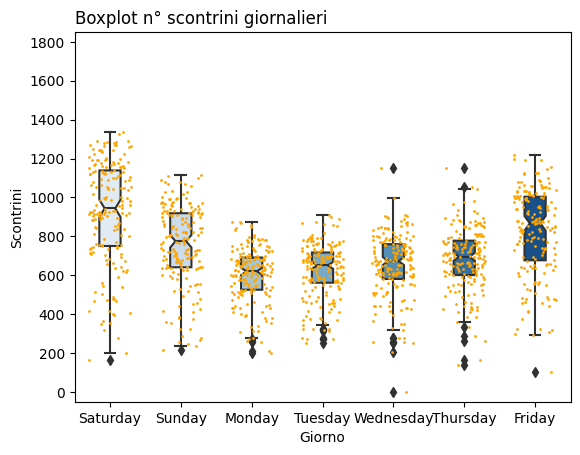

In [18]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist5_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist5_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1850)
pl.yticks(np.arange(0, 2000, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

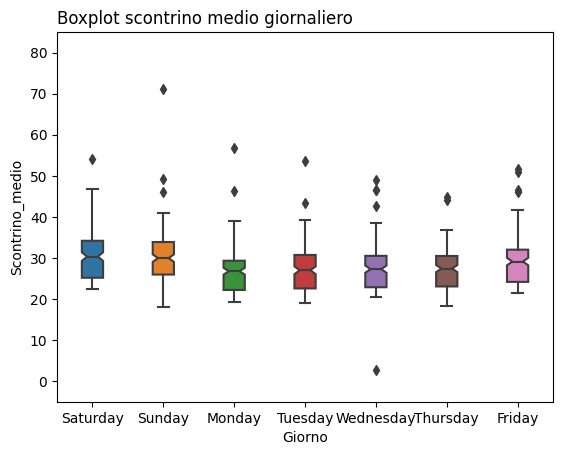

In [24]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist5_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-5,85)
pl.yticks(np.arange(0, 90, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Osserviamo che tutti i valori sono solitamente compresi tra 15 e 50 euro circa di media per lo scontrino medio, tranne alcuni outlier: un valore anomalo di 2.70€ un mercoledì, e alcuni valori intorno ai 60€, fino ad arrivare ad un valore di 70€ circa in una domenica. 

Anche come numero di scontrini siamo in linea con gli altri ristoranti.

In [25]:
rist5_no0[rist5_no0['Scontrino_medio'] < 15]

Codice   Location Provincia    Regione        Data  Scontrini  \
558   R004  Stradella     Pavia  Lombardia  2020-04-01          1   

     Lordo_totale     Giorno   Mese  Anno  ... Inflazione_combustibili Maschi  \
558           2.7  Wednesday  April  2020  ...                   -10.4      0   

    Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
558       0          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
558                     0         2180              2.7  

[1 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

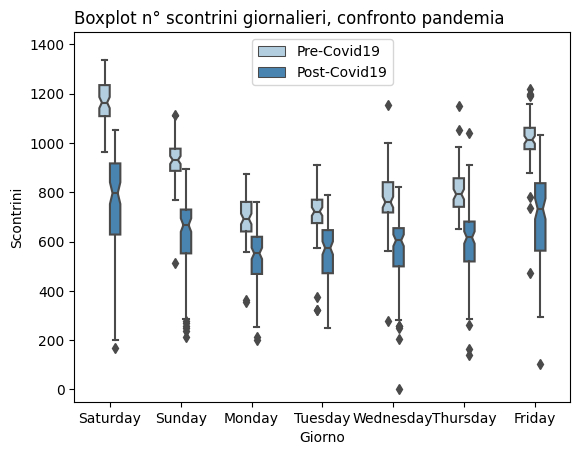

In [30]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist5_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1450)
pl.yticks(np.arange(0, 1600, 200))
pl.legend(loc='upper center')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Generalmente il numero di scontrini è calato, in maniera più consistente nel fine settimana (soprattutto per quanto riguarda il sabato, con un numero di scontrini che quasi sempre era sopra i 1000, mentre ora raramente supera quella soglia), meno durante la settimana.

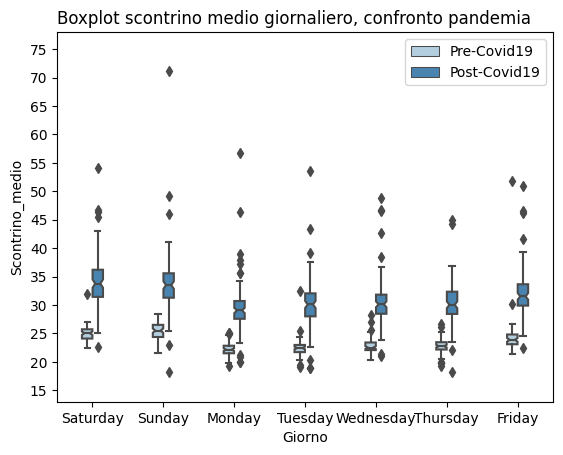

In [37]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist5_no0[rist5_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(13,78)
pl.yticks(np.arange(15, 80, 5))
pl.legend(loc='upper right')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Allo stesso modo notiamo come lo scontrino medio sia aumentato in maniera significativa pre e post Covid, a dimostrazione del fatto che i prezzi sono aumentati in modo significativo nel confronto pre-post Covid. 

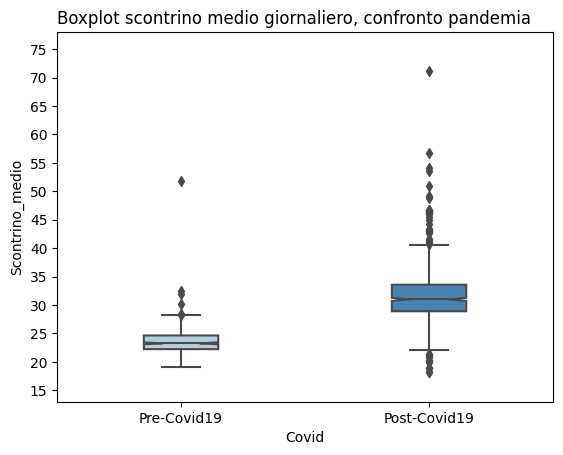

In [39]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist5_no0[rist5_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(13,78)
pl.yticks(np.arange(15, 80, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [298]:
rist5_scontrini_anno = rist5.groupby(['Anno'])['Scontrini'].describe()
rist5_scontrini_anno = round(rist5_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist5_scontrini_anno

count    mean     std    min     25%    50%      75%     max
Anno                                                              
2018  122.0  837.56  192.74  324.0  694.50  797.0   979.50  1285.0
2019  365.0  881.27  183.62  279.0  745.00  857.0  1010.00  1335.0
2020  366.0  521.84  293.30    0.0  337.75  585.5   692.75  1288.0
2021  365.0  627.88  164.50    0.0  501.00  644.0   742.00   985.0
2022  120.0  696.58  168.76    0.0  605.75  659.5   822.25  1049.0

In [297]:
rist5_Scontrino_medio_anno = rist5.groupby(['Anno'])['Scontrino_medio'].describe()
rist5_Scontrino_medio_anno = round(rist5_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist5_Scontrino_medio_anno

count   mean    std    min    25%    50%    75%    max
Anno                                                        
2018  122.0  23.75   1.75  19.05  22.49  23.44  25.16  28.22
2019  365.0  23.45   2.36  19.23  22.14  23.15  24.43  51.75
2020  366.0  25.50  12.22   0.00  23.52  27.96  31.27  71.08
2021  365.0  31.67   3.86   0.00  29.32  31.34  33.60  48.88
2022  120.0  31.69   4.76   0.00  30.34  31.92  33.92  37.61

In [296]:
rist5_scontrini_Giorno = rist5.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist5_scontrini_Giorno = round(rist5_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist5_scontrini_Giorno

count     mean     std    min      25%     50%  \
Giorno    Covid                                                          
Friday    Post-Covid19  115.0   629.78  261.78    0.0   500.00   693.0   
          Pre-Covid19    76.0  1011.25  106.04  473.0   975.00  1013.0   
Monday    Post-Covid19  114.0   503.14  175.44    0.0   436.00   543.5   
          Pre-Covid19    77.0   698.10   94.93  353.0   641.00   692.0   
Saturday  Post-Covid19  115.0   691.06  285.93    0.0   527.00   756.0   
          Pre-Covid19    77.0  1164.69   82.53  962.0  1109.00  1164.0   
Sunday    Post-Covid19  114.0   575.64  229.96    0.0   463.50   648.5   
          Pre-Covid19    77.0   933.17   93.86  514.0   887.00   931.0   
Thursday  Post-Covid19  114.0   553.15  204.73    0.0   489.50   606.0   
          Pre-Covid19    77.0   803.90   92.24  652.0   741.00   792.0   
Tuesday   Post-Covid19  114.0   524.52  181.56    0.0   456.25   568.5   
          Pre-Covid19    77.0   715.06  104.28  323.0   675.00   722.0   
Wednesday Post-Covid19  114.0   538.75  188.49    0.0   464.50   600.0   
          Pre-Covid19    77.0   770.78  107.28  279.0   718.00   760.0   

                            75%     max  
Giorno    Covid                          
Friday    Post-Covid19   830.00  1034.0  
          Pre-Covid19   1061.75  1219.0  
Monday    Post-Covid19   617.75   760.0  
          Pre-Covid19    761.00   876.0  
Saturday  Post-Covid19   914.50  1054.0  
          Pre-Covid19   1235.00  1335.0  
Sunday    Post-Covid19   723.75   894.0  
          Pre-Covid19    977.00  1113.0  
Thursday  Post-Covid19   673.25  1041.0  
          Pre-Covid19    857.00  1151.0  
Tuesday   Post-Covid19   644.50   790.0  
          Pre-Covid19    770.00   910.0  
Wednesday Post-Covid19   653.00   820.0  
          Pre-Covid19    841.00  1153.0

In [295]:
rist5_Scontrino_medio_Giorno = rist5.groupby(['Giorno','Covid'])['Scontrino_medio'].describe()
rist5_Scontrino_medio_Giorno = round(rist5_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist5_Scontrino_medio_Giorno

count   mean    std    min    25%    50%    75%    max
Giorno    Covid                                                               
Friday    Post-Covid19  115.0  29.37   9.91   0.00  29.30  31.20  33.38  50.95
          Pre-Covid19    76.0  24.31   3.46  21.45  23.11  23.88  24.83  51.75
Monday    Post-Covid19  114.0  27.79   8.33   0.00  27.20  28.96  30.62  56.75
          Pre-Covid19    77.0  22.17   1.26  19.23  21.52  22.16  22.85  25.11
Saturday  Post-Covid19  115.0  31.69  10.27   0.00  30.99  33.63  35.92  54.04
          Pre-Covid19    77.0  24.99   1.34  22.45  24.11  25.05  25.74  31.91
Sunday    Post-Covid19  114.0  31.13  10.49   0.00  30.57  33.14  35.47  71.08
          Pre-Covid19    77.0  25.43   1.52  21.63  24.38  25.50  26.52  28.45
Thursday  Post-Covid19  114.0  28.19   8.50   0.00  28.18  29.68  32.30  44.94
          Pre-Covid19    77.0  22.77   1.34  19.32  22.18  22.77  23.47  26.67
Tuesday   Post-Covid19  114.0  28.39   8.39   0.00  27.38  29.90  31.99  53.63
          Pre-Covid19    77.0  22.55   1.59  19.05  21.72  22.45  22.99  32.44
Wednesday Post-Covid19  114.0  28.77   8.34   0.00  27.82  29.99  31.64  48.88
          Pre-Covid19    77.0  22.79   1.35  20.41  22.08  22.52  23.42  28.31

# Ristorante 6

## Pulizia dataset

Infine, analizziamo l'ultimo ristorante: col codice R005, il  ristorante di Voghera (provincia di Pavia).

In [236]:
rist6 =  pd.read_csv('dati/rist6.csv')
rist6

Codice Location Provincia    Regione        Data  Scontrini  \
0      R005  Voghera     Pavia  Lombardia  2018-01-01      19541   
1      R005  Voghera     Pavia  Lombardia  2018-01-02          0   
2      R005  Voghera     Pavia  Lombardia  2018-01-03          0   
3      R005  Voghera     Pavia  Lombardia  2018-01-04          0   
4      R005  Voghera     Pavia  Lombardia  2018-01-05          0   
...     ...      ...       ...        ...         ...        ...   
1571   R005  Voghera     Pavia  Lombardia  2022-04-26        711   
1572   R005  Voghera     Pavia  Lombardia  2022-04-27        674   
1573   R005  Voghera     Pavia  Lombardia  2022-04-28        717   
1574   R005  Voghera     Pavia  Lombardia  2022-04-29          0   
1575   R005  Voghera     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno     Mese  Anno  ... Inflazione_combustibili  \
0        408110.40     Monday  January  2018  ...                     5.9   
1             0.00    Tuesday  January  2018  ...                     5.9   
2             0.00  Wednesday  January  2018  ...                     5.9   
3             0.00   Thursday  January  2018  ...                     5.9   
4             0.00     Friday  January  2018  ...                     5.9   
...            ...        ...      ...   ...  ...                     ...   
1571      18389.56    Tuesday    April  2022  ...                    60.5   
1572      19796.05  Wednesday    April  2022  ...                    60.5   
1573      19711.62   Thursday    April  2022  ...                    60.5   
1574          0.00     Friday    April  2022  ...                    60.5   
1575          0.00   Saturday    April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1571   3832    4045        136          345                   56   
1572   4184    4488        124          235                   63   
1573   3616    4328        101          222                   36   
1574   3825    4642        142          226                   81   
1575   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            20.88  
1                0                     0            0             0.00  
2                0                     0            0             0.00  
3                0                     0            0             0.00  
4                0                     0            0             0.00  
...            ...                   ...          ...              ...  
1571          3008                  4332       144121            25.86  
1572          2854                  5396       144837            29.37  
1573          2483                  5102       145343            27.49  
1574          2711                  5307       145811             0.00  
1575          3138                  4693       146203             0.00  

[1576 rows x 27 columns]

Come già osservato in precedenza, andiamo ad escludere i primi 8 mesi del dataset, in quanto i guadagni e gli scontrini sono raggruppati nel primo giorno di ogni mese, invece di essere distribuiti nelle singole giornate.

In [347]:
rist6 = rist6[rist6['Data'] >= '2018-09-01']
rist6 = rist6.reset_index(drop=True)
rist6_def = rist6
rist6

Codice Location Provincia    Regione        Data  Scontrini  \
0      R005  Voghera     Pavia  Lombardia  2018-09-01        774   
1      R005  Voghera     Pavia  Lombardia  2018-09-02        664   
2      R005  Voghera     Pavia  Lombardia  2018-09-03        706   
3      R005  Voghera     Pavia  Lombardia  2018-09-04        644   
4      R005  Voghera     Pavia  Lombardia  2018-09-05        691   
...     ...      ...       ...        ...         ...        ...   
1333   R005  Voghera     Pavia  Lombardia  2022-04-26        711   
1334   R005  Voghera     Pavia  Lombardia  2022-04-27        674   
1335   R005  Voghera     Pavia  Lombardia  2022-04-28        717   
1336   R005  Voghera     Pavia  Lombardia  2022-04-29          0   
1337   R005  Voghera     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         17927.97   Saturday  September  2018  ...                     5.4   
1         15023.69     Sunday  September  2018  ...                     5.4   
2         15546.82     Monday  September  2018  ...                     5.4   
3         13088.60    Tuesday  September  2018  ...                     5.4   
4         14520.95  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1333      18389.56    Tuesday      April  2022  ...                    60.5   
1334      19796.05  Wednesday      April  2022  ...                    60.5   
1335      19711.62   Thursday      April  2022  ...                    60.5   
1336          0.00     Friday      April  2022  ...                    60.5   
1337          0.00   Saturday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1333   3832    4045        136          345                   56   
1334   4184    4488        124          235                   63   
1335   3616    4328        101          222                   36   
1336   3825    4642        142          226                   81   
1337   3903    4633        172          371                  162   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            23.16  
1                0                     0            0            22.63  
2                0                     0            0            22.02  
3                0                     0            0            20.32  
4                0                     0            0            21.01  
...            ...                   ...          ...              ...  
1333          3008                  4332       144121            25.86  
1334          2854                  5396       144837            29.37  
1335          2483                  5102       145343            27.49  
1336          2711                  5307       145811             0.00  
1337          3138                  4693       146203             0.00  

[1338 rows x 27 columns]

Vediamo ora i valori pari a 0 come sono distribuiti

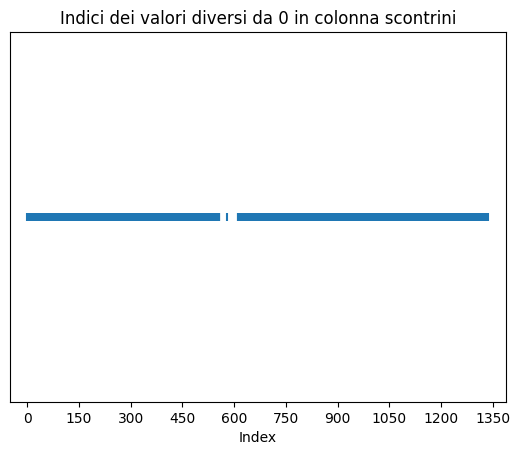

In [43]:
nonzero_indices = rist6[rist6['Scontrini'] != 0].index

# Create the scatter plot
pl.xlim(-50,1388)
pl.xticks(np.arange(0, 1500, 150))
pl.scatter(nonzero_indices, [1] * len(nonzero_indices), marker='|')
pl.xlabel('Index')
pl.yticks([])
pl.title('Indici dei valori diversi da 0 in colonna scontrini')
pl.show()

In [239]:
zero_indices = rist6[rist6['Scontrini'] == 0].index
rist6.loc[zero_indices]

Codice Location Provincia    Regione        Data  Scontrini  \
558    R005  Voghera     Pavia  Lombardia  2020-03-12          0   
559    R005  Voghera     Pavia  Lombardia  2020-03-13          0   
560    R005  Voghera     Pavia  Lombardia  2020-03-14          0   
561    R005  Voghera     Pavia  Lombardia  2020-03-15          0   
562    R005  Voghera     Pavia  Lombardia  2020-03-16          0   
563    R005  Voghera     Pavia  Lombardia  2020-03-17          0   
564    R005  Voghera     Pavia  Lombardia  2020-03-18          0   
565    R005  Voghera     Pavia  Lombardia  2020-03-19          0   
566    R005  Voghera     Pavia  Lombardia  2020-03-20          0   
567    R005  Voghera     Pavia  Lombardia  2020-03-21          0   
568    R005  Voghera     Pavia  Lombardia  2020-03-22          0   
569    R005  Voghera     Pavia  Lombardia  2020-03-23          0   
570    R005  Voghera     Pavia  Lombardia  2020-03-24          0   
571    R005  Voghera     Pavia  Lombardia  2020-03-25          0   
572    R005  Voghera     Pavia  Lombardia  2020-03-26          0   
573    R005  Voghera     Pavia  Lombardia  2020-03-27          0   
574    R005  Voghera     Pavia  Lombardia  2020-03-28          0   
575    R005  Voghera     Pavia  Lombardia  2020-03-29          0   
576    R005  Voghera     Pavia  Lombardia  2020-03-30          0   
577    R005  Voghera     Pavia  Lombardia  2020-03-31          0   
579    R005  Voghera     Pavia  Lombardia  2020-04-02          0   
580    R005  Voghera     Pavia  Lombardia  2020-04-03          0   
581    R005  Voghera     Pavia  Lombardia  2020-04-04          0   
582    R005  Voghera     Pavia  Lombardia  2020-04-05          0   
583    R005  Voghera     Pavia  Lombardia  2020-04-06          0   
584    R005  Voghera     Pavia  Lombardia  2020-04-07          0   
585    R005  Voghera     Pavia  Lombardia  2020-04-08          0   
586    R005  Voghera     Pavia  Lombardia  2020-04-09          0   
587    R005  Voghera     Pavia  Lombardia  2020-04-10          0   
588    R005  Voghera     Pavia  Lombardia  2020-04-11          0   
589    R005  Voghera     Pavia  Lombardia  2020-04-12          0   
590    R005  Voghera     Pavia  Lombardia  2020-04-13          0   
591    R005  Voghera     Pavia  Lombardia  2020-04-14          0   
592    R005  Voghera     Pavia  Lombardia  2020-04-15          0   
593    R005  Voghera     Pavia  Lombardia  2020-04-16          0   
594    R005  Voghera     Pavia  Lombardia  2020-04-17          0   
595    R005  Voghera     Pavia  Lombardia  2020-04-18          0   
596    R005  Voghera     Pavia  Lombardia  2020-04-19          0   
597    R005  Voghera     Pavia  Lombardia  2020-04-20          0   
598    R005  Voghera     Pavia  Lombardia  2020-04-21          0   
599    R005  Voghera     Pavia  Lombardia  2020-04-22          0   
600    R005  Voghera     Pavia  Lombardia  2020-04-23          0   
601    R005  Voghera     Pavia  Lombardia  2020-04-24          0   
602    R005  Voghera     Pavia  Lombardia  2020-04-25          0   
603    R005  Voghera     Pavia  Lombardia  2020-04-26          0   
604    R005  Voghera     Pavia  Lombardia  2020-04-27          0   
605    R005  Voghera     Pavia  Lombardia  2020-04-28          0   
606    R005  Voghera     Pavia  Lombardia  2020-04-29          0   
607    R005  Voghera     Pavia  Lombardia  2020-04-30          0   
608    R005  Voghera     Pavia  Lombardia  2020-05-01          0   
609    R005  Voghera     Pavia  Lombardia  2020-05-02          0   
610    R005  Voghera     Pavia  Lombardia  2020-05-03          0   
846    R005  Voghera     Pavia  Lombardia  2020-12-25          0   
946    R005  Voghera     Pavia  Lombardia  2021-04-04          0   
1336   R005  Voghera     Pavia  Lombardia  2022-04-29          0   
1337   R005  Voghera     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale     Giorno      Mese  Anno  ... Inflazione_combustibili  \
558            0.0   Thursday     March  2020  ...

Abbiamo una situazione simile a quanto già visto in precedenza: gran parte delle giornate con 0 scontrini fan parte del periodo del primo lockdown della primavera 2020. Gli unici casi differenti riguardano, come nel caso del ristorante 5, Natale 2020, Pasqua 2021 e due giorni di chiusura (anche se in zona bianca) il 29 e 30 Aprile 2022.

In [240]:
rist6.loc[zero_indices][rist6['Colore'] == 'bianco']

C:\Users\andre\AppData\Local\Temp\ipykernel_93080\2732025624.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rist6.loc[zero_indices][rist6['Colore'] == 'bianco']


Codice Location Provincia    Regione        Data  Scontrini  \
1336   R005  Voghera     Pavia  Lombardia  2022-04-29          0   
1337   R005  Voghera     Pavia  Lombardia  2022-04-30          0   

      Lordo_totale    Giorno   Mese  Anno  ... Inflazione_combustibili Maschi  \
1336           0.0    Friday  April  2022  ...                    60.5   3825   
1337           0.0  Saturday  April  2022  ...                    60.5   3903   

     Femmine Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
1336    4642        142          226                   81          2711   
1337    4633        172          371                  162          3138   

      Seconda_dose_Booster  Totale_casi  Scontrino_medio  
1336                  5307       145811              0.0  
1337                  4693       146203              0.0  

[2 rows x 27 columns]

Per comodità, e per non condizionare troppo i grafici creati, creiamo anche un dataframe escludendo tutti i giorni con 0 scontrini. 

In [241]:
rist6_no0 = rist6[rist6['Scontrini'] > 0]
rist6_no0 = rist6_no0.reset_index(drop=True)
rist6_no0

Codice Location Provincia    Regione        Data  Scontrini  \
0      R005  Voghera     Pavia  Lombardia  2018-09-01        774   
1      R005  Voghera     Pavia  Lombardia  2018-09-02        664   
2      R005  Voghera     Pavia  Lombardia  2018-09-03        706   
3      R005  Voghera     Pavia  Lombardia  2018-09-04        644   
4      R005  Voghera     Pavia  Lombardia  2018-09-05        691   
...     ...      ...       ...        ...         ...        ...   
1277   R005  Voghera     Pavia  Lombardia  2022-04-24        801   
1278   R005  Voghera     Pavia  Lombardia  2022-04-25        736   
1279   R005  Voghera     Pavia  Lombardia  2022-04-26        711   
1280   R005  Voghera     Pavia  Lombardia  2022-04-27        674   
1281   R005  Voghera     Pavia  Lombardia  2022-04-28        717   

      Lordo_totale     Giorno       Mese  Anno  ... Inflazione_combustibili  \
0         17927.97   Saturday  September  2018  ...                     5.4   
1         15023.69     Sunday  September  2018  ...                     5.4   
2         15546.82     Monday  September  2018  ...                     5.4   
3         13088.60    Tuesday  September  2018  ...                     5.4   
4         14520.95  Wednesday  September  2018  ...                     5.4   
...            ...        ...        ...   ...  ...                     ...   
1277      25380.16     Sunday      April  2022  ...                    60.5   
1278      24637.10     Monday      April  2022  ...                    60.5   
1279      18389.56    Tuesday      April  2022  ...                    60.5   
1280      19796.05  Wednesday      April  2022  ...                    60.5   
1281      19711.62   Thursday      April  2022  ...                    60.5   

     Maschi Femmine Prima_dose Seconda_dose  Contagio_precedente  \
0         0       0          0            0                    0   
1         0       0          0            0                    0   
2         0       0          0            0                    0   
3         0       0          0            0                    0   
4         0       0          0            0                    0   
...     ...     ...        ...          ...                  ...   
1277    636     684         42          151                   51   
1278    436     419         13           43                   14   
1279   3832    4045        136          345                   56   
1280   4184    4488        124          235                   63   
1281   3616    4328        101          222                   36   

      Dose_Booster  Seconda_dose_Booster  Totale_casi  Scontrino_medio  
0                0                     0            0            23.16  
1                0                     0            0            22.63  
2                0                     0            0            22.02  
3                0                     0            0            20.32  
4                0                     0            0            21.01  
...            ...                   ...          ...              ...  
1277           620                   456       143747            31.69  
1278           429                   356       143897            33.47  
1279          3008                  4332       144121            25.86  
1280          2854                  5396       144837            29.37  
1281          2483                  5102       145343            27.49  

[1282 rows x 27 columns]

In [348]:
# csv dataset completo
rist6_def.to_csv('dati/rist6_def.csv', index=False)
rist6_no0.to_csv('dati/rist6_no0.csv', index=False)

## Grafici

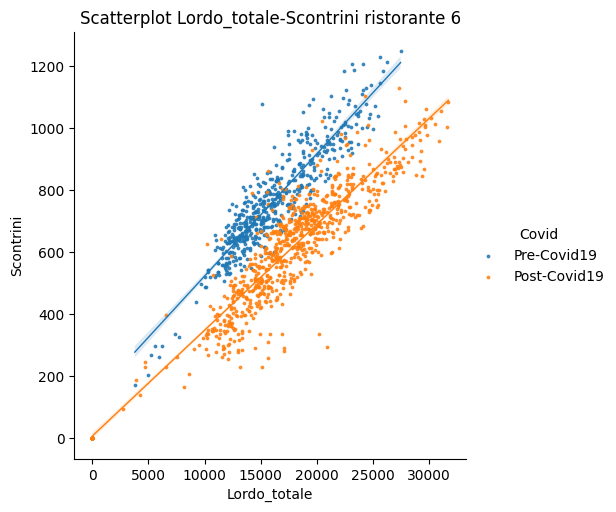

In [299]:
sns.lmplot(x="Lordo_totale", y="Scontrini", data=rist6, fit_reg=True, hue='Covid', legend=True, ci = 95, scatter_kws= {'s':3}, line_kws={'lw':1})
pl.title('Scatterplot Lordo_totale-Scontrini ristorante 6')
pl.show()

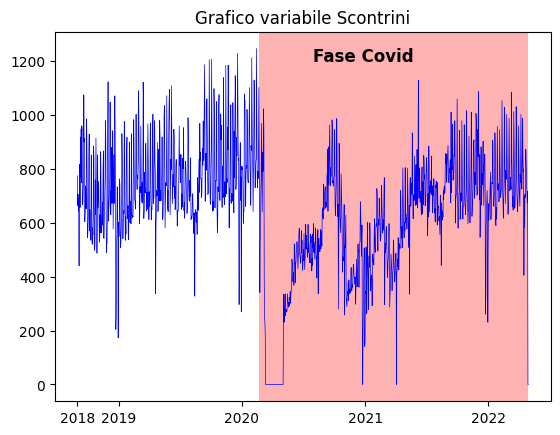

In [300]:
fig, ax = pl.subplots()
ax.plot('Data', 'Scontrini', data=rist6, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 1200, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Scontrini')
pl.show()

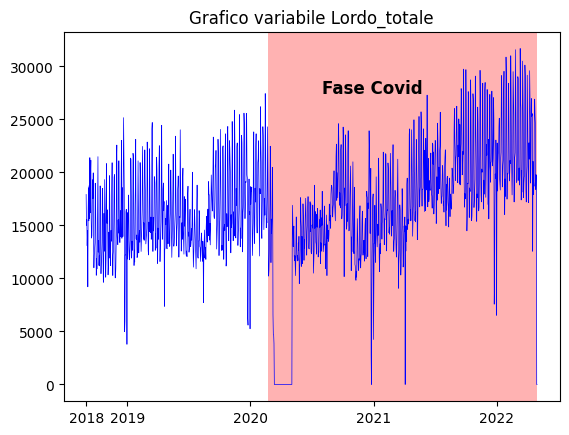

In [302]:
fig, ax = pl.subplots()
ax.plot('Data', 'Lordo_totale', data=rist6, color='blue', label="R000", linewidth=0.5)
pl.xticks(([0,122,487,853,1218]), ['2018','2019','2020','2021','2022'])
ax.text(700, 27500, 'Fase Covid', weight = 'bold', fontdict={'size': 12})
ax.axvspan(539, 1337,facecolor='red', alpha=0.3)
ax.set_title('Grafico variabile Lordo_totale')
pl.show()

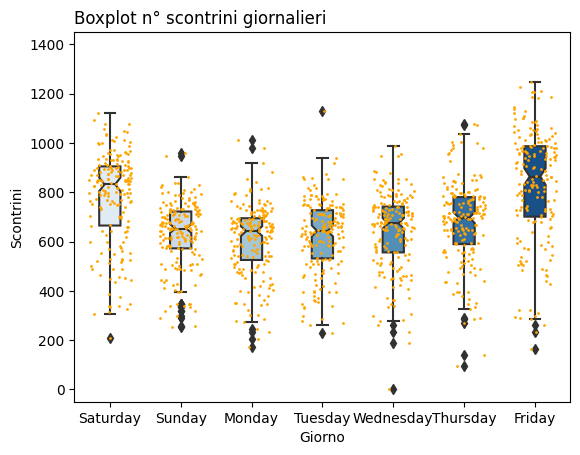

In [52]:
sns.boxplot(x='Giorno', y='Scontrini', data=rist6_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
sns.stripplot(x='Giorno', y='Scontrini', data=rist6_no0, color="orange",  jitter=0.3, size=2)
pl.ylim(-50,1450)
pl.yticks(np.arange(0, 1600, 200))
pl.title("Boxplot n° scontrini giornalieri", loc="left")
pl.show()

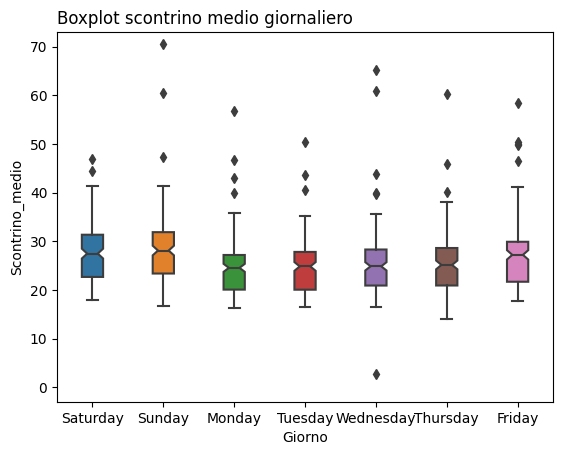

In [57]:
sns.boxplot(x='Giorno', y='Scontrino_medio', data=rist6_no0, linewidth=1.5, notch=True, width=0.3)
pl.ylim(-3,73)
pl.yticks(np.arange(0, 80, 10))
pl.title("Boxplot scontrino medio giornaliero", loc="left")
pl.show()

Osserviamo che tutti i valori sono solitamente compresi tra 15 e 40 euro circa di media per lo scontrino medio, tranne alcuni outliers: un valore di meno di 5€ un mercoledì (notiamo che si tratta della stessa giornata del ristorante 5), e alcuni outliers oltre i 40€, fino ad arrivare ad un massimo di 70€ una domenica. 

Come numero di scontrini, invece, abbiamo valori più bassi rispetto al ristorante di Stradella, con mediane più vicine ai 600 scontrini giornalieri rispetto agli 800 del ristorante n° 5. 

In [59]:
rist6_no0[rist6_no0['Scontrino_medio'] < 5]

Codice Location Provincia    Regione        Data  Scontrini  Lordo_totale  \
558   R005  Voghera     Pavia  Lombardia  2020-04-01          1           2.7   

        Giorno   Mese  Anno  ... Inflazione_combustibili Maschi Femmine  \
558  Wednesday  April  2020  ...                   -10.4      0       0   

    Prima_dose Seconda_dose  Contagio_precedente  Dose_Booster  \
558          0            0                    0             0   

     Seconda_dose_Booster  Totale_casi  Scontrino_medio  
558                     0         2180              2.7  

[1 rows x 27 columns]

Osserviamo ora la situazione prima e dopo l'inizio della pandemia da Covid19:

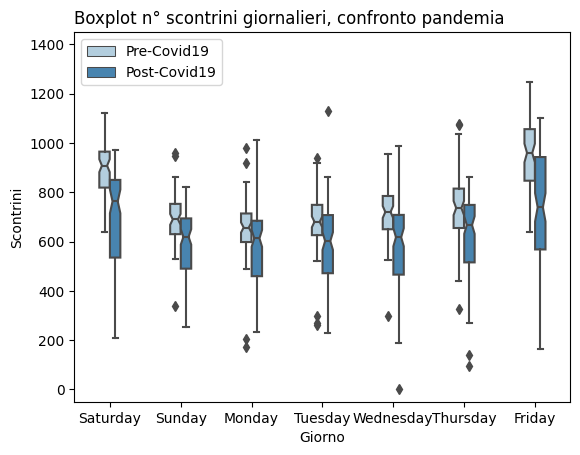

In [62]:
sns.boxplot(x='Giorno', y='Scontrini', hue = 'Covid', data=rist6_no0, linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(-50,1450)
pl.yticks(np.arange(0, 1600, 200))
pl.legend(loc='upper left')
pl.title("Boxplot n° scontrini giornalieri, confronto pandemia", loc="left")
pl.show()

Generalmente il numero di scontrini è calato, ma in maniera meno consistente rispetto a quanto si è visto con gli altri ristoranti: inoltre, solitamente si osservava una gran differenza il weekend e meno differenza per i giorni feriali, in questo caso la differenza è simile.

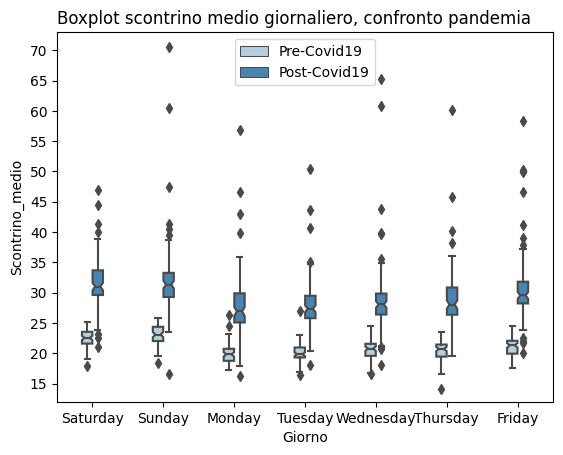

In [70]:
sns.boxplot(x='Giorno', y='Scontrino_medio', hue = 'Covid', data=rist6_no0[rist6_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(12,73)
pl.yticks(np.arange(15, 75, 5))
pl.legend(loc='upper center')
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

Lo scontrino medio è comunque aumentato in maniera significativa pre e post Covid, come previsto dati gli aumenti dei valori di inflazione presentati nella sezione generale di data exploration. 

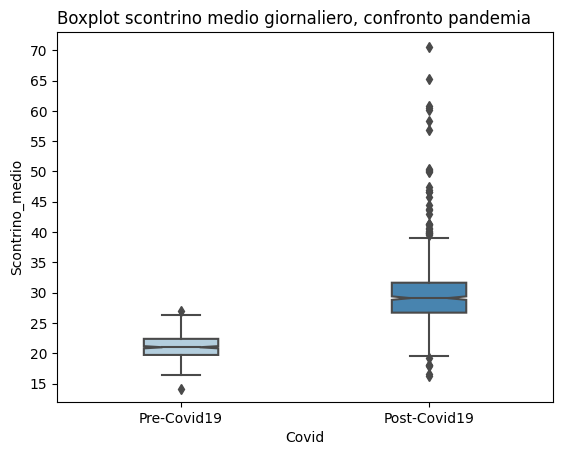

In [71]:
sns.boxplot(x='Covid', y='Scontrino_medio', data=rist6_no0[rist6_no0['Scontrino_medio'] > 5], linewidth=1.5, notch=True, width=0.3, palette="Blues")
pl.ylim(12,73)
pl.yticks(np.arange(15, 75, 5))
pl.title("Boxplot scontrino medio giornaliero, confronto pandemia", loc="left")
pl.show()

In [303]:
rist6_scontrini_anno = rist6.groupby(['Anno'])['Scontrini'].describe()
rist6_scontrini_anno = round(rist6_scontrini_anno, 2) # per arrotondare a 3 cifre decimali
rist6_scontrini_anno

count    mean     std    min     25%    50%     75%     max
Anno                                                             
2018  122.0  703.25  170.62  173.0  577.75  678.0  837.25  1123.0
2019  365.0  770.45  156.40  270.0  663.00  739.0  854.00  1229.0
2020  366.0  493.48  285.09    0.0  336.25  503.0  687.00  1247.0
2021  365.0  655.64  163.16    0.0  569.00  666.0  758.00  1129.0
2022  120.0  745.32  152.27    0.0  680.25  728.5  806.75  1085.0

In [304]:
rist6_Scontrino_medio_anno = rist6.groupby(['Anno'])['Scontrino_medio'].describe()
rist6_Scontrino_medio_anno = round(rist6_Scontrino_medio_anno, 2) # per arrotondare a 3 cifre decimali
rist6_Scontrino_medio_anno

count   mean    std    min    25%    50%    75%    max
Anno                                                        
2018  122.0  21.36   1.80  16.48  20.15  21.28  22.69  25.83
2019  365.0  20.92   1.92  16.55  19.53  20.87  22.22  26.93
2020  366.0  24.58  12.29   0.00  21.00  26.66  31.00  65.31
2021  365.0  29.22   4.89   0.00  26.59  28.45  30.99  70.51
2022  120.0  29.23   4.48   0.00  27.86  29.44  31.62  34.70

In [305]:
rist6_scontrini_Giorno = rist6.groupby(['Giorno','Covid'])['Scontrini'].describe()
rist6_scontrini_Giorno = round(rist6_scontrini_Giorno, 2) # per arrotondare a 3 cifre decimali
rist6_scontrini_Giorno

count    mean     std    min    25%    50%      75%  \
Giorno    Covid                                                               
Friday    Post-Covid19  115.0  667.30  304.24    0.0  505.5  727.0   928.00   
          Pre-Covid19    76.0  958.64  146.25  637.0  847.0  959.5  1056.25   
Monday    Post-Covid19  114.0  539.24  205.75    0.0  420.5  592.5   681.00   
          Pre-Covid19    77.0  650.88  119.25  173.0  598.0  657.0   714.00   
Saturday  Post-Covid19  115.0  638.25  259.88    0.0  507.0  705.0   846.50   
          Pre-Covid19    77.0  899.08  105.68  637.0  819.0  908.0   965.00   
Sunday    Post-Covid19  114.0  540.72  209.49    0.0  442.0  609.5   680.00   
          Pre-Covid19    77.0  690.25   97.39  337.0  630.0  690.0   753.00   
Thursday  Post-Covid19  114.0  578.32  224.32    0.0  479.5  644.0   739.00   
          Pre-Covid19    77.0  753.61  146.78  328.0  655.0  736.0   815.00   
Tuesday   Post-Covid19  114.0  553.71  207.58    0.0  447.0  589.0   701.75   
          Pre-Covid19    77.0  675.44  120.88  261.0  626.0  680.0   749.00   
Wednesday Post-Covid19  114.0  559.06  211.98    0.0  453.5  610.5   706.00   
          Pre-Covid19    77.0  713.56  108.59  297.0  650.0  720.0   785.00   

                           max  
Giorno    Covid                 
Friday    Post-Covid19  1102.0  
          Pre-Covid19   1247.0  
Monday    Post-Covid19  1011.0  
          Pre-Covid19    978.0  
Saturday  Post-Covid19   971.0  
          Pre-Covid19   1123.0  
Sunday    Post-Covid19   820.0  
          Pre-Covid19    960.0  
Thursday  Post-Covid19   863.0  
          Pre-Covid19   1078.0  
Tuesday   Post-Covid19  1129.0  
          Pre-Covid19    940.0  
Wednesday Post-Covid19   988.0  
          Pre-Covid19    955.0

In [306]:
rist6_Scontrino_medio_Giorno = rist6.groupby(['Giorno','Covid'])['Scontrino_medio'].describe()
rist6_Scontrino_medio_Giorno = round(rist6_Scontrino_medio_Giorno, 2) # per arrotondare a 3 cifre decimali
rist6_Scontrino_medio_Giorno

count   mean    std    min    25%    50%    75%    max
Giorno    Covid                                                               
Friday    Post-Covid19  115.0  28.10  10.30   0.00  27.68  29.39  31.14  58.40
          Pre-Covid19    76.0  21.10   1.46  17.62  19.93  21.30  22.06  24.45
Monday    Post-Covid19  114.0  26.01   8.33   0.00  24.93  26.48  29.55  56.87
          Pre-Covid19    77.0  19.91   1.60  17.23  18.75  19.81  20.74  26.24
Saturday  Post-Covid19  115.0  29.05   9.35   0.00  28.90  30.76  33.03  46.90
          Pre-Covid19    77.0  22.48   1.44  17.96  21.59  22.53  23.54  25.19
Sunday    Post-Covid19  114.0  29.47  10.45   0.00  28.49  31.04  32.90  70.51
          Pre-Covid19    77.0  23.03   1.67  18.43  22.01  23.07  24.37  25.83
Thursday  Post-Covid19  114.0  26.91   8.83   0.00  25.94  27.78  30.33  60.22
          Pre-Covid19    77.0  20.40   1.68  14.06  19.44  20.71  21.44  23.54
Tuesday   Post-Covid19  114.0  26.35   7.95   0.00  25.48  27.08  29.28  50.47
          Pre-Covid19    77.0  20.06   1.58  16.48  19.30  19.84  20.95  26.93
Wednesday Post-Covid19  114.0  27.23   9.09   0.00  25.80  27.72  29.59  65.31
          Pre-Covid19    77.0  20.57   1.62  16.55  19.57  20.76  21.56  24.46